In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sys import stdout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal,ogr,osr
from scipy.signal import savgol_filter
from scipy.stats import pearsonr
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import pandas as pd
from osgeo import gdal,ogr,osr
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd

C:\Users\laral\AppData\Roaming\Python\Python39\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
d13c_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\updated_std_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_ymax

array([[0.7180981659735273, 'd13c_site1b_100_047_clipped.tif'],
       [0.8428803382100787, 'd13c_site1b_100_048_clipped.tif'],
       [0.6972944179995748, 'd13c_site1b_017_022_clipped.tif'],
       ...,
       [2.2087865317436455, 'd13c_site006_009_54_clipped.tif'],
       [4.156649816368072, 'd13c_site006_009_55_clipped.tif'],
       [1.706787178809612, 'd13c_site006_009_57_clipped.tif']],
      dtype=object)

In [5]:
d13c_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\updated_std_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_ymax
site_name = []


# Loop through all files in the folder
for filename in d13c_trait_pdf_ymax[:,1]:
#     print(filename)
    site = filename.split('d13c_')[1]
    site_name.append(site)

tiff_dir = r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\AVIRIS_NG_Spectra'


band_data_list = []

for f_name in site_name:
    print(f_name)
#     band_data_dict = {"filename": f_name}

#     dataset = gdal.Open(os.path.join(tiff_dir, f_name))
#     num_bands = dataset.RasterCount
#     for band in range(1, num_bands + 1):
#         # Get the band object
#         band_obj = dataset.GetRasterBand(band)

#         # Get band name, you might need to adjust this part to get the actual band name
#         band_name = f"band_{band}"

#         # Read band data as an array
#         band_values = band_obj.ReadAsArray()

#         # Filter out the -9999.0 values and get the valid values
#         valid_values = [val for val in band_values.flatten() if val != -9999.0]

#         # Store the valid values with the band name
#         band_data_dict[band_name] = valid_values

#     band_data_list.append(band_data_dict)

# # Convert list of dictionaries to DataFrame
# df = pd.DataFrame(band_data_list)
# for column in df.columns:
#     # Check if the first row of this column is a list (assuming rest will be similar)
#     if isinstance(df[column].iloc[0], list):
#         # Remove the list and get the single value
#         df[column] = df[column].apply(lambda x: x[0] if len(x) == 1 else x)

site1b_100_047_clipped.tif
site1b_100_048_clipped.tif
site1b_017_022_clipped.tif
site1b_017_032_clipped.tif
site1b_018_016_clipped.tif
site1b_018_023_clipped.tif
site1b_018_024_clipped.tif
site1b_018_027_clipped.tif
site1b_019_016_clipped.tif
site1b_019_024_clipped.tif
site1b_020_016_clipped.tif
site1b_020_017_clipped.tif
site1b_020_025_clipped.tif
site1b_021_017_clipped.tif
site1b_021_025_clipped.tif
site1b_021_026_clipped.tif
site1b_022_025_clipped.tif
site1b_023_018_clipped.tif
site1b_023_025_clipped.tif
site1b_023_038_clipped.tif
site1b_023_039_clipped.tif
site1b_023_040_clipped.tif
site1b_023_041_clipped.tif
site1b_023_042_clipped.tif
site1b_024_022_clipped.tif
site1b_024_039_clipped.tif
site1b_024_042_clipped.tif
site1b_025_032_clipped.tif
site1b_026_027_clipped.tif
site1b_026_028_clipped.tif
site1b_027_012_clipped.tif
site1b_027_019_clipped.tif
site1b_027_020_clipped.tif
site1b_027_028_clipped.tif
site1b_027_029_clipped.tif
site1b_028_012_clipped.tif
site1b_028_016_clipped.tif
s

In [4]:
df

,filename,band_1,band_2,band_3,band_4,band_5,band_6,band_7,band_8,band_9,...,band_416,band_417,band_418,band_419,band_420,band_421,band_422,band_423,band_424,band_425
0,site1b_100_47_clipped.tif,0.050688,0.045849,0.045513,0.044077,0.041722,0.038772,0.035920,0.037270,0.035106,...,0.048714,0.043774,0.027493,0.048511,0.040477,0.114189,0.055154,0.075598,0.087312,-0.010000
1,site1b_100_48_clipped.tif,0.047271,0.044763,0.043037,0.041903,0.040618,0.036185,0.034885,0.035327,0.031973,...,0.038448,0.027902,0.029933,0.065472,0.037405,0.053153,0.105891,0.061134,0.093419,-0.010000
2,site1b_17_22_clipped.tif,0.049375,0.050173,0.045578,0.045401,0.044691,0.039125,0.037675,0.037718,0.035133,...,0.030851,0.036884,0.031798,0.059168,0.038415,0.088542,0.072362,0.083783,0.094768,-0.010000
3,site1b_17_32_clipped.tif,0.051125,0.047470,0.046410,0.044764,0.042676,0.038911,0.036929,0.038198,0.035298,...,0.063608,0.055989,0.070498,0.094127,0.067855,0.137180,0.103334,0.102173,0.106008,-0.010000
4,site1b_18_16_clipped.tif,0.046005,0.042460,0.041439,0.043321,0.042860,0.039142,0.037813,0.037744,0.035913,...,0.042568,0.044989,0.042543,0.040034,0.076296,0.052429,0.090476,0.081439,0.101174,-0.010000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,site6_8_55_clipped.tif,0.010572,0.005842,0.013543,0.016962,0.023919,0.020798,0.022951,0.024937,0.029667,...,0.053582,0.046796,0.051111,0.056912,0.052585,0.088182,0.353363,0.686889,0.282128,0.163278
744,site6_8_56_clipped.tif,0.002703,0.009259,0.019291,0.010904,0.014336,0.019487,0.022562,0.025988,0.027574,...,0.060768,0.059372,0.051104,0.059420,0.055796,0.073048,0.330263,0.880745,0.181656,0.153814
745,site6_9_54_clipped.tif,0.002902,0.013940,0.010169,0.012141,0.014919,0.014275,0.021185,0.024608,0.025069,...,0.042984,0.041811,0.039464,0.052485,0.058236,0.092017,0.338197,0.863742,0.299518,0.143644
746,site6_9_55_clipped.tif,0.006810,0.009494,0.008697,0.015216,0.020741,0.017988,0.022035,0.023726,0.029139,...,0.050813,0.041145,0.044375,0.045220,0.050385,0.082719,0.218827,0.609983,0.195510,0.160367


In [5]:
band_name = []
for i in range(16, 186):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

for i in range(216, 286):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)
    
for i in range(326, 405):
    b_name = 'band_' + str(i) 
    band_name.append(b_name)

In [6]:
x_spectra = df[band_name]
x_spectra = x_spectra.to_numpy()

In [7]:
x_spectra.shape

(748, 319)

In [24]:
# # vertically stack two section of arrays to create a new array
# site1b_x = x_spectra[0:250, :]
# site2a_x = x_spectra[250:375, :]
# site2c_x = x_spectra[375:500,:]
# site6_x1 = x_spectra[500:800,:]

# x = np.vstack((site1b_x, site2a_x,site2c_x,site6_x1))
# # site2c_x = x[]
# x.shape

In [25]:
x = x_spectra

In [8]:
d13c_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\ymax_d13c.npy',  allow_pickle=True)
y1 = np.array(d13c_trait_pdf_ymax)

In [9]:
y1

array([[-27.25283426130404, 'site1b_100_47_clipped.tif'],
       [-28.154512902473876, 'site1b_100_48_clipped.tif'],
       [-28.052013684779293, 'site1b_17_22_clipped.tif'],
       ...,
       [-29.553105153464724, 'site6_9_54_clipped.tif'],
       [-29.351123161914074, 'site6_9_55_clipped.tif'],
       [-29.046760580515425, 'site6_9_57_clipped.tif']], dtype=object)

In [10]:
df_filenames = df['filename']  # From DataFrame
y1_filenames = y1[:, 1]

In [11]:
# Create a mapping from y1 filenames to trait values
trait_mapping = {filename: value for value, filename in y1}

# Align rows in the DataFrame to match `y1` order
aligned_df = df[df_filenames.isin(y1_filenames)].copy()
aligned_df = aligned_df.set_index('filename').loc[y1_filenames].reset_index()

# Check for any mismatches
missing_in_df = set(y1_filenames) - set(df_filenames)
if missing_in_df:
    print(f"Filenames in y1 but missing in DataFrame: {missing_in_df}")

# Convert aligned DataFrame and y1 to X and y for modeling
X = aligned_df.drop(columns=['filename']).values  # Spectra data
y = y1[:, 0].astype(np.float64)   

In [13]:
X

array([[ 0.05068815,  0.04584903,  0.04551332, ...,  0.07559811,
         0.08731188, -0.01      ],
       [ 0.04727067,  0.04476286,  0.04303659, ...,  0.06113448,
         0.09341926, -0.01      ],
       [ 0.04937542,  0.05017255,  0.04557827, ...,  0.08378312,
         0.09476827, -0.01      ],
       ...,
       [ 0.00290208,  0.0139404 ,  0.01016913, ...,  0.8637419 ,
         0.29951787,  0.14364439],
       [ 0.00681042,  0.00949445,  0.00869748, ...,  0.6099826 ,
         0.19551022,  0.1603668 ],
       [ 0.01386477,  0.00846981,  0.01454022, ...,  0.85909975,
         0.26067013,  0.15747494]], dtype=float32)

In [14]:
y

array([-27.25283426, -28.1545129 , -28.05201368, -28.05763648,
       -28.52850817, -28.40873685, -28.66047859, -28.73228949,
       -28.27416708, -28.38367759, -28.38362924, -28.95915401,
       -29.13822422, -28.63069521, -28.75948598, -28.61028946,
       -28.30968045, -28.71381147, -28.03484032, -28.59850666,
       -28.40564799, -28.60165038, -28.25743453, -28.33941642,
       -28.56907143, -28.94858425, -28.31561345, -27.98312548,
       -28.23843919, -28.59208005, -29.10638405, -28.4838459 ,
       -28.34370591, -28.04417403, -28.40164105, -28.49998318,
       -28.11601503, -28.49936035, -28.71976929, -27.85714626,
       -28.55965746, -28.26419725, -28.58924823, -28.79071875,
       -28.19626109, -28.5702509 , -28.14355206, -28.38028922,
       -29.55067136, -28.20533724, -28.66747599, -27.41780519,
       -28.26762978, -28.44788586, -27.97316858, -28.32082277,
       -28.27641201, -28.54839091, -28.80109982, -28.63347867,
       -28.32345204, -28.40288361, -28.89865542, -28.28

In [15]:
def pls_variable_selection(X, y, max_comp):
    
    # Define an MSE array to be populated
    mse = np.zeros((max_comp, X.shape[1] - max_comp +1 ))



    # Loop over the number of PLS components
    for i in range(max_comp):
        # print(i)
        
        # Regression with the specified number of components, using the full spectrum
        pls1 = PLSRegression(n_components=i + 1)
        pls1.fit(X, y)
        
        # Indices of sorted spectra according to ascending absolute value of PLS coefficients
        sorted_ind = np.argsort(np.abs(pls1.coef_.flatten()))
 
        # Sort spectra accordingly
        Xc = X[:, sorted_ind]
        
        max_j = min(Xc.shape[1] - (i + 1), mse.shape[1]) 
        # Discard one wavelength at a time from the sorted spectra,
        # regress, and calculate the MSE cross-validation
        for j in range(max_j): 
            pls2 = PLSRegression(n_components=i + 1)
            pls2.fit(Xc[:, j:], y)
            
            y_cv = cross_val_predict(pls2, Xc[:, j:], y.astype(np.float64), cv=5)
          

            mse[i, j] = np.sqrt(mean_squared_error(y, y_cv))        
            

      

    
    stdout.write("\n")
    
    # Find the indices of the minimum non-NaN MSE values
    mseminx,mseminy = np.where(mse==np.min(mse[np.nonzero(mse)]))

    
    print("Optimised number of PLS components: ", mseminx[0] + 1)
    print("Wavelengths to be kept ", (X.shape[1] - mseminy[0]))
    print('Optimised MSEP ', mse[mseminx, mseminy][0])
    stdout.write("\n")
 
    # Calculate PLS with optimal components and export values
    optimal_pls = PLSRegression(n_components=mseminx[0] + 1)
    optimal_pls.fit(X, y)
        
    sorted_ind = np.argsort(np.abs(optimal_pls.coef_.flatten()))
 
    Xc = X[:, sorted_ind]
 
    return Xc[:, mseminy[0]:], mseminx[0] + 1, mseminy[0], sorted_ind

In [16]:
opt_Xc, ncomp, wav, sorted_ind = pls_variable_selection(X, y, 50)


Optimised number of PLS components:  27
Wavelengths to be kept  54
Optimised MSEP  0.5007527410788842



In [28]:
labels1 = [] 
for i in range(len(y1[:, 1])):
    substrings = y1[:, 1][i]
    site_name = substrings.split("_")[0]
    labels1.append(site_name)

In [29]:
labels1

['site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',
 'site1b',

In [30]:
labels1[374]

'site2a'

In [31]:
site1b_labels1 = labels1[0:250]
site2a_labels1 = labels1[250:375]
site2c_labels1 = labels1[375:500]
site6_labels1_1 = labels1[500:800]
# site6_labels1_2 = labels1[3394:3574]
labels = site1b_labels1 + site2a_labels1 + site2c_labels1 + site6_labels1_1
len(labels)

748

In [32]:
site6_labels1_1

['site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',
 'site6',


In [33]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_predict
import numpy as np
import matplotlib.pyplot as plt

def plot_mse_vs_components_and_select_bands(X, y, max_comp, threshold=0.01):
    """
    Determine the optimal number of PLS components and select significant bands.

    Parameters:
    X (numpy.ndarray): Predictor variables.
    y (numpy.ndarray): Response variable.
    max_comp (int): Maximum number of PLS components to test.
    threshold (float): Threshold for selecting significant bands.

    Returns:
    tuple: Filtered predictor variables, optimal number of components, wavelength index, and sorted indices.
    """
    y_numeric = y[:, 0].astype(np.float64)  # Use the numeric column of y

    # Step 1: Determine optimal number of components
    mse = []

    for i in range(1, max_comp + 1):
        pls = PLSRegression(n_components=i)
        y_cv = cross_val_predict(pls, X, y_numeric, cv=5)
        mse.append(mean_squared_error(y_numeric, y_cv))

    optimal_components = np.argmin(mse) + 1
    print(f"Optimal number of PLS components: {optimal_components}")

    # Plot MSE vs. number of components
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_comp + 1), mse, marker='o')
    plt.xlabel('Number of PLS Components')
    plt.ylabel('Cross-validated MSE')
    plt.title('Optimal PLS Components Selection')
    plt.grid(True)
    plt.show()

    # Step 2: Use optimal components to select significant bands
    pls = PLSRegression(n_components=optimal_components)
    pls.fit(X, y_numeric)

    # Identify significant bands
    abs_coefs = np.abs(pls.coef_[:, 0])
    significant_indices = np.where(abs_coefs >= threshold)[0]

    # Fallback: Retain top N bands if none meet threshold
    if len(significant_indices) == 0:
        top_n = min(10, len(abs_coefs))  # Retain at least some bands
        significant_indices = np.argsort(abs_coefs)[-top_n:]
        print(f"No bands met threshold {threshold}. Retaining top {top_n} bands.")

    X_filtered = X[:, significant_indices]
    print(f"Filtered X shape: {X_filtered.shape} (bands remaining: {len(significant_indices)})")

    return X_filtered, optimal_components, significant_indices


In [34]:

def simple_pls_cv_label_category(X,x1,x2,x3,x4, y,y1,y2,y3,y4, n_comp,labels, filename):

    # Run PLS with suggested number of components
    pls = PLSRegression(n_components=n_comp)
    pls.fit(X, y[:, 0].astype(np.float64))
    y_c = pls.predict(X)
    
    y_c_site1b = pls.predict(x1)
    y_c_site2a = pls.predict(x2)
    y_c_site2c = pls.predict(x3)
    y_c_site6 = pls.predict(x4)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y[:, 0].astype(np.float64), cv=10)
    
    y_cv_site1b = cross_val_predict(pls, x1, y1[:, 0].astype(np.float64), cv=10)
    y_cv_site2a = cross_val_predict(pls, x2, y2[:, 0].astype(np.float64), cv=10)
    y_cv_site2c = cross_val_predict(pls, x3, y3[:, 0].astype(np.float64), cv=10)
    y_cv_site6 = cross_val_predict(pls, x4, y4[:, 0].astype(np.float64), cv=10)

    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y[:, 0].astype(np.float64), y_c)
    score_cv = r2_score(y[:, 0].astype(np.float64), y_cv)
    

    


    # Calculate mean square error for calibration and cross validation
    mse_c = mean_squared_error(y[:, 0].astype(np.float64), y_c)
    mse_cv = mean_squared_error(y[:, 0].astype(np.float64), y_cv)

    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)

    # Plot regression 
    z = np.polyfit(y[:, 0].astype(np.float64), y_cv, 1)

    print(print(z[1],z[0]))
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots(figsize=(9, 5))

        # Define a dictionary of labels and their corresponding markers and colors
        label_dict = {
            'site1b': {'marker': 'o', 'color': 'purple'},
            'site2a': {'marker': 's', 'color': 'blue'},
            'site2c': {'marker': 'p', 'color': 'yellow'},
            'site6': {'marker': '^', 'color': 'green'},
            'site6add': {'marker': '^', 'color': 'red'}

        }

        # Loop over data points to add labels and build a list of scatter plot objects
        scatter_objs = []
        with open(filename, 'w', newline='') as csvfile:
            csvwriter = csv.writer(csvfile)
            for i, label in enumerate(labels):
                print(i, label, y_cv[i], y[i])
                csvwriter.writerow([i, label, y_cv[i], y[i]])
                
        # enumerate() method adds a counter to an iterable and returns it in a form of enumerating object
        # marker style; color map and edge color
        for i, label in enumerate(labels):
            scatter_obj = ax.scatter(y_cv[i], y[i,0].astype(np.float64), marker=label_dict.get(label)['marker'],
                                     c=label_dict.get(label)['color'], edgecolors='k')
            scatter_objs.append(scatter_obj)

        # Create a legend using the dictionary of labels and their markers/colors
        legend_handles = []
        for label, props in label_dict.items():
            legend_handles.append(plt.Line2D([], [], marker=props['marker'], color=props['color'], linestyle='None', label=label))
        ax.legend(handles=legend_handles)


        ax.plot(z[1]+z[0]*y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), c='red', linewidth=1)

        ax.plot(y[:, 0].astype(np.float64), y[:, 0].astype(np.float64), color='black', linewidth=1)
        plt.title('$R^{2}$ (CV): '+str(score_cv))
        plt.xlabel('Predicted $^{\circ}$Brix')
        plt.ylabel('Measured $^{\circ}$Brix')
        plt.show()









#     trend_line = z[1]+z[0]*y[:, 0].astype(np.float64)
#     center_line = y[:, 0].astype(np.float64)
#     y = y[:, 0].astype(np.float64)
#     return (trend_line, center_line, y, score_cv)


# d13c

In [35]:
d13c_trait_pdf_ymax = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\ymax_d13c.npy',  allow_pickle=True)
d13c_trait_pdf_std = np.load(r'D:\wenqu\chapter1_2\updated_aviris\PLSR_training_samples\trait_numpy\std_d13c.npy',  allow_pickle=True)

In [36]:
y_d13c_max1 = np.array(d13c_trait_pdf_ymax)
y_d13c_std1 = np.array(d13c_trait_pdf_std)

In [37]:
y_d13c_max1.shape

(748, 2)

In [38]:
y_d13c_max1

array([[-27.25283426130404, 'site1b_100_47_clipped.tif'],
       [-28.154512902473876, 'site1b_100_48_clipped.tif'],
       [-28.052013684779293, 'site1b_17_22_clipped.tif'],
       ...,
       [-29.553105153464724, 'site6_9_54_clipped.tif'],
       [-29.351123161914074, 'site6_9_55_clipped.tif'],
       [-29.046760580515425, 'site6_9_57_clipped.tif']], dtype=object)

In [39]:
# site1b_x = x_spectra[0:250, :]
# site2a_x = x_spectra[250:375, :]
# site2c_x = x_spectra[375:500,:]
# site6_x1 = x_spectra[500:800,:]

In [40]:
# vertically stack two section of arrays to create a new array
site1b_y_d13c_max1 = y_d13c_max1[0:250, :]
site2a_y_d13c_max1 = y_d13c_max1[250:375, :]
site2c_y_d13c_max1 = y_d13c_max1[375:500,:]
site6_y_d13c_max1_1 = y_d13c_max1[500:800,:]

y_d13c_max = np.vstack((site1b_y_d13c_max1, site2a_y_d13c_max1,site2c_y_d13c_max1,site6_y_d13c_max1_1))
# site2c_x = x[]
y_d13c_max.shape

(748, 2)

In [41]:
y_d13c_max

array([[-27.25283426130404, 'site1b_100_47_clipped.tif'],
       [-28.154512902473876, 'site1b_100_48_clipped.tif'],
       [-28.052013684779293, 'site1b_17_22_clipped.tif'],
       ...,
       [-29.553105153464724, 'site6_9_54_clipped.tif'],
       [-29.351123161914074, 'site6_9_55_clipped.tif'],
       [-29.046760580515425, 'site6_9_57_clipped.tif']], dtype=object)

In [42]:
# vertically stack two section of arrays to create a new array
site1b_y_d13c_std1 = y_d13c_std1[0:250, :]
site2a_y_d13c_std1 = y_d13c_std1[250:375, :]
site2c_y_d13c_std1 = y_d13c_std1[375:500,:]
site6_y_d13c_std1_1 = y_d13c_std1[500:800,:]

y_d13c_std = np.vstack((site1b_y_d13c_std1, site2a_y_d13c_std1,site2c_y_d13c_std1,site6_y_d13c_std1_1))
# site2c_x = x[]
y_d13c_std.shape

(748, 2)

Optimal number of PLS components: 5


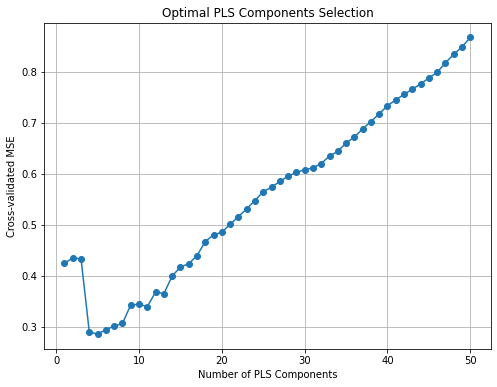

Filtered X shape: (748, 1) (bands remaining: 1)


In [45]:
opt_Xc_d13c_std, ncomp_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components_and_select_bands(
    x, y_d13c_max1, 50, threshold=0.001
)


Optimal number of PLS components: 5


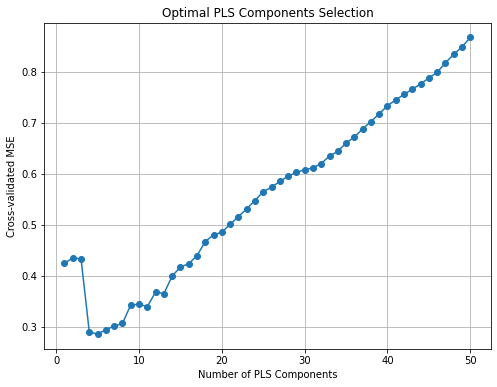

Filtered X shape: (748, 1) (bands remaining: 1)


ValueError: not enough values to unpack (expected 4, got 3)

In [44]:
opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components_and_select_bands(
    x, y_d13c_max1, 50, threshold=0.001
)


In [33]:
opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components(x, y_d13c_max1, 50, threshold=0.01)

Processing component 1/50...


ValueError: No significant bands found for component 1 with threshold 0.01.

In [32]:
print(f"Optimized X shape: {opt_Xc.shape}")
print(f"Optimal number of components: {ncomp_opt}")
print(f"Optimal wavelength index to discard: {wav_opt}")


NameError: name 'opt_Xc' is not defined

In [29]:
y_d13c_max.shape

(748, 2)

In [30]:
x_spectra.shape

(748, 319)

In [30]:
x.shape

(748, 319)

In [31]:
y_d13c_max.shape

(748, 2)

In [35]:
opt_Xc, ncomp_opt, wav_opt, sorted_indices = plot_mse_vs_components(x_spectra, y_numeric, 50)


Processing component 1/50...
Fallback: retaining all columns for component 1.
Sorted Xc shape: (748, 319)
mse[0, 0] = 0.424501
mse[0, 1] = 0.424150
mse[0, 2] = 0.423822
mse[0, 3] = 0.423568
mse[0, 4] = 0.423348
mse[0, 5] = 0.423127
mse[0, 6] = 0.422917
mse[0, 7] = 0.422720
mse[0, 8] = 0.422544
mse[0, 9] = 0.422396
mse[0, 10] = 0.422248
mse[0, 11] = 0.422051
mse[0, 12] = 0.421880
mse[0, 13] = 0.421718
mse[0, 14] = 0.421552
mse[0, 15] = 0.421452
mse[0, 16] = 0.421379
mse[0, 17] = 0.421349
mse[0, 18] = 0.421290
mse[0, 19] = 0.421221
mse[0, 20] = 0.421178
mse[0, 21] = 0.421159
mse[0, 22] = 0.421105
mse[0, 23] = 0.421026
mse[0, 24] = 0.420943
mse[0, 25] = 0.420817
mse[0, 26] = 0.420648
mse[0, 27] = 0.420479
mse[0, 28] = 0.420336
mse[0, 29] = 0.420168
mse[0, 30] = 0.420022
mse[0, 31] = 0.419866
mse[0, 32] = 0.419676
mse[0, 33] = 0.419483
mse[0, 34] = 0.419260
mse[0, 35] = 0.419046
mse[0, 36] = 0.418819
mse[0, 37] = 0.418582
mse[0, 38] = 0.418360
mse[0, 39] = 0.418146
mse[0, 40] = 0.417927
ms

mse[1, 39] = 0.426765
mse[1, 40] = 0.426362
mse[1, 41] = 0.425975
mse[1, 42] = 0.425595
mse[1, 43] = 0.425186
mse[1, 44] = 0.424782
mse[1, 45] = 0.424360
mse[1, 46] = 0.423965
mse[1, 47] = 0.423566
mse[1, 48] = 0.423123
mse[1, 49] = 0.422547
mse[1, 50] = 0.421688
mse[1, 51] = 0.420171
mse[1, 52] = 0.418209
mse[1, 53] = 0.417162
mse[1, 54] = 0.416939
mse[1, 55] = 0.418424
mse[1, 56] = 0.420233
mse[1, 57] = 0.421527
mse[1, 58] = 0.422286
mse[1, 59] = 0.422751
mse[1, 60] = 0.423069
mse[1, 61] = 0.423310
mse[1, 62] = 0.423515
mse[1, 63] = 0.423712
mse[1, 64] = 0.423917
mse[1, 65] = 0.424152
mse[1, 66] = 0.424439
mse[1, 67] = 0.424817
mse[1, 68] = 0.425337
mse[1, 69] = 0.426086
mse[1, 70] = 0.427176
mse[1, 71] = 0.428569
mse[1, 72] = 0.428050
mse[1, 73] = 0.418270
mse[1, 74] = 0.413141
mse[1, 75] = 0.414772
mse[1, 76] = 0.416375
mse[1, 77] = 0.417446
mse[1, 78] = 0.418189
mse[1, 79] = 0.418746
mse[1, 80] = 0.419210
mse[1, 81] = 0.419627
mse[1, 82] = 0.420028
mse[1, 83] = 0.420455
mse[1, 84]

mse[2, 86] = 0.406547
mse[2, 87] = 0.407186
mse[2, 88] = 0.408054
mse[2, 89] = 0.408143
mse[2, 90] = 0.409617
mse[2, 91] = 0.410145
mse[2, 92] = 0.410895
mse[2, 93] = 0.411799
mse[2, 94] = 0.412699
mse[2, 95] = 0.413371
mse[2, 96] = 0.413838
mse[2, 97] = 0.413160
mse[2, 98] = 0.413876
mse[2, 99] = 0.415421
mse[2, 100] = 0.416747
mse[2, 101] = 0.419019
mse[2, 102] = 0.420881
mse[2, 103] = 0.422610
mse[2, 104] = 0.424036
mse[2, 105] = 0.425728
mse[2, 106] = 0.427297
mse[2, 107] = 0.428488
mse[2, 108] = 0.429387
mse[2, 109] = 0.430433
mse[2, 110] = 0.431300
mse[2, 111] = 0.431990
mse[2, 112] = 0.432552
mse[2, 113] = 0.433677
mse[2, 114] = 0.434185
mse[2, 115] = 0.434792
mse[2, 116] = 0.435217
mse[2, 117] = 0.435653
mse[2, 118] = 0.435698
mse[2, 119] = 0.435505
mse[2, 120] = 0.435385
mse[2, 121] = 0.435255
mse[2, 122] = 0.435114
mse[2, 123] = 0.434912
mse[2, 124] = 0.434679
mse[2, 125] = 0.434474
mse[2, 126] = 0.434188
mse[2, 127] = 0.433826
mse[2, 128] = 0.433278
mse[2, 129] = 0.432576
ms

mse[3, 131] = 0.358737
mse[3, 132] = 0.357614
mse[3, 133] = 0.356320
mse[3, 134] = 0.352778
mse[3, 135] = 0.349317
mse[3, 136] = 0.348534
mse[3, 137] = 0.347437
mse[3, 138] = 0.346762
mse[3, 139] = 0.346995
mse[3, 140] = 0.346324
mse[3, 141] = 0.347893
mse[3, 142] = 0.348145
mse[3, 143] = 0.348242
mse[3, 144] = 0.347982
mse[3, 145] = 0.347379
mse[3, 146] = 0.346456
mse[3, 147] = 0.346043
mse[3, 148] = 0.345370
mse[3, 149] = 0.344715
mse[3, 150] = 0.344358
mse[3, 151] = 0.344547
mse[3, 152] = 0.344798
mse[3, 153] = 0.344858
mse[3, 154] = 0.345068
mse[3, 155] = 0.344955
mse[3, 156] = 0.344693
mse[3, 157] = 0.344392
mse[3, 158] = 0.343934
mse[3, 159] = 0.343399
mse[3, 160] = 0.342831
mse[3, 161] = 0.342353
mse[3, 162] = 0.342501
mse[3, 163] = 0.345194
mse[3, 164] = 0.349800
mse[3, 165] = 0.349989
mse[3, 166] = 0.346519
mse[3, 167] = 0.342761
mse[3, 168] = 0.340918
mse[3, 169] = 0.342724
mse[3, 170] = 0.357566
mse[3, 171] = 0.355892
mse[3, 172] = 0.354632
mse[3, 173] = 0.353025
mse[3, 174]

mse[4, 179] = 0.319363
mse[4, 180] = 0.317049
mse[4, 181] = 0.316790
mse[4, 182] = 0.315913
mse[4, 183] = 0.315369
mse[4, 184] = 0.313899
mse[4, 185] = 0.314867
mse[4, 186] = 0.314149
mse[4, 187] = 0.314490
mse[4, 188] = 0.314358
mse[4, 189] = 0.315489
mse[4, 190] = 0.315312
mse[4, 191] = 0.315019
mse[4, 192] = 0.315353
mse[4, 193] = 0.315189
mse[4, 194] = 0.315005
mse[4, 195] = 0.315274
mse[4, 196] = 0.315302
mse[4, 197] = 0.316192
mse[4, 198] = 0.316678
mse[4, 199] = 0.316609
mse[4, 200] = 0.316637
mse[4, 201] = 0.317182
mse[4, 202] = 0.317361
mse[4, 203] = 0.317437
mse[4, 204] = 0.317249
mse[4, 205] = 0.317021
mse[4, 206] = 0.316965
mse[4, 207] = 0.317551
mse[4, 208] = 0.317248
mse[4, 209] = 0.319103
mse[4, 210] = 0.320954
mse[4, 211] = 0.322843
mse[4, 212] = 0.326528
mse[4, 213] = 0.330254
mse[4, 214] = 0.332871
mse[4, 215] = 0.337947
mse[4, 216] = 0.347245
mse[4, 217] = 0.350934
mse[4, 218] = 0.354215
mse[4, 219] = 0.357336
mse[4, 220] = 0.359504
mse[4, 221] = 0.363323
mse[4, 222]

mse[5, 227] = 0.385248
mse[5, 228] = 0.388893
mse[5, 229] = 0.395462
mse[5, 230] = 0.400534
mse[5, 231] = 0.404905
mse[5, 232] = 0.407133
mse[5, 233] = 0.407622
mse[5, 234] = 0.405583
mse[5, 235] = 0.405557
mse[5, 236] = 0.404433
mse[5, 237] = 0.404774
mse[5, 238] = 0.409101
mse[5, 239] = 0.409899
mse[5, 240] = 0.407295
mse[5, 241] = 0.400733
mse[5, 242] = 0.400686
mse[5, 243] = 0.400885
mse[5, 244] = 0.394318
mse[5, 245] = 0.397104
mse[5, 246] = 0.398291
mse[5, 247] = 0.401881
mse[5, 248] = 0.400309
mse[5, 249] = 0.396847
mse[5, 250] = 0.398423
mse[5, 251] = 0.398100
mse[5, 252] = 0.399069
mse[5, 253] = 0.396684
mse[5, 254] = 0.397764
mse[5, 255] = 0.398865
mse[5, 256] = 0.403614
mse[5, 257] = 0.403005
mse[5, 258] = 0.403096
mse[5, 259] = 0.409170
mse[5, 260] = 0.405422
mse[5, 261] = 0.404810
mse[5, 262] = 0.406661
mse[5, 263] = 0.406853
mse[5, 264] = 0.407743
mse[5, 265] = 0.407200
mse[5, 266] = 0.403569
mse[5, 267] = 0.405678
mse[5, 268] = 0.407649
mse[5, 269] = 0.407441
mse[5, 270]

mse[6, 271] = 0.411126
mse[6, 272] = 0.412809
mse[6, 273] = 0.411519
mse[6, 274] = 0.409684
mse[6, 275] = 0.410102
mse[6, 276] = 0.408825
mse[6, 277] = 0.408215
mse[6, 278] = 0.409738
mse[6, 279] = 0.404911
mse[6, 280] = 0.403330
mse[6, 281] = 0.401615
mse[6, 282] = 0.400672
mse[6, 283] = 0.398353
mse[6, 284] = 0.396515
mse[6, 285] = 0.396566
mse[6, 286] = 0.390800
mse[6, 287] = 0.388979
mse[6, 288] = 0.385000
mse[6, 289] = 0.384693
mse[6, 290] = 0.380670
mse[6, 291] = 0.381922
mse[6, 292] = 0.382402
mse[6, 293] = 0.382048
mse[6, 294] = 0.381191
mse[6, 295] = 0.383571
mse[6, 296] = 0.384853
mse[6, 297] = 0.385111
mse[6, 298] = 0.384981
mse[6, 299] = 0.390452
mse[6, 300] = 0.390425
mse[6, 301] = 0.386627
mse[6, 302] = 0.394672
mse[6, 303] = 0.392102
mse[6, 304] = 0.389919
mse[6, 305] = 0.386065
mse[6, 306] = 0.385296
mse[6, 307] = 0.390390
mse[6, 308] = 0.394796
mse[6, 309] = 0.399508
mse[6, 310] = 0.408949
mse[6, 311] = 0.409581
Processing component 8/50...
Fallback: retaining all colu

mse[8, 0] = 0.343255
mse[8, 1] = 0.354437
mse[8, 2] = 0.355975
mse[8, 3] = 0.353135
mse[8, 4] = 0.336015
mse[8, 5] = 0.345615
mse[8, 6] = 0.353128
mse[8, 7] = 0.359485
mse[8, 8] = 0.355557
mse[8, 9] = 0.350467
mse[8, 10] = 0.347511
mse[8, 11] = 0.353456
mse[8, 12] = 0.347341
mse[8, 13] = 0.347287
mse[8, 14] = 0.346497
mse[8, 15] = 0.348684
mse[8, 16] = 0.349526
mse[8, 17] = 0.348299
mse[8, 18] = 0.349775
mse[8, 19] = 0.352445
mse[8, 20] = 0.351689
mse[8, 21] = 0.353923
mse[8, 22] = 0.355658
mse[8, 23] = 0.355417
mse[8, 24] = 0.355586
mse[8, 25] = 0.353558
mse[8, 26] = 0.352950
mse[8, 27] = 0.351205
mse[8, 28] = 0.349432
mse[8, 29] = 0.349085
mse[8, 30] = 0.346831
mse[8, 31] = 0.342419
mse[8, 32] = 0.341580
mse[8, 33] = 0.341850
mse[8, 34] = 0.340009
mse[8, 35] = 0.336751
mse[8, 36] = 0.336084
mse[8, 37] = 0.335043
mse[8, 38] = 0.332296
mse[8, 39] = 0.330280
mse[8, 40] = 0.326687
mse[8, 41] = 0.326633
mse[8, 42] = 0.326783
mse[8, 43] = 0.328391
mse[8, 44] = 0.329642
mse[8, 45] = 0.32871

mse[9, 50] = 0.375946
mse[9, 51] = 0.402278
mse[9, 52] = 0.384833
mse[9, 53] = 0.376746
mse[9, 54] = 0.369185
mse[9, 55] = 0.368462
mse[9, 56] = 0.370112
mse[9, 57] = 0.367453
mse[9, 58] = 0.365292
mse[9, 59] = 0.364115
mse[9, 60] = 0.364019
mse[9, 61] = 0.364201
mse[9, 62] = 0.363750
mse[9, 63] = 0.363619
mse[9, 64] = 0.363415
mse[9, 65] = 0.363771
mse[9, 66] = 0.363711
mse[9, 67] = 0.364030
mse[9, 68] = 0.363211
mse[9, 69] = 0.363404
mse[9, 70] = 0.362958
mse[9, 71] = 0.361917
mse[9, 72] = 0.360249
mse[9, 73] = 0.360100
mse[9, 74] = 0.359838
mse[9, 75] = 0.359634
mse[9, 76] = 0.359069
mse[9, 77] = 0.358684
mse[9, 78] = 0.357457
mse[9, 79] = 0.356935
mse[9, 80] = 0.355925
mse[9, 81] = 0.355390
mse[9, 82] = 0.354805
mse[9, 83] = 0.354968
mse[9, 84] = 0.354969
mse[9, 85] = 0.354521
mse[9, 86] = 0.353765
mse[9, 87] = 0.352976
mse[9, 88] = 0.353547
mse[9, 89] = 0.354174
mse[9, 90] = 0.353752
mse[9, 91] = 0.354184
mse[9, 92] = 0.354424
mse[9, 93] = 0.353972
mse[9, 94] = 0.348923
mse[9, 95]

mse[10, 98] = 0.354931
mse[10, 99] = 0.354472
mse[10, 100] = 0.354795
mse[10, 101] = 0.358069
mse[10, 102] = 0.366235
mse[10, 103] = 0.365857
mse[10, 104] = 0.364717
mse[10, 105] = 0.365230
mse[10, 106] = 0.366527
mse[10, 107] = 0.367056
mse[10, 108] = 0.365930
mse[10, 109] = 0.364881
mse[10, 110] = 0.364608
mse[10, 111] = 0.364815
mse[10, 112] = 0.364568
mse[10, 113] = 0.370065
mse[10, 114] = 0.371643
mse[10, 115] = 0.367799
mse[10, 116] = 0.370030
mse[10, 117] = 0.375062
mse[10, 118] = 0.375994
mse[10, 119] = 0.374247
mse[10, 120] = 0.374082
mse[10, 121] = 0.375808
mse[10, 122] = 0.376948
mse[10, 123] = 0.379428
mse[10, 124] = 0.385554
mse[10, 125] = 0.388261
mse[10, 126] = 0.389897
mse[10, 127] = 0.394340
mse[10, 128] = 0.402487
mse[10, 129] = 0.402842
mse[10, 130] = 0.408320
mse[10, 131] = 0.415240
mse[10, 132] = 0.413633
mse[10, 133] = 0.413596
mse[10, 134] = 0.413650
mse[10, 135] = 0.415311
mse[10, 136] = 0.416575
mse[10, 137] = 0.410328
mse[10, 138] = 0.400594
mse[10, 139] = 0.4

mse[11, 138] = 0.406449
mse[11, 139] = 0.408968
mse[11, 140] = 0.398792
mse[11, 141] = 0.393629
mse[11, 142] = 0.392477
mse[11, 143] = 0.394647
mse[11, 144] = 0.394945
mse[11, 145] = 0.394245
mse[11, 146] = 0.393170
mse[11, 147] = 0.396432
mse[11, 148] = 0.397971
mse[11, 149] = 0.397667
mse[11, 150] = 0.396943
mse[11, 151] = 0.397305
mse[11, 152] = 0.397286
mse[11, 153] = 0.397508
mse[11, 154] = 0.398459
mse[11, 155] = 0.397325
mse[11, 156] = 0.397343
mse[11, 157] = 0.396879
mse[11, 158] = 0.395166
mse[11, 159] = 0.394616
mse[11, 160] = 0.394120
mse[11, 161] = 0.394933
mse[11, 162] = 0.395014
mse[11, 163] = 0.393171
mse[11, 164] = 0.393251
mse[11, 165] = 0.391641
mse[11, 166] = 0.388510
mse[11, 167] = 0.387389
mse[11, 168] = 0.387720
mse[11, 169] = 0.384112
mse[11, 170] = 0.412024
mse[11, 171] = 0.406323
mse[11, 172] = 0.412541
mse[11, 173] = 0.413158
mse[11, 174] = 0.414002
mse[11, 175] = 0.414737
mse[11, 176] = 0.418576
mse[11, 177] = 0.422461
mse[11, 178] = 0.429895
mse[11, 179] = 0

mse[12, 178] = 0.433446
mse[12, 179] = 0.432328
mse[12, 180] = 0.432795
mse[12, 181] = 0.435177
mse[12, 182] = 0.435387
mse[12, 183] = 0.433915
mse[12, 184] = 0.420939
mse[12, 185] = 0.414630
mse[12, 186] = 0.399874
mse[12, 187] = 0.396465
mse[12, 188] = 0.396556
mse[12, 189] = 0.399835
mse[12, 190] = 0.398789
mse[12, 191] = 0.397146
mse[12, 192] = 0.393969
mse[12, 193] = 0.388055
mse[12, 194] = 0.381769
mse[12, 195] = 0.381947
mse[12, 196] = 0.382915
mse[12, 197] = 0.396157
mse[12, 198] = 0.397324
mse[12, 199] = 0.394956
mse[12, 200] = 0.388689
mse[12, 201] = 0.388044
mse[12, 202] = 0.386428
mse[12, 203] = 0.385539
mse[12, 204] = 0.386006
mse[12, 205] = 0.376565
mse[12, 206] = 0.374044
mse[12, 207] = 0.374614
mse[12, 208] = 0.370075
mse[12, 209] = 0.365111
mse[12, 210] = 0.364313
mse[12, 211] = 0.366215
mse[12, 212] = 0.367451
mse[12, 213] = 0.373565
mse[12, 214] = 0.371214
mse[12, 215] = 0.370748
mse[12, 216] = 0.383490
mse[12, 217] = 0.382304
mse[12, 218] = 0.387149
mse[12, 219] = 0

mse[13, 215] = 0.371417
mse[13, 216] = 0.385193
mse[13, 217] = 0.383873
mse[13, 218] = 0.388185
mse[13, 219] = 0.389532
mse[13, 220] = 0.388396
mse[13, 221] = 0.396737
mse[13, 222] = 0.404614
mse[13, 223] = 0.415576
mse[13, 224] = 0.414798
mse[13, 225] = 0.418233
mse[13, 226] = 0.427681
mse[13, 227] = 0.425370
mse[13, 228] = 0.426028
mse[13, 229] = 0.427717
mse[13, 230] = 0.438140
mse[13, 231] = 0.445097
mse[13, 232] = 0.453030
mse[13, 233] = 0.453739
mse[13, 234] = 0.449908
mse[13, 235] = 0.449531
mse[13, 236] = 0.451093
mse[13, 237] = 0.450599
mse[13, 238] = 0.450883
mse[13, 239] = 0.450020
mse[13, 240] = 0.437271
mse[13, 241] = 0.428964
mse[13, 242] = 0.428313
mse[13, 243] = 0.424232
mse[13, 244] = 0.418192
mse[13, 245] = 0.418627
mse[13, 246] = 0.419472
mse[13, 247] = 0.420971
mse[13, 248] = 0.419868
mse[13, 249] = 0.418161
mse[13, 250] = 0.415056
mse[13, 251] = 0.416804
mse[13, 252] = 0.415101
mse[13, 253] = 0.411718
mse[13, 254] = 0.410839
mse[13, 255] = 0.411716
mse[13, 256] = 0

mse[14, 252] = 0.415279
mse[14, 253] = 0.411897
mse[14, 254] = 0.411036
mse[14, 255] = 0.411883
mse[14, 256] = 0.417261
mse[14, 257] = 0.413813
mse[14, 258] = 0.413114
mse[14, 259] = 0.415747
mse[14, 260] = 0.414133
mse[14, 261] = 0.412132
mse[14, 262] = 0.415179
mse[14, 263] = 0.414684
mse[14, 264] = 0.412842
mse[14, 265] = 0.411894
mse[14, 266] = 0.406871
mse[14, 267] = 0.407490
mse[14, 268] = 0.409306
mse[14, 269] = 0.408021
mse[14, 270] = 0.407487
mse[14, 271] = 0.410149
mse[14, 272] = 0.412115
mse[14, 273] = 0.410552
mse[14, 274] = 0.409076
mse[14, 275] = 0.409410
mse[14, 276] = 0.408133
mse[14, 277] = 0.408160
mse[14, 278] = 0.410785
mse[14, 279] = 0.406189
mse[14, 280] = 0.404241
mse[14, 281] = 0.402227
mse[14, 282] = 0.401595
mse[14, 283] = 0.399094
mse[14, 284] = 0.397222
mse[14, 285] = 0.397579
mse[14, 286] = 0.392252
mse[14, 287] = 0.390614
mse[14, 288] = 0.385915
mse[14, 289] = 0.385954
mse[14, 290] = 0.382079
mse[14, 291] = 0.383366
mse[14, 292] = 0.383673
mse[14, 293] = 0

mse[15, 300] = 0.391030
mse[15, 301] = 0.386831
mse[15, 302] = 0.394686
Processing component 17/50...
Fallback: retaining all columns for component 17.
Sorted Xc shape: (748, 319)
mse[16, 0] = 0.439793
mse[16, 1] = 0.447281
mse[16, 2] = 0.446147
mse[16, 3] = 0.448085
mse[16, 4] = 0.446808
mse[16, 5] = 0.448487
mse[16, 6] = 0.442114
mse[16, 7] = 0.442364
mse[16, 8] = 0.441444
mse[16, 9] = 0.438976
mse[16, 10] = 0.430517
mse[16, 11] = 0.434687
mse[16, 12] = 0.421526
mse[16, 13] = 0.421218
mse[16, 14] = 0.417149
mse[16, 15] = 0.413484
mse[16, 16] = 0.418066
mse[16, 17] = 0.417188
mse[16, 18] = 0.415437
mse[16, 19] = 0.426356
mse[16, 20] = 0.423042
mse[16, 21] = 0.423295
mse[16, 22] = 0.424485
mse[16, 23] = 0.428557
mse[16, 24] = 0.434721
mse[16, 25] = 0.432512
mse[16, 26] = 0.435062
mse[16, 27] = 0.430100
mse[16, 28] = 0.430408
mse[16, 29] = 0.433587
mse[16, 30] = 0.431635
mse[16, 31] = 0.429912
mse[16, 32] = 0.428324
mse[16, 33] = 0.423422
mse[16, 34] = 0.417515
mse[16, 35] = 0.415310
ms

mse[17, 34] = 0.426512
mse[17, 35] = 0.423458
mse[17, 36] = 0.419862
mse[17, 37] = 0.418811
mse[17, 38] = 0.420431
mse[17, 39] = 0.421843
mse[17, 40] = 0.428853
mse[17, 41] = 0.427368
mse[17, 42] = 0.427539
mse[17, 43] = 0.430389
mse[17, 44] = 0.427689
mse[17, 45] = 0.427300
mse[17, 46] = 0.428570
mse[17, 47] = 0.442666
mse[17, 48] = 0.447795
mse[17, 49] = 0.450911
mse[17, 50] = 0.462949
mse[17, 51] = 0.467283
mse[17, 52] = 0.461259
mse[17, 53] = 0.463194
mse[17, 54] = 0.458792
mse[17, 55] = 0.462278
mse[17, 56] = 0.461016
mse[17, 57] = 0.457067
mse[17, 58] = 0.455060
mse[17, 59] = 0.455439
mse[17, 60] = 0.459021
mse[17, 61] = 0.456695
mse[17, 62] = 0.454637
mse[17, 63] = 0.454921
mse[17, 64] = 0.454701
mse[17, 65] = 0.454537
mse[17, 66] = 0.454275
mse[17, 67] = 0.456078
mse[17, 68] = 0.455261
mse[17, 69] = 0.459210
mse[17, 70] = 0.459033
mse[17, 71] = 0.458958
mse[17, 72] = 0.456973
mse[17, 73] = 0.456856
mse[17, 74] = 0.456722
mse[17, 75] = 0.456235
mse[17, 76] = 0.455087
mse[17, 77]

mse[18, 80] = 0.473002
mse[18, 81] = 0.470806
mse[18, 82] = 0.470393
mse[18, 83] = 0.470334
mse[18, 84] = 0.470580
mse[18, 85] = 0.465518
mse[18, 86] = 0.466122
mse[18, 87] = 0.467640
mse[18, 88] = 0.468660
mse[18, 89] = 0.467993
mse[18, 90] = 0.468120
mse[18, 91] = 0.468708
mse[18, 92] = 0.468245
mse[18, 93] = 0.473464
mse[18, 94] = 0.466709
mse[18, 95] = 0.466206
mse[18, 96] = 0.465037
mse[18, 97] = 0.467583
mse[18, 98] = 0.468726
mse[18, 99] = 0.463422
mse[18, 100] = 0.457205
mse[18, 101] = 0.456580
mse[18, 102] = 0.460052
mse[18, 103] = 0.462025
mse[18, 104] = 0.462585
mse[18, 105] = 0.463474
mse[18, 106] = 0.464924
mse[18, 107] = 0.463866
mse[18, 108] = 0.462161
mse[18, 109] = 0.462217
mse[18, 110] = 0.458652
mse[18, 111] = 0.461310
mse[18, 112] = 0.459159
mse[18, 113] = 0.473038
mse[18, 114] = 0.473723
mse[18, 115] = 0.469622
mse[18, 116] = 0.465496
mse[18, 117] = 0.479611
mse[18, 118] = 0.481376
mse[18, 119] = 0.482084
mse[18, 120] = 0.478066
mse[18, 121] = 0.481789
mse[18, 122]

mse[19, 127] = 0.517997
mse[19, 128] = 0.518235
mse[19, 129] = 0.522138
mse[19, 130] = 0.524280
mse[19, 131] = 0.536619
mse[19, 132] = 0.533212
mse[19, 133] = 0.523192
mse[19, 134] = 0.524026
mse[19, 135] = 0.524590
mse[19, 136] = 0.525535
mse[19, 137] = 0.510823
mse[19, 138] = 0.506006
mse[19, 139] = 0.503583
mse[19, 140] = 0.498704
mse[19, 141] = 0.490609
mse[19, 142] = 0.485550
mse[19, 143] = 0.487604
mse[19, 144] = 0.493847
mse[19, 145] = 0.490871
mse[19, 146] = 0.489877
mse[19, 147] = 0.488883
mse[19, 148] = 0.483015
mse[19, 149] = 0.484337
mse[19, 150] = 0.486801
mse[19, 151] = 0.486961
mse[19, 152] = 0.487150
mse[19, 153] = 0.486647
mse[19, 154] = 0.489237
mse[19, 155] = 0.489290
mse[19, 156] = 0.489610
mse[19, 157] = 0.490461
mse[19, 158] = 0.484309
mse[19, 159] = 0.478860
mse[19, 160] = 0.475697
mse[19, 161] = 0.474010
mse[19, 162] = 0.474420
mse[19, 163] = 0.462748
mse[19, 164] = 0.462347
mse[19, 165] = 0.454114
mse[19, 166] = 0.445736
mse[19, 167] = 0.441887
mse[19, 168] = 0

mse[20, 173] = 0.452239
mse[20, 174] = 0.454957
mse[20, 175] = 0.453548
mse[20, 176] = 0.453397
mse[20, 177] = 0.454840
mse[20, 178] = 0.461022
mse[20, 179] = 0.460093
mse[20, 180] = 0.457298
mse[20, 181] = 0.460097
mse[20, 182] = 0.461471
mse[20, 183] = 0.457924
mse[20, 184] = 0.444958
mse[20, 185] = 0.438549
mse[20, 186] = 0.421435
mse[20, 187] = 0.418607
mse[20, 188] = 0.416345
mse[20, 189] = 0.417219
mse[20, 190] = 0.416438
mse[20, 191] = 0.415763
mse[20, 192] = 0.411882
mse[20, 193] = 0.400904
mse[20, 194] = 0.395011
mse[20, 195] = 0.394662
mse[20, 196] = 0.395001
mse[20, 197] = 0.407500
mse[20, 198] = 0.408804
mse[20, 199] = 0.407605
mse[20, 200] = 0.401431
mse[20, 201] = 0.401569
mse[20, 202] = 0.398786
mse[20, 203] = 0.397550
mse[20, 204] = 0.397611
mse[20, 205] = 0.384842
mse[20, 206] = 0.382077
mse[20, 207] = 0.384374
mse[20, 208] = 0.379469
mse[20, 209] = 0.372100
mse[20, 210] = 0.370937
mse[20, 211] = 0.372392
mse[20, 212] = 0.373018
mse[20, 213] = 0.378596
mse[20, 214] = 0

mse[21, 218] = 0.391466
mse[21, 219] = 0.394278
mse[21, 220] = 0.392487
mse[21, 221] = 0.402114
mse[21, 222] = 0.408837
mse[21, 223] = 0.420539
mse[21, 224] = 0.420478
mse[21, 225] = 0.423993
mse[21, 226] = 0.433826
mse[21, 227] = 0.430861
mse[21, 228] = 0.430732
mse[21, 229] = 0.431598
mse[21, 230] = 0.442200
mse[21, 231] = 0.449508
mse[21, 232] = 0.457680
mse[21, 233] = 0.458562
mse[21, 234] = 0.454544
mse[21, 235] = 0.454191
mse[21, 236] = 0.455316
mse[21, 237] = 0.454141
mse[21, 238] = 0.453389
mse[21, 239] = 0.452667
mse[21, 240] = 0.439523
mse[21, 241] = 0.430862
mse[21, 242] = 0.430141
mse[21, 243] = 0.425815
mse[21, 244] = 0.419167
mse[21, 245] = 0.419313
mse[21, 246] = 0.419974
mse[21, 247] = 0.420827
mse[21, 248] = 0.419799
mse[21, 249] = 0.418126
mse[21, 250] = 0.414940
mse[21, 251] = 0.416944
mse[21, 252] = 0.415058
mse[21, 253] = 0.411610
mse[21, 254] = 0.410726
mse[21, 255] = 0.411642
mse[21, 256] = 0.417098
mse[21, 257] = 0.413726
mse[21, 258] = 0.413079
mse[21, 259] = 0

mse[22, 270] = 0.407438
mse[22, 271] = 0.410123
mse[22, 272] = 0.412079
mse[22, 273] = 0.410529
mse[22, 274] = 0.409055
mse[22, 275] = 0.409394
mse[22, 276] = 0.408127
mse[22, 277] = 0.408159
mse[22, 278] = 0.410810
mse[22, 279] = 0.406215
mse[22, 280] = 0.404244
mse[22, 281] = 0.402235
mse[22, 282] = 0.401603
mse[22, 283] = 0.399110
mse[22, 284] = 0.397229
mse[22, 285] = 0.397590
mse[22, 286] = 0.392248
mse[22, 287] = 0.390608
mse[22, 288] = 0.385908
mse[22, 289] = 0.385952
mse[22, 290] = 0.382076
mse[22, 291] = 0.383366
mse[22, 292] = 0.383672
mse[22, 293] = 0.383286
mse[22, 294] = 0.382465
mse[22, 295] = 0.384527
Processing component 24/50...
Fallback: retaining all columns for component 24.
Sorted Xc shape: (748, 319)
mse[23, 0] = 0.547813
mse[23, 1] = 0.559951
mse[23, 2] = 0.565457
mse[23, 3] = 0.566551
mse[23, 4] = 0.559115
mse[23, 5] = 0.564195
mse[23, 6] = 0.563174
mse[23, 7] = 0.564624
mse[23, 8] = 0.562298
mse[23, 9] = 0.558183
mse[23, 10] = 0.542057
mse[23, 11] = 0.545465
ms

mse[24, 19] = 0.546551
mse[24, 20] = 0.546645
mse[24, 21] = 0.545183
mse[24, 22] = 0.550585
mse[24, 23] = 0.549336
mse[24, 24] = 0.545527
mse[24, 25] = 0.548929
mse[24, 26] = 0.554077
mse[24, 27] = 0.552874
mse[24, 28] = 0.554202
mse[24, 29] = 0.552706
mse[24, 30] = 0.550332
mse[24, 31] = 0.549639
mse[24, 32] = 0.551524
mse[24, 33] = 0.547719
mse[24, 34] = 0.538438
mse[24, 35] = 0.533248
mse[24, 36] = 0.531651
mse[24, 37] = 0.530888
mse[24, 38] = 0.530958
mse[24, 39] = 0.534003
mse[24, 40] = 0.535007
mse[24, 41] = 0.535172
mse[24, 42] = 0.533882
mse[24, 43] = 0.541525
mse[24, 44] = 0.544886
mse[24, 45] = 0.543975
mse[24, 46] = 0.544293
mse[24, 47] = 0.548309
mse[24, 48] = 0.555161
mse[24, 49] = 0.560422
mse[24, 50] = 0.582361
mse[24, 51] = 0.584514
mse[24, 52] = 0.586400
mse[24, 53] = 0.586694
mse[24, 54] = 0.584526
mse[24, 55] = 0.583989
mse[24, 56] = 0.579324
mse[24, 57] = 0.576387
mse[24, 58] = 0.576331
mse[24, 59] = 0.574779
mse[24, 60] = 0.583600
mse[24, 61] = 0.580998
mse[24, 62]

mse[25, 71] = 0.603448
mse[25, 72] = 0.594390
mse[25, 73] = 0.593869
mse[25, 74] = 0.593870
mse[25, 75] = 0.591657
mse[25, 76] = 0.586585
mse[25, 77] = 0.588334
mse[25, 78] = 0.594330
mse[25, 79] = 0.595401
mse[25, 80] = 0.591946
mse[25, 81] = 0.589042
mse[25, 82] = 0.585021
mse[25, 83] = 0.583943
mse[25, 84] = 0.583436
mse[25, 85] = 0.568430
mse[25, 86] = 0.571074
mse[25, 87] = 0.570379
mse[25, 88] = 0.568903
mse[25, 89] = 0.559954
mse[25, 90] = 0.561129
mse[25, 91] = 0.561122
mse[25, 92] = 0.558459
mse[25, 93] = 0.564696
mse[25, 94] = 0.553976
mse[25, 95] = 0.554391
mse[25, 96] = 0.553587
mse[25, 97] = 0.557584
mse[25, 98] = 0.556011
mse[25, 99] = 0.549458
mse[25, 100] = 0.540916
mse[25, 101] = 0.537639
mse[25, 102] = 0.536399
mse[25, 103] = 0.538424
mse[25, 104] = 0.543206
mse[25, 105] = 0.544291
mse[25, 106] = 0.542070
mse[25, 107] = 0.540605
mse[25, 108] = 0.533167
mse[25, 109] = 0.535094
mse[25, 110] = 0.528583
mse[25, 111] = 0.536653
mse[25, 112] = 0.534692
mse[25, 113] = 0.5581

mse[26, 121] = 0.560776
mse[26, 122] = 0.556815
mse[26, 123] = 0.561972
mse[26, 124] = 0.583199
mse[26, 125] = 0.581965
mse[26, 126] = 0.577165
mse[26, 127] = 0.579057
mse[26, 128] = 0.579603
mse[26, 129] = 0.586578
mse[26, 130] = 0.593003
mse[26, 131] = 0.606012
mse[26, 132] = 0.595174
mse[26, 133] = 0.581902
mse[26, 134] = 0.583262
mse[26, 135] = 0.577038
mse[26, 136] = 0.580031
mse[26, 137] = 0.570508
mse[26, 138] = 0.574199
mse[26, 139] = 0.571223
mse[26, 140] = 0.568315
mse[26, 141] = 0.557417
mse[26, 142] = 0.540955
mse[26, 143] = 0.540014
mse[26, 144] = 0.553444
mse[26, 145] = 0.556179
mse[26, 146] = 0.561541
mse[26, 147] = 0.555171
mse[26, 148] = 0.539584
mse[26, 149] = 0.532922
mse[26, 150] = 0.530415
mse[26, 151] = 0.526486
mse[26, 152] = 0.526450
mse[26, 153] = 0.526195
mse[26, 154] = 0.529145
mse[26, 155] = 0.530358
mse[26, 156] = 0.530067
mse[26, 157] = 0.527907
mse[26, 158] = 0.522456
mse[26, 159] = 0.510944
mse[26, 160] = 0.509150
mse[26, 161] = 0.503396
mse[26, 162] = 0

mse[27, 174] = 0.458923
mse[27, 175] = 0.456687
mse[27, 176] = 0.456645
mse[27, 177] = 0.457301
mse[27, 178] = 0.463038
mse[27, 179] = 0.461354
mse[27, 180] = 0.458259
mse[27, 181] = 0.461496
mse[27, 182] = 0.463236
mse[27, 183] = 0.459274
mse[27, 184] = 0.446373
mse[27, 185] = 0.440309
mse[27, 186] = 0.422559
mse[27, 187] = 0.419583
mse[27, 188] = 0.417576
mse[27, 189] = 0.418596
mse[27, 190] = 0.417434
mse[27, 191] = 0.417117
mse[27, 192] = 0.413252
mse[27, 193] = 0.402602
mse[27, 194] = 0.396642
mse[27, 195] = 0.396173
mse[27, 196] = 0.396329
mse[27, 197] = 0.407783
mse[27, 198] = 0.409692
mse[27, 199] = 0.408716
mse[27, 200] = 0.402758
mse[27, 201] = 0.403014
mse[27, 202] = 0.400280
mse[27, 203] = 0.399054
mse[27, 204] = 0.398889
mse[27, 205] = 0.385612
mse[27, 206] = 0.382783
mse[27, 207] = 0.384809
mse[27, 208] = 0.379907
mse[27, 209] = 0.372421
mse[27, 210] = 0.371540
mse[27, 211] = 0.372835
mse[27, 212] = 0.373377
mse[27, 213] = 0.378940
mse[27, 214] = 0.377574
mse[27, 215] = 0

mse[28, 225] = 0.424047
mse[28, 226] = 0.433740
mse[28, 227] = 0.430671
mse[28, 228] = 0.430636
mse[28, 229] = 0.431597
mse[28, 230] = 0.442331
mse[28, 231] = 0.449580
mse[28, 232] = 0.457659
mse[28, 233] = 0.458456
mse[28, 234] = 0.454320
mse[28, 235] = 0.453930
mse[28, 236] = 0.455067
mse[28, 237] = 0.453926
mse[28, 238] = 0.453326
mse[28, 239] = 0.452594
mse[28, 240] = 0.439462
mse[28, 241] = 0.430855
mse[28, 242] = 0.430126
mse[28, 243] = 0.425829
mse[28, 244] = 0.419166
mse[28, 245] = 0.419278
mse[28, 246] = 0.419948
mse[28, 247] = 0.420804
mse[28, 248] = 0.419822
mse[28, 249] = 0.418143
mse[28, 250] = 0.414955
mse[28, 251] = 0.416954
mse[28, 252] = 0.415068
mse[28, 253] = 0.411616
mse[28, 254] = 0.410731
mse[28, 255] = 0.411648
mse[28, 256] = 0.417106
mse[28, 257] = 0.413735
mse[28, 258] = 0.413088
mse[28, 259] = 0.415719
mse[28, 260] = 0.414105
mse[28, 261] = 0.412131
mse[28, 262] = 0.415095
mse[28, 263] = 0.414567
mse[28, 264] = 0.412736
mse[28, 265] = 0.411857
mse[28, 266] = 0

mse[29, 281] = 0.402235
mse[29, 282] = 0.401603
mse[29, 283] = 0.399110
mse[29, 284] = 0.397229
mse[29, 285] = 0.397590
mse[29, 286] = 0.392248
mse[29, 287] = 0.390608
mse[29, 288] = 0.385908
Processing component 31/50...
Fallback: retaining all columns for component 31.
Sorted Xc shape: (748, 319)
mse[30, 0] = 0.611927
mse[30, 1] = 0.622620
mse[30, 2] = 0.627366
mse[30, 3] = 0.631627
mse[30, 4] = 0.628264
mse[30, 5] = 0.627623
mse[30, 6] = 0.625453
mse[30, 7] = 0.623515
mse[30, 8] = 0.623654
mse[30, 9] = 0.620318
mse[30, 10] = 0.604211
mse[30, 11] = 0.600364
mse[30, 12] = 0.601318
mse[30, 13] = 0.600766
mse[30, 14] = 0.595811
mse[30, 15] = 0.592541
mse[30, 16] = 0.597389
mse[30, 17] = 0.594339
mse[30, 18] = 0.592401
mse[30, 19] = 0.593315
mse[30, 20] = 0.593943
mse[30, 21] = 0.588815
mse[30, 22] = 0.592492
mse[30, 23] = 0.593062
mse[30, 24] = 0.588857
mse[30, 25] = 0.596235
mse[30, 26] = 0.604343
mse[30, 27] = 0.611391
mse[30, 28] = 0.609123
mse[30, 29] = 0.614443
mse[30, 30] = 0.6138

mse[31, 44] = 0.652922
mse[31, 45] = 0.650003
mse[31, 46] = 0.649181
mse[31, 47] = 0.644739
mse[31, 48] = 0.653175
mse[31, 49] = 0.653148
mse[31, 50] = 0.669001
mse[31, 51] = 0.662651
mse[31, 52] = 0.669814
mse[31, 53] = 0.678166
mse[31, 54] = 0.676914
mse[31, 55] = 0.679460
mse[31, 56] = 0.670546
mse[31, 57] = 0.669555
mse[31, 58] = 0.672227
mse[31, 59] = 0.670816
mse[31, 60] = 0.683887
mse[31, 61] = 0.681511
mse[31, 62] = 0.679086
mse[31, 63] = 0.674038
mse[31, 64] = 0.668598
mse[31, 65] = 0.668143
mse[31, 66] = 0.665521
mse[31, 67] = 0.671608
mse[31, 68] = 0.668968
mse[31, 69] = 0.684244
mse[31, 70] = 0.684923
mse[31, 71] = 0.688084
mse[31, 72] = 0.675552
mse[31, 73] = 0.675584
mse[31, 74] = 0.675740
mse[31, 75] = 0.671947
mse[31, 76] = 0.661117
mse[31, 77] = 0.658950
mse[31, 78] = 0.661438
mse[31, 79] = 0.672063
mse[31, 80] = 0.675234
mse[31, 81] = 0.679821
mse[31, 82] = 0.665499
mse[31, 83] = 0.663324
mse[31, 84] = 0.657601
mse[31, 85] = 0.632085
mse[31, 86] = 0.637225
mse[31, 87]

mse[32, 103] = 0.615345
mse[32, 104] = 0.630139
mse[32, 105] = 0.632231
mse[32, 106] = 0.632097
mse[32, 107] = 0.626376
mse[32, 108] = 0.605382
mse[32, 109] = 0.611257
mse[32, 110] = 0.611267
mse[32, 111] = 0.624061
mse[32, 112] = 0.623465
mse[32, 113] = 0.660075
mse[32, 114] = 0.632161
mse[32, 115] = 0.611461
mse[32, 116] = 0.604225
mse[32, 117] = 0.628051
mse[32, 118] = 0.633977
mse[32, 119] = 0.646576
mse[32, 120] = 0.630215
mse[32, 121] = 0.631181
mse[32, 122] = 0.618783
mse[32, 123] = 0.625235
mse[32, 124] = 0.646428
mse[32, 125] = 0.637422
mse[32, 126] = 0.631231
mse[32, 127] = 0.630213
mse[32, 128] = 0.630280
mse[32, 129] = 0.643268
mse[32, 130] = 0.652548
mse[32, 131] = 0.665824
mse[32, 132] = 0.644156
mse[32, 133] = 0.636808
mse[32, 134] = 0.632982
mse[32, 135] = 0.629351
mse[32, 136] = 0.629292
mse[32, 137] = 0.627003
mse[32, 138] = 0.629085
mse[32, 139] = 0.627050
mse[32, 140] = 0.623333
mse[32, 141] = 0.614652
mse[32, 142] = 0.610448
mse[32, 143] = 0.610107
mse[32, 144] = 0

mse[33, 163] = 0.500615
mse[33, 164] = 0.494061
mse[33, 165] = 0.478838
mse[33, 166] = 0.469925
mse[33, 167] = 0.457717
mse[33, 168] = 0.455270
mse[33, 169] = 0.439654
mse[33, 170] = 0.460788
mse[33, 171] = 0.455414
mse[33, 172] = 0.459360
mse[33, 173] = 0.458099
mse[33, 174] = 0.459308
mse[33, 175] = 0.456920
mse[33, 176] = 0.456958
mse[33, 177] = 0.457430
mse[33, 178] = 0.463009
mse[33, 179] = 0.461314
mse[33, 180] = 0.458006
mse[33, 181] = 0.461309
mse[33, 182] = 0.462979
mse[33, 183] = 0.459007
mse[33, 184] = 0.446314
mse[33, 185] = 0.440366
mse[33, 186] = 0.422610
mse[33, 187] = 0.419549
mse[33, 188] = 0.417670
mse[33, 189] = 0.418790
mse[33, 190] = 0.417672
mse[33, 191] = 0.417426
mse[33, 192] = 0.413549
mse[33, 193] = 0.402966
mse[33, 194] = 0.396932
mse[33, 195] = 0.396437
mse[33, 196] = 0.396465
mse[33, 197] = 0.407964
mse[33, 198] = 0.409919
mse[33, 199] = 0.408850
mse[33, 200] = 0.402853
mse[33, 201] = 0.403011
mse[33, 202] = 0.400275
mse[33, 203] = 0.399021
mse[33, 204] = 0

mse[34, 221] = 0.402113
mse[34, 222] = 0.409088
mse[34, 223] = 0.420659
mse[34, 224] = 0.420490
mse[34, 225] = 0.423992
mse[34, 226] = 0.433713
mse[34, 227] = 0.430662
mse[34, 228] = 0.430629
mse[34, 229] = 0.431594
mse[34, 230] = 0.442310
mse[34, 231] = 0.449553
mse[34, 232] = 0.457636
mse[34, 233] = 0.458431
mse[34, 234] = 0.454300
mse[34, 235] = 0.453918
mse[34, 236] = 0.455064
mse[34, 237] = 0.453921
mse[34, 238] = 0.453323
mse[34, 239] = 0.452594
mse[34, 240] = 0.439469
mse[34, 241] = 0.430860
mse[34, 242] = 0.430131
mse[34, 243] = 0.425833
mse[34, 244] = 0.419167
mse[34, 245] = 0.419280
mse[34, 246] = 0.419952
mse[34, 247] = 0.420803
mse[34, 248] = 0.419822
mse[34, 249] = 0.418143
mse[34, 250] = 0.414955
mse[34, 251] = 0.416954
mse[34, 252] = 0.415068
mse[34, 253] = 0.411616
mse[34, 254] = 0.410730
mse[34, 255] = 0.411648
mse[34, 256] = 0.417106
mse[34, 257] = 0.413735
mse[34, 258] = 0.413088
mse[34, 259] = 0.415719
mse[34, 260] = 0.414105
mse[34, 261] = 0.412131
mse[34, 262] = 0

mse[35, 280] = 0.404244
mse[35, 281] = 0.402235
mse[35, 282] = 0.401603
Processing component 37/50...
Fallback: retaining all columns for component 37.
Sorted Xc shape: (748, 319)
mse[36, 0] = 0.688473
mse[36, 1] = 0.705250
mse[36, 2] = 0.714025
mse[36, 3] = 0.715935
mse[36, 4] = 0.711084
mse[36, 5] = 0.711797
mse[36, 6] = 0.706080
mse[36, 7] = 0.706457
mse[36, 8] = 0.713893
mse[36, 9] = 0.713820
mse[36, 10] = 0.685329
mse[36, 11] = 0.685897
mse[36, 12] = 0.686539
mse[36, 13] = 0.684661
mse[36, 14] = 0.685063
mse[36, 15] = 0.685069
mse[36, 16] = 0.687946
mse[36, 17] = 0.687472
mse[36, 18] = 0.686494
mse[36, 19] = 0.685196
mse[36, 20] = 0.684147
mse[36, 21] = 0.679450
mse[36, 22] = 0.683558
mse[36, 23] = 0.684580
mse[36, 24] = 0.677615
mse[36, 25] = 0.687474
mse[36, 26] = 0.693574
mse[36, 27] = 0.698050
mse[36, 28] = 0.696886
mse[36, 29] = 0.696609
mse[36, 30] = 0.690268
mse[36, 31] = 0.694163
mse[36, 32] = 0.691105
mse[36, 33] = 0.684286
mse[36, 34] = 0.674970
mse[36, 35] = 0.662554
ms

mse[37, 55] = 0.744088
mse[37, 56] = 0.734132
mse[37, 57] = 0.736078
mse[37, 58] = 0.743288
mse[37, 59] = 0.740510
mse[37, 60] = 0.757510
mse[37, 61] = 0.756059
mse[37, 62] = 0.755801
mse[37, 63] = 0.749461
mse[37, 64] = 0.745461
mse[37, 65] = 0.744928
mse[37, 66] = 0.739293
mse[37, 67] = 0.743517
mse[37, 68] = 0.739327
mse[37, 69] = 0.758715
mse[37, 70] = 0.760644
mse[37, 71] = 0.756488
mse[37, 72] = 0.738356
mse[37, 73] = 0.739435
mse[37, 74] = 0.736225
mse[37, 75] = 0.732641
mse[37, 76] = 0.717520
mse[37, 77] = 0.708956
mse[37, 78] = 0.704514
mse[37, 79] = 0.728435
mse[37, 80] = 0.736846
mse[37, 81] = 0.747385
mse[37, 82] = 0.722655
mse[37, 83] = 0.724896
mse[37, 84] = 0.711936
mse[37, 85] = 0.677273
mse[37, 86] = 0.688812
mse[37, 87] = 0.682127
mse[37, 88] = 0.671071
mse[37, 89] = 0.645285
mse[37, 90] = 0.643650
mse[37, 91] = 0.643097
mse[37, 92] = 0.641206
mse[37, 93] = 0.653199
mse[37, 94] = 0.640573
mse[37, 95] = 0.643090
mse[37, 96] = 0.658442
mse[37, 97] = 0.656363
mse[37, 98]

mse[38, 119] = 0.697914
mse[38, 120] = 0.685345
mse[38, 121] = 0.683544
mse[38, 122] = 0.663159
mse[38, 123] = 0.667427
mse[38, 124] = 0.691950
mse[38, 125] = 0.676162
mse[38, 126] = 0.668417
mse[38, 127] = 0.662914
mse[38, 128] = 0.662670
mse[38, 129] = 0.676087
mse[38, 130] = 0.684012
mse[38, 131] = 0.698348
mse[38, 132] = 0.672253
mse[38, 133] = 0.671178
mse[38, 134] = 0.670837
mse[38, 135] = 0.665455
mse[38, 136] = 0.662865
mse[38, 137] = 0.654497
mse[38, 138] = 0.654269
mse[38, 139] = 0.650862
mse[38, 140] = 0.644811
mse[38, 141] = 0.640396
mse[38, 142] = 0.650647
mse[38, 143] = 0.649385
mse[38, 144] = 0.660176
mse[38, 145] = 0.656817
mse[38, 146] = 0.674271
mse[38, 147] = 0.649220
mse[38, 148] = 0.640465
mse[38, 149] = 0.600459
mse[38, 150] = 0.578781
mse[38, 151] = 0.572448
mse[38, 152] = 0.575313
mse[38, 153] = 0.573111
mse[38, 154] = 0.571763
mse[38, 155] = 0.571170
mse[38, 156] = 0.569528
mse[38, 157] = 0.548999
mse[38, 158] = 0.541990
mse[38, 159] = 0.534444
mse[38, 160] = 0

mse[39, 181] = 0.461333
mse[39, 182] = 0.462992
mse[39, 183] = 0.459022
mse[39, 184] = 0.446350
mse[39, 185] = 0.440396
mse[39, 186] = 0.422647
mse[39, 187] = 0.419578
mse[39, 188] = 0.417696
mse[39, 189] = 0.418824
mse[39, 190] = 0.417699
mse[39, 191] = 0.417440
mse[39, 192] = 0.413552
mse[39, 193] = 0.402960
mse[39, 194] = 0.396927
mse[39, 195] = 0.396430
mse[39, 196] = 0.396449
mse[39, 197] = 0.407962
mse[39, 198] = 0.409898
mse[39, 199] = 0.408829
mse[39, 200] = 0.402832
mse[39, 201] = 0.403001
mse[39, 202] = 0.400260
mse[39, 203] = 0.399012
mse[39, 204] = 0.398844
mse[39, 205] = 0.385599
mse[39, 206] = 0.382795
mse[39, 207] = 0.384788
mse[39, 208] = 0.379854
mse[39, 209] = 0.372384
mse[39, 210] = 0.371470
mse[39, 211] = 0.372794
mse[39, 212] = 0.373334
mse[39, 213] = 0.378898
mse[39, 214] = 0.377548
mse[39, 215] = 0.377301
mse[39, 216] = 0.392429
mse[39, 217] = 0.388956
mse[39, 218] = 0.391556
mse[39, 219] = 0.394273
mse[39, 220] = 0.392549
mse[39, 221] = 0.402120
mse[39, 222] = 0

mse[40, 246] = 0.419952
mse[40, 247] = 0.420803
mse[40, 248] = 0.419822
mse[40, 249] = 0.418143
mse[40, 250] = 0.414955
mse[40, 251] = 0.416954
mse[40, 252] = 0.415068
mse[40, 253] = 0.411616
mse[40, 254] = 0.410730
mse[40, 255] = 0.411648
mse[40, 256] = 0.417106
mse[40, 257] = 0.413735
mse[40, 258] = 0.413088
mse[40, 259] = 0.415719
mse[40, 260] = 0.414105
mse[40, 261] = 0.412131
mse[40, 262] = 0.415095
mse[40, 263] = 0.414567
mse[40, 264] = 0.412736
mse[40, 265] = 0.411857
mse[40, 266] = 0.406887
mse[40, 267] = 0.407524
mse[40, 268] = 0.409286
mse[40, 269] = 0.407990
mse[40, 270] = 0.407439
mse[40, 271] = 0.410123
mse[40, 272] = 0.412079
mse[40, 273] = 0.410529
mse[40, 274] = 0.409055
mse[40, 275] = 0.409394
mse[40, 276] = 0.408127
mse[40, 277] = 0.408159
Processing component 42/50...
Fallback: retaining all columns for component 42.
Sorted Xc shape: (748, 319)
mse[41, 0] = 0.755949
mse[41, 1] = 0.776920
mse[41, 2] = 0.785980
mse[41, 3] = 0.784176
mse[41, 4] = 0.772829
mse[41, 5] = 0

mse[42, 30] = 0.768403
mse[42, 31] = 0.770376
mse[42, 32] = 0.760395
mse[42, 33] = 0.757641
mse[42, 34] = 0.753041
mse[42, 35] = 0.736655
mse[42, 36] = 0.731841
mse[42, 37] = 0.727916
mse[42, 38] = 0.730263
mse[42, 39] = 0.743964
mse[42, 40] = 0.752701
mse[42, 41] = 0.754878
mse[42, 42] = 0.750641
mse[42, 43] = 0.773069
mse[42, 44] = 0.778870
mse[42, 45] = 0.777504
mse[42, 46] = 0.778612
mse[42, 47] = 0.768251
mse[42, 48] = 0.781856
mse[42, 49] = 0.786143
mse[42, 50] = 0.783137
mse[42, 51] = 0.785120
mse[42, 52] = 0.800776
mse[42, 53] = 0.808770
mse[42, 54] = 0.805741
mse[42, 55] = 0.808157
mse[42, 56] = 0.808129
mse[42, 57] = 0.811490
mse[42, 58] = 0.818182
mse[42, 59] = 0.810676
mse[42, 60] = 0.827871
mse[42, 61] = 0.827217
mse[42, 62] = 0.826973
mse[42, 63] = 0.825327
mse[42, 64] = 0.818496
mse[42, 65] = 0.814793
mse[42, 66] = 0.812042
mse[42, 67] = 0.810323
mse[42, 68] = 0.801627
mse[42, 69] = 0.819655
mse[42, 70] = 0.822623
mse[42, 71] = 0.809547
mse[42, 72] = 0.785938
mse[42, 73]

mse[43, 100] = 0.686920
mse[43, 101] = 0.698737
mse[43, 102] = 0.688106
mse[43, 103] = 0.697162
mse[43, 104] = 0.733054
mse[43, 105] = 0.736847
mse[43, 106] = 0.735196
mse[43, 107] = 0.710082
mse[43, 108] = 0.675274
mse[43, 109] = 0.687801
mse[43, 110] = 0.707050
mse[43, 111] = 0.719746
mse[43, 112] = 0.720729
mse[43, 113] = 0.753229
mse[43, 114] = 0.705563
mse[43, 115] = 0.677193
mse[43, 116] = 0.675729
mse[43, 117] = 0.694354
mse[43, 118] = 0.700999
mse[43, 119] = 0.716663
mse[43, 120] = 0.707194
mse[43, 121] = 0.705067
mse[43, 122] = 0.682990
mse[43, 123] = 0.685057
mse[43, 124] = 0.708315
mse[43, 125] = 0.688829
mse[43, 126] = 0.678712
mse[43, 127] = 0.670355
mse[43, 128] = 0.672653
mse[43, 129] = 0.685036
mse[43, 130] = 0.689987
mse[43, 131] = 0.704163
mse[43, 132] = 0.678797
mse[43, 133] = 0.679604
mse[43, 134] = 0.679774
mse[43, 135] = 0.675036
mse[43, 136] = 0.671933
mse[43, 137] = 0.666117
mse[43, 138] = 0.664864
mse[43, 139] = 0.662105
mse[43, 140] = 0.656268
mse[43, 141] = 0

mse[44, 167] = 0.458735
mse[44, 168] = 0.456106
mse[44, 169] = 0.439747
mse[44, 170] = 0.460721
mse[44, 171] = 0.455365
mse[44, 172] = 0.459262
mse[44, 173] = 0.457984
mse[44, 174] = 0.459234
mse[44, 175] = 0.456870
mse[44, 176] = 0.456925
mse[44, 177] = 0.457418
mse[44, 178] = 0.463041
mse[44, 179] = 0.461351
mse[44, 180] = 0.458031
mse[44, 181] = 0.461330
mse[44, 182] = 0.462987
mse[44, 183] = 0.459023
mse[44, 184] = 0.446357
mse[44, 185] = 0.440401
mse[44, 186] = 0.422650
mse[44, 187] = 0.419582
mse[44, 188] = 0.417698
mse[44, 189] = 0.418825
mse[44, 190] = 0.417704
mse[44, 191] = 0.417446
mse[44, 192] = 0.413557
mse[44, 193] = 0.402965
mse[44, 194] = 0.396930
mse[44, 195] = 0.396434
mse[44, 196] = 0.396455
mse[44, 197] = 0.407969
mse[44, 198] = 0.409900
mse[44, 199] = 0.408831
mse[44, 200] = 0.402832
mse[44, 201] = 0.403001
mse[44, 202] = 0.400260
mse[44, 203] = 0.399012
mse[44, 204] = 0.398846
mse[44, 205] = 0.385600
mse[44, 206] = 0.382796
mse[44, 207] = 0.384790
mse[44, 208] = 0

mse[45, 237] = 0.453921
mse[45, 238] = 0.453322
mse[45, 239] = 0.452593
mse[45, 240] = 0.439469
mse[45, 241] = 0.430860
mse[45, 242] = 0.430131
mse[45, 243] = 0.425833
mse[45, 244] = 0.419167
mse[45, 245] = 0.419281
mse[45, 246] = 0.419952
mse[45, 247] = 0.420803
mse[45, 248] = 0.419822
mse[45, 249] = 0.418143
mse[45, 250] = 0.414955
mse[45, 251] = 0.416954
mse[45, 252] = 0.415068
mse[45, 253] = 0.411616
mse[45, 254] = 0.410730
mse[45, 255] = 0.411648
mse[45, 256] = 0.417106
mse[45, 257] = 0.413735
mse[45, 258] = 0.413088
mse[45, 259] = 0.415719
mse[45, 260] = 0.414105
mse[45, 261] = 0.412131
mse[45, 262] = 0.415095
mse[45, 263] = 0.414567
mse[45, 264] = 0.412736
mse[45, 265] = 0.411857
mse[45, 266] = 0.406887
mse[45, 267] = 0.407524
mse[45, 268] = 0.409286
mse[45, 269] = 0.407990
mse[45, 270] = 0.407439
mse[45, 271] = 0.410123
mse[45, 272] = 0.412079
Processing component 47/50...
Fallback: retaining all columns for component 47.
Sorted Xc shape: (748, 319)
mse[46, 0] = 0.818063
mse[46

mse[47, 32] = 0.851669
mse[47, 33] = 0.850799
mse[47, 34] = 0.847875
mse[47, 35] = 0.827508
mse[47, 36] = 0.823170
mse[47, 37] = 0.817321
mse[47, 38] = 0.819970
mse[47, 39] = 0.833738
mse[47, 40] = 0.849556
mse[47, 41] = 0.853671
mse[47, 42] = 0.845934
mse[47, 43] = 0.874481
mse[47, 44] = 0.887329
mse[47, 45] = 0.886490
mse[47, 46] = 0.885573
mse[47, 47] = 0.871764
mse[47, 48] = 0.892846
mse[47, 49] = 0.895951
mse[47, 50] = 0.883639
mse[47, 51] = 0.897364
mse[47, 52] = 0.912040
mse[47, 53] = 0.926260
mse[47, 54] = 0.924825
mse[47, 55] = 0.927143
mse[47, 56] = 0.934777
mse[47, 57] = 0.942124
mse[47, 58] = 0.951808
mse[47, 59] = 0.930394
mse[47, 60] = 0.935047
mse[47, 61] = 0.945277
mse[47, 62] = 0.941666
mse[47, 63] = 0.954998
mse[47, 64] = 0.943060
mse[47, 65] = 0.927991
mse[47, 66] = 0.916189
mse[47, 67] = 0.920686
mse[47, 68] = 0.905497
mse[47, 69] = 0.918934
mse[47, 70] = 0.922632
mse[47, 71] = 0.890241
mse[47, 72] = 0.859902
mse[47, 73] = 0.859670
mse[47, 74] = 0.841671
mse[47, 75]

mse[48, 106] = 0.769777
mse[48, 107] = 0.732879
mse[48, 108] = 0.693178
mse[48, 109] = 0.705967
mse[48, 110] = 0.733855
mse[48, 111] = 0.745345
mse[48, 112] = 0.746976
mse[48, 113] = 0.778730
mse[48, 114] = 0.724118
mse[48, 115] = 0.695283
mse[48, 116] = 0.695457
mse[48, 117] = 0.712502
mse[48, 118] = 0.717945
mse[48, 119] = 0.732428
mse[48, 120] = 0.726035
mse[48, 121] = 0.721259
mse[48, 122] = 0.699090
mse[48, 123] = 0.700668
mse[48, 124] = 0.727565
mse[48, 125] = 0.705378
mse[48, 126] = 0.694089
mse[48, 127] = 0.682041
mse[48, 128] = 0.684792
mse[48, 129] = 0.697357
mse[48, 130] = 0.699867
mse[48, 131] = 0.714207
mse[48, 132] = 0.687276
mse[48, 133] = 0.689811
mse[48, 134] = 0.689674
mse[48, 135] = 0.686899
mse[48, 136] = 0.681926
mse[48, 137] = 0.679764
mse[48, 138] = 0.680333
mse[48, 139] = 0.677413
mse[48, 140] = 0.672173
mse[48, 141] = 0.668848
mse[48, 142] = 0.690250
mse[48, 143] = 0.690497
mse[48, 144] = 0.683055
mse[48, 145] = 0.677103
mse[48, 146] = 0.710191
mse[48, 147] = 0

mse[49, 180] = 0.458033
mse[49, 181] = 0.461331
mse[49, 182] = 0.462988
mse[49, 183] = 0.459025
mse[49, 184] = 0.446359
mse[49, 185] = 0.440402
mse[49, 186] = 0.422650
mse[49, 187] = 0.419583
mse[49, 188] = 0.417698
mse[49, 189] = 0.418825
mse[49, 190] = 0.417705
mse[49, 191] = 0.417447
mse[49, 192] = 0.413558
mse[49, 193] = 0.402966
mse[49, 194] = 0.396931
mse[49, 195] = 0.396434
mse[49, 196] = 0.396455
mse[49, 197] = 0.407969
mse[49, 198] = 0.409900
mse[49, 199] = 0.408831
mse[49, 200] = 0.402832
mse[49, 201] = 0.403001
mse[49, 202] = 0.400260
mse[49, 203] = 0.399012
mse[49, 204] = 0.398845
mse[49, 205] = 0.385599
mse[49, 206] = 0.382796
mse[49, 207] = 0.384790
mse[49, 208] = 0.379855
mse[49, 209] = 0.372385
mse[49, 210] = 0.371472
mse[49, 211] = 0.372795
mse[49, 212] = 0.373336
mse[49, 213] = 0.378899
mse[49, 214] = 0.377549
mse[49, 215] = 0.377301
mse[49, 216] = 0.392430
mse[49, 217] = 0.388957
mse[49, 218] = 0.391556
mse[49, 219] = 0.394274
mse[49, 220] = 0.392549
mse[49, 221] = 0

In [ ]:
print(f"Optimized X shape: {opt_Xc.shape}")
print(f"Optimal number of components: {ncomp_opt}")
print(f"Optimal wavelength index to discard: {wav_opt}")


In [32]:
# Extract the numeric column
y_numeric = y_d13c_max[:, 0].astype(np.float64)

# Verify the numeric column
print(f"First 5 values of y_numeric: {y_numeric[:5]}")


First 5 values of y_numeric: [-27.25283426 -28.1545129  -28.05201368 -28.05763648 -28.52850817]


In [38]:
print(f"NaNs in y_numeric: {np.isnan(y_numeric).any()}")
print(f"Infinities in y_numeric: {np.isinf(y_numeric).any()}")


NaNs in y_numeric: False
Infinities in y_numeric: False


In [28]:
y_numeric = y_d13c_max[:, 0].astype(np.float64)  # Extract numeric column
print(f"y_numeric shape: {y_numeric.shape}")  # Should be (n_samples,)



y_numeric shape: (748,)


In [40]:
print(f"x_spectra shape: {x_spectra.shape}")
print(f"y_numeric shape: {y_numeric.shape}")


x_spectra shape: (748, 319)
y_numeric shape: (748,)


In [29]:
y_numeric = y_numeric.reshape(-1, 1)  # Reshape to (n_samples, 1)


In [30]:
opt_Xc_d13c_max, ncomp_d13c_max, wav_d13c_max, sorted_ind_d13c_max = plot_mse_vs_components(
    x_spectra, y_d13c_max[:, 0].reshape(-1, 1), 50
)


Processing component 1/50...
Sorted Xc shape: (748, 1)
Skipping component 1 due to insufficient columns.
Processing component 2/50...
Sorted Xc shape: (748, 1)
Skipping component 2 due to insufficient columns.
Processing component 3/50...
Sorted Xc shape: (748, 1)
Skipping component 3 due to insufficient columns.
Processing component 4/50...
Sorted Xc shape: (748, 1)
Skipping component 4 due to insufficient columns.
Processing component 5/50...
Sorted Xc shape: (748, 1)
Skipping component 5 due to insufficient columns.
Processing component 6/50...
Sorted Xc shape: (748, 1)
Skipping component 6 due to insufficient columns.
Processing component 7/50...
Sorted Xc shape: (748, 1)
Skipping component 7 due to insufficient columns.
Processing component 8/50...
Sorted Xc shape: (748, 1)
Skipping component 8 due to insufficient columns.
Processing component 9/50...
Sorted Xc shape: (748, 1)
Skipping component 9 due to insufficient columns.
Processing component 10/50...
Sorted Xc shape: (748, 1)

ValueError: MSE contains no nonzero values. Ensure your input data is valid.

In [32]:
print(f"NaNs in x_spectra: {np.isnan(x_spectra).any()}")
print(f"NaNs in y_numeric: {np.isnan(y_d13c_max[:, 0]).any()}")


NaNs in x_spectra: False


TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [33]:
print(f"Data type of y_d13c_max[:, 0]: {y_d13c_max[:, 0].dtype}")
print(f"First 5 values of y_d13c_max[:, 0]: {y_d13c_max[:, 0][:5]}")


Data type of y_d13c_max[:, 0]: object
First 5 values of y_d13c_max[:, 0]: [-27.25283426130404 -28.154512902473876 -28.052013684779293
 -28.0576364760635 -28.52850816810854]


In [34]:
# Convert the object column to float
y_numeric = y_d13c_max[:, 0].astype(np.float64)

# Verify the conversion
print(f"Converted y_numeric dtype: {y_numeric.dtype}")
print(f"First 5 values of y_numeric: {y_numeric[:5]}")


Converted y_numeric dtype: float64
First 5 values of y_numeric: [-27.25283426 -28.1545129  -28.05201368 -28.05763648 -28.52850817]


In [35]:
opt_Xc_d13c_max, ncomp_d13c_max, wav_d13c_max, sorted_ind_d13c_max = plot_mse_vs_components(
    x_spectra, y_numeric, 50
)


Processing component 1/50...
Sorted Xc shape: (748, 1)
Skipping component 1 due to insufficient columns.
Processing component 2/50...
Sorted Xc shape: (748, 1)
Skipping component 2 due to insufficient columns.
Processing component 3/50...
Sorted Xc shape: (748, 1)
Skipping component 3 due to insufficient columns.
Processing component 4/50...
Sorted Xc shape: (748, 1)
Skipping component 4 due to insufficient columns.
Processing component 5/50...
Sorted Xc shape: (748, 1)
Skipping component 5 due to insufficient columns.
Processing component 6/50...
Sorted Xc shape: (748, 1)
Skipping component 6 due to insufficient columns.
Processing component 7/50...
Sorted Xc shape: (748, 1)
Skipping component 7 due to insufficient columns.
Processing component 8/50...
Sorted Xc shape: (748, 1)
Skipping component 8 due to insufficient columns.
Processing component 9/50...
Sorted Xc shape: (748, 1)
Skipping component 9 due to insufficient columns.
Processing component 10/50...
Sorted Xc shape: (748, 1)

ValueError: MSE contains no nonzero values. Ensure your input data is valid.

In [40]:

max_comp = 50
for i in range(max_comp):
    print(f"Processing component {i+1}/{max_comp}...")
    pls1 = PLSRegression(n_components=i+1)
    pls1.fit(x_spectra, y_numeric.ravel())  # Flatten y for compatibility

    sorted_ind = np.argsort(np.abs(pls1.coef_[:, 0]))
    Xc = x_spectra[:, sorted_ind]
    print(f"Sorted Xc shape: {Xc.shape}")

    if Xc.shape[1] - (i+1) > 0:
        for j in range(Xc.shape[1] - (i+1)):
            print(f"Component {i+1}, Wavelength {j+1}: Xc[:, j:].shape = {Xc[:, j:].shape}")

            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y.ravel())

            y_cv = cross_val_predict(pls2, Xc[:, j:], y_numeric.ravel(), cv=5)
            mse[i, j] = mean_squared_error(y_numeric.ravel(), y_cv)

            print(f"mse[{i}, {j}] = {mse[i, j]}")
    else:
        print(f"Skipping component {i+1} due to insufficient columns.")


Processing component 1/50...
Sorted Xc shape: (748, 1)
Skipping component 1 due to insufficient columns.
Processing component 2/50...
Sorted Xc shape: (748, 1)
Skipping component 2 due to insufficient columns.
Processing component 3/50...
Sorted Xc shape: (748, 1)
Skipping component 3 due to insufficient columns.
Processing component 4/50...
Sorted Xc shape: (748, 1)
Skipping component 4 due to insufficient columns.
Processing component 5/50...
Sorted Xc shape: (748, 1)
Skipping component 5 due to insufficient columns.
Processing component 6/50...
Sorted Xc shape: (748, 1)
Skipping component 6 due to insufficient columns.
Processing component 7/50...
Sorted Xc shape: (748, 1)
Skipping component 7 due to insufficient columns.
Processing component 8/50...
Sorted Xc shape: (748, 1)
Skipping component 8 due to insufficient columns.
Processing component 9/50...
Sorted Xc shape: (748, 1)
Skipping component 9 due to insufficient columns.
Processing component 10/50...
Sorted Xc shape: (748, 1)

In [ ]:
max_comp = 50
mse = np.zeros((max_comp, x_spectra.shape[1]))

for i in range(max_comp):
    print(f"Processing component {i+1}/{max_comp}...")
    pls1 = PLSRegression(n_components=i+1)
    pls1.fit(x_spectra, y_numeric.ravel())  # Flatten y for compatibility

    # Safeguard against excessive column reduction
    if pls1.coef_.shape[0] != x_spectra.shape[1]:
        sorted_ind = np.arange(x_spectra.shape[1])  # Keep all columns
        print(f"Using fallback for sorted_ind: retaining all columns.")
    else:
        sorted_ind = np.argsort(np.abs(pls1.coef_[:, 0]))

    Xc = x_spectra[:, sorted_ind]
    print(f"Sorted Xc shape: {Xc.shape}")

    if Xc.shape[1] > i+1:  # Ensure sufficient columns for the loop
        for j in range(Xc.shape[1] - (i+1)):
            print(f"Component {i+1}, Wavelength {j+1}: Xc[:, j:].shape = {Xc[:, j:].shape}")

            pls2 = PLSRegression(n_components=i+1)
            pls2.fit(Xc[:, j:], y_numeric.ravel())

            y_cv = cross_val_predict(pls2, Xc[:, j:], y_numeric.ravel(), cv=5)
            mse[i, j] = mean_squared_error(y_numeric.ravel(), y_cv)

            print(f"mse[{i}, {j}] = {mse[i, j]}")
    else:
        print(f"Skipping component {i+1} due to insufficient columns.")


Processing component 1/50...
Using fallback for sorted_ind: retaining all columns.
Sorted Xc shape: (748, 319)
Component 1, Wavelength 1: Xc[:, j:].shape = (748, 319)
mse[0, 0] = 0.42450056461792934
Component 1, Wavelength 2: Xc[:, j:].shape = (748, 318)
mse[0, 1] = 0.42415011289625637
Component 1, Wavelength 3: Xc[:, j:].shape = (748, 317)
mse[0, 2] = 0.42382234705490446
Component 1, Wavelength 4: Xc[:, j:].shape = (748, 316)
mse[0, 3] = 0.4235680791875603
Component 1, Wavelength 5: Xc[:, j:].shape = (748, 315)
mse[0, 4] = 0.4233482229953
Component 1, Wavelength 6: Xc[:, j:].shape = (748, 314)
mse[0, 5] = 0.4231272079017464
Component 1, Wavelength 7: Xc[:, j:].shape = (748, 313)
mse[0, 6] = 0.4229168113853182
Component 1, Wavelength 8: Xc[:, j:].shape = (748, 312)
mse[0, 7] = 0.42271959520009383
Component 1, Wavelength 9: Xc[:, j:].shape = (748, 311)
mse[0, 8] = 0.42254389775541723
Component 1, Wavelength 10: Xc[:, j:].shape = (748, 310)
mse[0, 9] = 0.42239586263459417
Component 1, Wa

mse[0, 95] = 0.4198492396183124
Component 1, Wavelength 97: Xc[:, j:].shape = (748, 223)
mse[0, 96] = 0.4200212928313066
Component 1, Wavelength 98: Xc[:, j:].shape = (748, 222)
mse[0, 97] = 0.42005358651894514
Component 1, Wavelength 99: Xc[:, j:].shape = (748, 221)
mse[0, 98] = 0.42023536775808223
Component 1, Wavelength 100: Xc[:, j:].shape = (748, 220)
mse[0, 99] = 0.42041877278460105
Component 1, Wavelength 101: Xc[:, j:].shape = (748, 219)
mse[0, 100] = 0.42061373134915914
Component 1, Wavelength 102: Xc[:, j:].shape = (748, 218)
mse[0, 101] = 0.42076997450687414
Component 1, Wavelength 103: Xc[:, j:].shape = (748, 217)
mse[0, 102] = 0.4209533705062767
Component 1, Wavelength 104: Xc[:, j:].shape = (748, 216)
mse[0, 103] = 0.42115144573847296
Component 1, Wavelength 105: Xc[:, j:].shape = (748, 215)
mse[0, 104] = 0.42137254055420953
Component 1, Wavelength 106: Xc[:, j:].shape = (748, 214)
mse[0, 105] = 0.4215708208238703
Component 1, Wavelength 107: Xc[:, j:].shape = (748, 213)


mse[0, 191] = 0.43666873859523814
Component 1, Wavelength 193: Xc[:, j:].shape = (748, 127)
mse[0, 192] = 0.43647451064881165
Component 1, Wavelength 194: Xc[:, j:].shape = (748, 126)
mse[0, 193] = 0.43631594756224135
Component 1, Wavelength 195: Xc[:, j:].shape = (748, 125)
mse[0, 194] = 0.43613040718584867
Component 1, Wavelength 196: Xc[:, j:].shape = (748, 124)
mse[0, 195] = 0.4359894586257036
Component 1, Wavelength 197: Xc[:, j:].shape = (748, 123)
mse[0, 196] = 0.43582851351755464
Component 1, Wavelength 198: Xc[:, j:].shape = (748, 122)
mse[0, 197] = 0.43561846321972736
Component 1, Wavelength 199: Xc[:, j:].shape = (748, 121)
mse[0, 198] = 0.4353993836896656
Component 1, Wavelength 200: Xc[:, j:].shape = (748, 120)
mse[0, 199] = 0.43520799369597846
Component 1, Wavelength 201: Xc[:, j:].shape = (748, 119)
mse[0, 200] = 0.4349974556235702
Component 1, Wavelength 202: Xc[:, j:].shape = (748, 118)
mse[0, 201] = 0.4347335373545494
Component 1, Wavelength 203: Xc[:, j:].shape = (74

mse[0, 285] = 0.42859927314439583
Component 1, Wavelength 287: Xc[:, j:].shape = (748, 33)
mse[0, 286] = 0.42860945959388713
Component 1, Wavelength 288: Xc[:, j:].shape = (748, 32)
mse[0, 287] = 0.4287001119125479
Component 1, Wavelength 289: Xc[:, j:].shape = (748, 31)
mse[0, 288] = 0.4288727928936816
Component 1, Wavelength 290: Xc[:, j:].shape = (748, 30)
mse[0, 289] = 0.42915776895326346
Component 1, Wavelength 291: Xc[:, j:].shape = (748, 29)
mse[0, 290] = 0.4294148169507067
Component 1, Wavelength 292: Xc[:, j:].shape = (748, 28)
mse[0, 291] = 0.42980601501850035
Component 1, Wavelength 293: Xc[:, j:].shape = (748, 27)
mse[0, 292] = 0.4303658901253078
Component 1, Wavelength 294: Xc[:, j:].shape = (748, 26)
mse[0, 293] = 0.43091911075103007
Component 1, Wavelength 295: Xc[:, j:].shape = (748, 25)
mse[0, 294] = 0.43132688125260044
Component 1, Wavelength 296: Xc[:, j:].shape = (748, 24)
mse[0, 295] = 0.4318029476146666
Component 1, Wavelength 297: Xc[:, j:].shape = (748, 23)
mse[

mse[1, 61] = 0.4233102270274676
Component 2, Wavelength 63: Xc[:, j:].shape = (748, 257)
mse[1, 62] = 0.42351456664270026
Component 2, Wavelength 64: Xc[:, j:].shape = (748, 256)
mse[1, 63] = 0.42371227906374465
Component 2, Wavelength 65: Xc[:, j:].shape = (748, 255)
mse[1, 64] = 0.4239173695609727
Component 2, Wavelength 66: Xc[:, j:].shape = (748, 254)
mse[1, 65] = 0.42415231506710815
Component 2, Wavelength 67: Xc[:, j:].shape = (748, 253)
mse[1, 66] = 0.4244391784716188
Component 2, Wavelength 68: Xc[:, j:].shape = (748, 252)
mse[1, 67] = 0.42481680368522584
Component 2, Wavelength 69: Xc[:, j:].shape = (748, 251)
mse[1, 68] = 0.4253368608037458
Component 2, Wavelength 70: Xc[:, j:].shape = (748, 250)
mse[1, 69] = 0.42608642375608535
Component 2, Wavelength 71: Xc[:, j:].shape = (748, 249)
mse[1, 70] = 0.4271762466159346
Component 2, Wavelength 72: Xc[:, j:].shape = (748, 248)
mse[1, 71] = 0.42856854162341584
Component 2, Wavelength 73: Xc[:, j:].shape = (748, 247)
mse[1, 72] = 0.

mse[1, 158] = 0.40950189478076393
Component 2, Wavelength 160: Xc[:, j:].shape = (748, 160)
mse[1, 159] = 0.40952035626100725
Component 2, Wavelength 161: Xc[:, j:].shape = (748, 159)
mse[1, 160] = 0.4096434917004054
Component 2, Wavelength 162: Xc[:, j:].shape = (748, 158)
mse[1, 161] = 0.4097806586868667
Component 2, Wavelength 163: Xc[:, j:].shape = (748, 157)
mse[1, 162] = 0.40995870889295266
Component 2, Wavelength 164: Xc[:, j:].shape = (748, 156)
mse[1, 163] = 0.4102760407138142
Component 2, Wavelength 165: Xc[:, j:].shape = (748, 155)
mse[1, 164] = 0.4107627728871149
Component 2, Wavelength 166: Xc[:, j:].shape = (748, 154)
mse[1, 165] = 0.4112943554920412
Component 2, Wavelength 167: Xc[:, j:].shape = (748, 153)
mse[1, 166] = 0.4119439354526421
Component 2, Wavelength 168: Xc[:, j:].shape = (748, 152)
mse[1, 167] = 0.4127533587937401
Component 2, Wavelength 169: Xc[:, j:].shape = (748, 151)
mse[1, 168] = 0.4137882416357149
Component 2, Wavelength 170: Xc[:, j:].shape = (748, 1

mse[1, 274] = 0.3516621578807447
Component 2, Wavelength 276: Xc[:, j:].shape = (748, 44)
mse[1, 275] = 0.3521376435598334
Component 2, Wavelength 277: Xc[:, j:].shape = (748, 43)
mse[1, 276] = 0.3523330750588886
Component 2, Wavelength 278: Xc[:, j:].shape = (748, 42)
mse[1, 277] = 0.35238833758474414
Component 2, Wavelength 279: Xc[:, j:].shape = (748, 41)
mse[1, 278] = 0.3522271281637299
Component 2, Wavelength 280: Xc[:, j:].shape = (748, 40)
mse[1, 279] = 0.35272351038456845
Component 2, Wavelength 281: Xc[:, j:].shape = (748, 39)
mse[1, 280] = 0.35262887388892156
Component 2, Wavelength 282: Xc[:, j:].shape = (748, 38)
mse[1, 281] = 0.35197628649990165
Component 2, Wavelength 283: Xc[:, j:].shape = (748, 37)
mse[1, 282] = 0.35090262652379706
Component 2, Wavelength 284: Xc[:, j:].shape = (748, 36)
mse[1, 283] = 0.35009973700080815
Component 2, Wavelength 285: Xc[:, j:].shape = (748, 35)
mse[1, 284] = 0.34848529318044585
Component 2, Wavelength 286: Xc[:, j:].shape = (748, 34)
mse

mse[2, 48] = 0.38797557252516757
Component 3, Wavelength 50: Xc[:, j:].shape = (748, 270)
mse[2, 49] = 0.3878162966436508
Component 3, Wavelength 51: Xc[:, j:].shape = (748, 269)
mse[2, 50] = 0.3857465930376953
Component 3, Wavelength 52: Xc[:, j:].shape = (748, 268)
mse[2, 51] = 0.38180379016613913
Component 3, Wavelength 53: Xc[:, j:].shape = (748, 267)
mse[2, 52] = 0.3774196429948971
Component 3, Wavelength 54: Xc[:, j:].shape = (748, 266)
mse[2, 53] = 0.3742475872980856
Component 3, Wavelength 55: Xc[:, j:].shape = (748, 265)
mse[2, 54] = 0.3718512358901417
Component 3, Wavelength 56: Xc[:, j:].shape = (748, 264)
mse[2, 55] = 0.37172234479409894
Component 3, Wavelength 57: Xc[:, j:].shape = (748, 263)
mse[2, 56] = 0.37246540907510334
Component 3, Wavelength 58: Xc[:, j:].shape = (748, 262)
mse[2, 57] = 0.37356777166589994
Component 3, Wavelength 59: Xc[:, j:].shape = (748, 261)
mse[2, 58] = 0.37482650833452485
Component 3, Wavelength 60: Xc[:, j:].shape = (748, 260)
mse[2, 59] = 0.

mse[2, 153] = 0.3649243169232835
Component 3, Wavelength 155: Xc[:, j:].shape = (748, 165)
mse[2, 154] = 0.36423982002212896
Component 3, Wavelength 156: Xc[:, j:].shape = (748, 164)
mse[2, 155] = 0.36352265114895554
Component 3, Wavelength 157: Xc[:, j:].shape = (748, 163)
mse[2, 156] = 0.36310723622919333
Component 3, Wavelength 158: Xc[:, j:].shape = (748, 162)
mse[2, 157] = 0.3626807811670607
Component 3, Wavelength 159: Xc[:, j:].shape = (748, 161)
mse[2, 158] = 0.3622002123922303
Component 3, Wavelength 160: Xc[:, j:].shape = (748, 160)
mse[2, 159] = 0.3618715642778765
Component 3, Wavelength 161: Xc[:, j:].shape = (748, 159)
mse[2, 160] = 0.36181176632748413
Component 3, Wavelength 162: Xc[:, j:].shape = (748, 158)
mse[2, 161] = 0.3617256555604116
Component 3, Wavelength 163: Xc[:, j:].shape = (748, 157)
mse[2, 162] = 0.36171478981217675
Component 3, Wavelength 164: Xc[:, j:].shape = (748, 156)
mse[2, 163] = 0.3621323072427619
Component 3, Wavelength 165: Xc[:, j:].shape = (748,

mse[2, 251] = 0.3499650438577036
Component 3, Wavelength 253: Xc[:, j:].shape = (748, 67)
mse[2, 252] = 0.3485055995256496
Component 3, Wavelength 254: Xc[:, j:].shape = (748, 66)
mse[2, 253] = 0.3534507893118516
Component 3, Wavelength 255: Xc[:, j:].shape = (748, 65)
mse[2, 254] = 0.3625202241104476
Component 3, Wavelength 256: Xc[:, j:].shape = (748, 64)
mse[2, 255] = 0.36387864934329817
Component 3, Wavelength 257: Xc[:, j:].shape = (748, 63)
mse[2, 256] = 0.36607221768488435
Component 3, Wavelength 258: Xc[:, j:].shape = (748, 62)
mse[2, 257] = 0.36836373604791434
Component 3, Wavelength 259: Xc[:, j:].shape = (748, 61)
mse[2, 258] = 0.36990450775830963
Component 3, Wavelength 260: Xc[:, j:].shape = (748, 60)
mse[2, 259] = 0.37191461627860944
Component 3, Wavelength 261: Xc[:, j:].shape = (748, 59)
mse[2, 260] = 0.3726419161211497
Component 3, Wavelength 262: Xc[:, j:].shape = (748, 58)
mse[2, 261] = 0.37410267315836604
Component 3, Wavelength 263: Xc[:, j:].shape = (748, 57)
mse[

Component 4, Wavelength 30: Xc[:, j:].shape = (748, 290)
mse[3, 29] = 0.3053904954964847
Component 4, Wavelength 31: Xc[:, j:].shape = (748, 289)
mse[3, 30] = 0.3046996903051289
Component 4, Wavelength 32: Xc[:, j:].shape = (748, 288)
mse[3, 31] = 0.3039926137292821
Component 4, Wavelength 33: Xc[:, j:].shape = (748, 287)
mse[3, 32] = 0.30335525947008324
Component 4, Wavelength 34: Xc[:, j:].shape = (748, 286)
mse[3, 33] = 0.3025354705017295
Component 4, Wavelength 35: Xc[:, j:].shape = (748, 285)
mse[3, 34] = 0.3017706688372684
Component 4, Wavelength 36: Xc[:, j:].shape = (748, 284)
mse[3, 35] = 0.3010450080990572
Component 4, Wavelength 37: Xc[:, j:].shape = (748, 283)
mse[3, 36] = 0.30068848628666456
Component 4, Wavelength 38: Xc[:, j:].shape = (748, 282)
mse[3, 37] = 0.3010128743402787
Component 4, Wavelength 39: Xc[:, j:].shape = (748, 281)
mse[3, 38] = 0.30148578358713346
Component 4, Wavelength 40: Xc[:, j:].shape = (748, 280)
mse[3, 39] = 0.30101019050180305
Component 4, Wave

mse[3, 126] = 0.36252234721129123
Component 4, Wavelength 128: Xc[:, j:].shape = (748, 192)
mse[3, 127] = 0.3620913535441584
Component 4, Wavelength 129: Xc[:, j:].shape = (748, 191)
mse[3, 128] = 0.3612660546795644
Component 4, Wavelength 130: Xc[:, j:].shape = (748, 190)
mse[3, 129] = 0.36036663465244356
Component 4, Wavelength 131: Xc[:, j:].shape = (748, 189)
mse[3, 130] = 0.3595843381102352
Component 4, Wavelength 132: Xc[:, j:].shape = (748, 188)
mse[3, 131] = 0.35873741818442256
Component 4, Wavelength 133: Xc[:, j:].shape = (748, 187)
mse[3, 132] = 0.35761424835318123
Component 4, Wavelength 134: Xc[:, j:].shape = (748, 186)
mse[3, 133] = 0.35631976360646883
Component 4, Wavelength 135: Xc[:, j:].shape = (748, 185)
mse[3, 134] = 0.3527781117538687
Component 4, Wavelength 136: Xc[:, j:].shape = (748, 184)
mse[3, 135] = 0.3493166683020472
Component 4, Wavelength 137: Xc[:, j:].shape = (748, 183)
mse[3, 136] = 0.34853358135648743
Component 4, Wavelength 138: Xc[:, j:].shape = (748

mse[3, 223] = 0.35666500888600505
Component 4, Wavelength 225: Xc[:, j:].shape = (748, 95)
mse[3, 224] = 0.3563645961642867
Component 4, Wavelength 226: Xc[:, j:].shape = (748, 94)
mse[3, 225] = 0.3569243959432481
Component 4, Wavelength 227: Xc[:, j:].shape = (748, 93)
mse[3, 226] = 0.35874144089226145
Component 4, Wavelength 228: Xc[:, j:].shape = (748, 92)
mse[3, 227] = 0.36123376609551844
Component 4, Wavelength 229: Xc[:, j:].shape = (748, 91)
mse[3, 228] = 0.3628693672928566
Component 4, Wavelength 230: Xc[:, j:].shape = (748, 90)
mse[3, 229] = 0.3649991799848695
Component 4, Wavelength 231: Xc[:, j:].shape = (748, 89)
mse[3, 230] = 0.3664954265919189
Component 4, Wavelength 232: Xc[:, j:].shape = (748, 88)
mse[3, 231] = 0.3674348440665868
Component 4, Wavelength 233: Xc[:, j:].shape = (748, 87)
mse[3, 232] = 0.3686298212636077
Component 4, Wavelength 234: Xc[:, j:].shape = (748, 86)
mse[3, 233] = 0.3690445033730462
Component 4, Wavelength 235: Xc[:, j:].shape = (748, 85)
mse[3, 

mse[4, 5] = 0.2986525430404957
Component 5, Wavelength 7: Xc[:, j:].shape = (748, 313)
mse[4, 6] = 0.30195798750913533
Component 5, Wavelength 8: Xc[:, j:].shape = (748, 312)
mse[4, 7] = 0.305779620043246
Component 5, Wavelength 9: Xc[:, j:].shape = (748, 311)
mse[4, 8] = 0.30813888104463055
Component 5, Wavelength 10: Xc[:, j:].shape = (748, 310)
mse[4, 9] = 0.3108230307479089
Component 5, Wavelength 11: Xc[:, j:].shape = (748, 309)
mse[4, 10] = 0.31290775395949766
Component 5, Wavelength 12: Xc[:, j:].shape = (748, 308)
mse[4, 11] = 0.3179777260568707
Component 5, Wavelength 13: Xc[:, j:].shape = (748, 307)
mse[4, 12] = 0.32242763979716255
Component 5, Wavelength 14: Xc[:, j:].shape = (748, 306)
mse[4, 13] = 0.3252534597379061
Component 5, Wavelength 15: Xc[:, j:].shape = (748, 305)
mse[4, 14] = 0.3277157345470978
Component 5, Wavelength 16: Xc[:, j:].shape = (748, 304)
mse[4, 15] = 0.3287245985018567
Component 5, Wavelength 17: Xc[:, j:].shape = (748, 303)
mse[4, 16] = 0.32879952268

mse[4, 103] = 0.3405859857379325
Component 5, Wavelength 105: Xc[:, j:].shape = (748, 215)
mse[4, 104] = 0.3409507685612468
Component 5, Wavelength 106: Xc[:, j:].shape = (748, 214)
mse[4, 105] = 0.3412217497110705
Component 5, Wavelength 107: Xc[:, j:].shape = (748, 213)
mse[4, 106] = 0.3420832570019655
Component 5, Wavelength 108: Xc[:, j:].shape = (748, 212)
mse[4, 107] = 0.34314707164979513
Component 5, Wavelength 109: Xc[:, j:].shape = (748, 211)
mse[4, 108] = 0.3436225272880675
Component 5, Wavelength 110: Xc[:, j:].shape = (748, 210)
mse[4, 109] = 0.3445647316913483
Component 5, Wavelength 111: Xc[:, j:].shape = (748, 209)
mse[4, 110] = 0.34523017634317704
Component 5, Wavelength 112: Xc[:, j:].shape = (748, 208)
mse[4, 111] = 0.34559834794206984
Component 5, Wavelength 113: Xc[:, j:].shape = (748, 207)
mse[4, 112] = 0.34613068848215356
Component 5, Wavelength 114: Xc[:, j:].shape = (748, 206)
mse[4, 113] = 0.34857601802347127
Component 5, Wavelength 115: Xc[:, j:].shape = (748,

mse[4, 196] = 0.31530200319019425
Component 5, Wavelength 198: Xc[:, j:].shape = (748, 122)
mse[4, 197] = 0.3161924811618836
Component 5, Wavelength 199: Xc[:, j:].shape = (748, 121)
mse[4, 198] = 0.3166782110788836
Component 5, Wavelength 200: Xc[:, j:].shape = (748, 120)
mse[4, 199] = 0.31660906304752684
Component 5, Wavelength 201: Xc[:, j:].shape = (748, 119)
mse[4, 200] = 0.3166368018696272
Component 5, Wavelength 202: Xc[:, j:].shape = (748, 118)
mse[4, 201] = 0.3171819508634542
Component 5, Wavelength 203: Xc[:, j:].shape = (748, 117)
mse[4, 202] = 0.317360706412376
Component 5, Wavelength 204: Xc[:, j:].shape = (748, 116)
mse[4, 203] = 0.31743700575425166
Component 5, Wavelength 205: Xc[:, j:].shape = (748, 115)
mse[4, 204] = 0.3172487900039813
Component 5, Wavelength 206: Xc[:, j:].shape = (748, 114)
mse[4, 205] = 0.31702070307417873
Component 5, Wavelength 207: Xc[:, j:].shape = (748, 113)
mse[4, 206] = 0.31696516817572096
Component 5, Wavelength 208: Xc[:, j:].shape = (748, 

mse[4, 303] = 0.39184525820391747
Component 5, Wavelength 305: Xc[:, j:].shape = (748, 15)
mse[4, 304] = 0.3901078577318756
Component 5, Wavelength 306: Xc[:, j:].shape = (748, 14)
mse[4, 305] = 0.3865918221957471
Component 5, Wavelength 307: Xc[:, j:].shape = (748, 13)
mse[4, 306] = 0.38591129228222004
Component 5, Wavelength 308: Xc[:, j:].shape = (748, 12)
mse[4, 307] = 0.39074221177119617
Component 5, Wavelength 309: Xc[:, j:].shape = (748, 11)
mse[4, 308] = 0.39513668299478494
Component 5, Wavelength 310: Xc[:, j:].shape = (748, 10)
mse[4, 309] = 0.399467809859921
Component 5, Wavelength 311: Xc[:, j:].shape = (748, 9)
mse[4, 310] = 0.40890584645694494
Component 5, Wavelength 312: Xc[:, j:].shape = (748, 8)
mse[4, 311] = 0.4095771365342145
Component 5, Wavelength 313: Xc[:, j:].shape = (748, 7)
mse[4, 312] = 0.4079834318349241
Component 5, Wavelength 314: Xc[:, j:].shape = (748, 6)
mse[4, 313] = 0.415476966161535
Processing component 6/50...
Using fallback for sorted_ind: retainin

mse[5, 82] = 0.3721369491969164
Component 6, Wavelength 84: Xc[:, j:].shape = (748, 236)
mse[5, 83] = 0.37079392938590533
Component 6, Wavelength 85: Xc[:, j:].shape = (748, 235)
mse[5, 84] = 0.36778806641191475
Component 6, Wavelength 86: Xc[:, j:].shape = (748, 234)
mse[5, 85] = 0.3707695888742625
Component 6, Wavelength 87: Xc[:, j:].shape = (748, 233)
mse[5, 86] = 0.37224002355906743
Component 6, Wavelength 88: Xc[:, j:].shape = (748, 232)
mse[5, 87] = 0.36313129880453116
Component 6, Wavelength 89: Xc[:, j:].shape = (748, 231)
mse[5, 88] = 0.35824653604253315
Component 6, Wavelength 90: Xc[:, j:].shape = (748, 230)
mse[5, 89] = 0.3576763369849487
Component 6, Wavelength 91: Xc[:, j:].shape = (748, 229)
mse[5, 90] = 0.35632556005063515
Component 6, Wavelength 92: Xc[:, j:].shape = (748, 228)
mse[5, 91] = 0.3542485661999467
Component 6, Wavelength 93: Xc[:, j:].shape = (748, 227)
mse[5, 92] = 0.3526901503717426
Component 6, Wavelength 94: Xc[:, j:].shape = (748, 226)
mse[5, 93] = 0.

mse[5, 181] = 0.33728626122824734
Component 6, Wavelength 183: Xc[:, j:].shape = (748, 137)
mse[5, 182] = 0.3365188872709363
Component 6, Wavelength 184: Xc[:, j:].shape = (748, 136)
mse[5, 183] = 0.33500390075823533
Component 6, Wavelength 185: Xc[:, j:].shape = (748, 135)
mse[5, 184] = 0.33134598470795945
Component 6, Wavelength 186: Xc[:, j:].shape = (748, 134)
mse[5, 185] = 0.33222435240117754
Component 6, Wavelength 187: Xc[:, j:].shape = (748, 133)
mse[5, 186] = 0.3289934322988438
Component 6, Wavelength 188: Xc[:, j:].shape = (748, 132)
mse[5, 187] = 0.3279335286012137
Component 6, Wavelength 189: Xc[:, j:].shape = (748, 131)
mse[5, 188] = 0.3272408492518019
Component 6, Wavelength 190: Xc[:, j:].shape = (748, 130)
mse[5, 189] = 0.3307946031066943
Component 6, Wavelength 191: Xc[:, j:].shape = (748, 129)
mse[5, 190] = 0.32969094086372364
Component 6, Wavelength 192: Xc[:, j:].shape = (748, 128)
mse[5, 191] = 0.3288483322301351
Component 6, Wavelength 193: Xc[:, j:].shape = (748,

Component 6, Wavelength 278: Xc[:, j:].shape = (748, 42)
mse[5, 277] = 0.40859484975980676
Component 6, Wavelength 279: Xc[:, j:].shape = (748, 41)
mse[5, 278] = 0.4091481620182326
Component 6, Wavelength 280: Xc[:, j:].shape = (748, 40)
mse[5, 279] = 0.40405666691123865
Component 6, Wavelength 281: Xc[:, j:].shape = (748, 39)
mse[5, 280] = 0.4028135559916512
Component 6, Wavelength 282: Xc[:, j:].shape = (748, 38)
mse[5, 281] = 0.40120488907584884
Component 6, Wavelength 283: Xc[:, j:].shape = (748, 37)
mse[5, 282] = 0.39978206447054565
Component 6, Wavelength 284: Xc[:, j:].shape = (748, 36)
mse[5, 283] = 0.3972548754313947
Component 6, Wavelength 285: Xc[:, j:].shape = (748, 35)
mse[5, 284] = 0.39550726065222946
Component 6, Wavelength 286: Xc[:, j:].shape = (748, 34)
mse[5, 285] = 0.3951118337231338
Component 6, Wavelength 287: Xc[:, j:].shape = (748, 33)
mse[5, 286] = 0.3893657437999322
Component 6, Wavelength 288: Xc[:, j:].shape = (748, 32)
mse[5, 287] = 0.38756556414259763
Comp

mse[6, 56] = 0.38149629039327193
Component 7, Wavelength 58: Xc[:, j:].shape = (748, 262)
mse[6, 57] = 0.38068336313662915
Component 7, Wavelength 59: Xc[:, j:].shape = (748, 261)
mse[6, 58] = 0.38056605671696186
Component 7, Wavelength 60: Xc[:, j:].shape = (748, 260)
mse[6, 59] = 0.380665313557662
Component 7, Wavelength 61: Xc[:, j:].shape = (748, 259)
mse[6, 60] = 0.38078765117332375
Component 7, Wavelength 62: Xc[:, j:].shape = (748, 258)
mse[6, 61] = 0.38088262361084674
Component 7, Wavelength 63: Xc[:, j:].shape = (748, 257)
mse[6, 62] = 0.38181356796333654
Component 7, Wavelength 64: Xc[:, j:].shape = (748, 256)
mse[6, 63] = 0.38124685854372675
Component 7, Wavelength 65: Xc[:, j:].shape = (748, 255)
mse[6, 64] = 0.3795175614190819
Component 7, Wavelength 66: Xc[:, j:].shape = (748, 254)
mse[6, 65] = 0.3792339982264219
Component 7, Wavelength 67: Xc[:, j:].shape = (748, 253)
mse[6, 66] = 0.37875615726953016
Component 7, Wavelength 68: Xc[:, j:].shape = (748, 252)
mse[6, 67] = 0

Component 7, Wavelength 156: Xc[:, j:].shape = (748, 164)
mse[6, 155] = 0.37364787582830095
Component 7, Wavelength 157: Xc[:, j:].shape = (748, 163)
mse[6, 156] = 0.3730415371874636
Component 7, Wavelength 158: Xc[:, j:].shape = (748, 162)
mse[6, 157] = 0.372505760024266
Component 7, Wavelength 159: Xc[:, j:].shape = (748, 161)
mse[6, 158] = 0.3785846277049186
Component 7, Wavelength 160: Xc[:, j:].shape = (748, 160)
mse[6, 159] = 0.37512733962005373
Component 7, Wavelength 161: Xc[:, j:].shape = (748, 159)
mse[6, 160] = 0.3743994825536717
Component 7, Wavelength 162: Xc[:, j:].shape = (748, 158)
mse[6, 161] = 0.3741901429743173
Component 7, Wavelength 163: Xc[:, j:].shape = (748, 157)
mse[6, 162] = 0.37391538599711593
Component 7, Wavelength 164: Xc[:, j:].shape = (748, 156)
mse[6, 163] = 0.3742571137348921
Component 7, Wavelength 165: Xc[:, j:].shape = (748, 155)
mse[6, 164] = 0.3748184019936282
Component 7, Wavelength 166: Xc[:, j:].shape = (748, 154)
mse[6, 165] = 0.37076784128105

mse[6, 251] = 0.40611683644794433
Component 7, Wavelength 253: Xc[:, j:].shape = (748, 67)
mse[6, 252] = 0.405470841917004
Component 7, Wavelength 254: Xc[:, j:].shape = (748, 66)
mse[6, 253] = 0.40334666045852424
Component 7, Wavelength 255: Xc[:, j:].shape = (748, 65)
mse[6, 254] = 0.4036170544306887
Component 7, Wavelength 256: Xc[:, j:].shape = (748, 64)
mse[6, 255] = 0.40451106474045184
Component 7, Wavelength 257: Xc[:, j:].shape = (748, 63)
mse[6, 256] = 0.4099821882939386
Component 7, Wavelength 258: Xc[:, j:].shape = (748, 62)
mse[6, 257] = 0.4078475155008313
Component 7, Wavelength 259: Xc[:, j:].shape = (748, 61)
mse[6, 258] = 0.4070709369630512
Component 7, Wavelength 260: Xc[:, j:].shape = (748, 60)
mse[6, 259] = 0.40859130282953365
Component 7, Wavelength 261: Xc[:, j:].shape = (748, 59)
mse[6, 260] = 0.40819052326039484
Component 7, Wavelength 262: Xc[:, j:].shape = (748, 58)
mse[6, 261] = 0.4065150481148014
Component 7, Wavelength 263: Xc[:, j:].shape = (748, 57)
mse[6,

mse[7, 33] = 0.305139132444071
Component 8, Wavelength 35: Xc[:, j:].shape = (748, 285)
mse[7, 34] = 0.30422042870021304
Component 8, Wavelength 36: Xc[:, j:].shape = (748, 284)
mse[7, 35] = 0.3027420225889765
Component 8, Wavelength 37: Xc[:, j:].shape = (748, 283)
mse[7, 36] = 0.30263016572607443
Component 8, Wavelength 38: Xc[:, j:].shape = (748, 282)
mse[7, 37] = 0.30204644997536373
Component 8, Wavelength 39: Xc[:, j:].shape = (748, 281)
mse[7, 38] = 0.3010528445273336
Component 8, Wavelength 40: Xc[:, j:].shape = (748, 280)
mse[7, 39] = 0.30031331481489904
Component 8, Wavelength 41: Xc[:, j:].shape = (748, 279)
mse[7, 40] = 0.2994346230792094
Component 8, Wavelength 42: Xc[:, j:].shape = (748, 278)
mse[7, 41] = 0.2997349400096761
Component 8, Wavelength 43: Xc[:, j:].shape = (748, 277)
mse[7, 42] = 0.29949613292425276
Component 8, Wavelength 44: Xc[:, j:].shape = (748, 276)
mse[7, 43] = 0.3009812159141438
Component 8, Wavelength 45: Xc[:, j:].shape = (748, 275)
mse[7, 44] = 0.30

Component 8, Wavelength 134: Xc[:, j:].shape = (748, 186)
mse[7, 133] = 0.3858385752662497
Component 8, Wavelength 135: Xc[:, j:].shape = (748, 185)
mse[7, 134] = 0.3838460236921232
Component 8, Wavelength 136: Xc[:, j:].shape = (748, 184)
mse[7, 135] = 0.37217826537783427
Component 8, Wavelength 137: Xc[:, j:].shape = (748, 183)
mse[7, 136] = 0.37020223635103866
Component 8, Wavelength 138: Xc[:, j:].shape = (748, 182)
mse[7, 137] = 0.36940129040547354
Component 8, Wavelength 139: Xc[:, j:].shape = (748, 181)
mse[7, 138] = 0.3632153237418426
Component 8, Wavelength 140: Xc[:, j:].shape = (748, 180)
mse[7, 139] = 0.3617027651519917
Component 8, Wavelength 141: Xc[:, j:].shape = (748, 179)
mse[7, 140] = 0.3505728888545624
Component 8, Wavelength 142: Xc[:, j:].shape = (748, 178)
mse[7, 141] = 0.34700095858007873
Component 8, Wavelength 143: Xc[:, j:].shape = (748, 177)
mse[7, 142] = 0.3464911110888372
Component 8, Wavelength 144: Xc[:, j:].shape = (748, 176)
mse[7, 143] = 0.347696577038

mse[7, 226] = 0.3902349027781959
Component 8, Wavelength 228: Xc[:, j:].shape = (748, 92)
mse[7, 227] = 0.39233107736507994
Component 8, Wavelength 229: Xc[:, j:].shape = (748, 91)
mse[7, 228] = 0.3966457045598677
Component 8, Wavelength 230: Xc[:, j:].shape = (748, 90)
mse[7, 229] = 0.40390763777488903
Component 8, Wavelength 231: Xc[:, j:].shape = (748, 89)
mse[7, 230] = 0.41401834001081833
Component 8, Wavelength 232: Xc[:, j:].shape = (748, 88)
mse[7, 231] = 0.42182107154786935
Component 8, Wavelength 233: Xc[:, j:].shape = (748, 87)
mse[7, 232] = 0.4270849283237212
Component 8, Wavelength 234: Xc[:, j:].shape = (748, 86)
mse[7, 233] = 0.42911972051054914
Component 8, Wavelength 235: Xc[:, j:].shape = (748, 85)
mse[7, 234] = 0.42739165306165744
Component 8, Wavelength 236: Xc[:, j:].shape = (748, 84)
mse[7, 235] = 0.42742272027864736
Component 8, Wavelength 237: Xc[:, j:].shape = (748, 83)
mse[7, 236] = 0.42804267215962755
Component 8, Wavelength 238: Xc[:, j:].shape = (748, 82)
ms

mse[8, 9] = 0.35046653983173315
Component 9, Wavelength 11: Xc[:, j:].shape = (748, 309)
mse[8, 10] = 0.3475105472580093
Component 9, Wavelength 12: Xc[:, j:].shape = (748, 308)
mse[8, 11] = 0.35345626691959664
Component 9, Wavelength 13: Xc[:, j:].shape = (748, 307)
mse[8, 12] = 0.34734127126744746
Component 9, Wavelength 14: Xc[:, j:].shape = (748, 306)
mse[8, 13] = 0.3472870957956162
Component 9, Wavelength 15: Xc[:, j:].shape = (748, 305)
mse[8, 14] = 0.34649661633539797
Component 9, Wavelength 16: Xc[:, j:].shape = (748, 304)
mse[8, 15] = 0.34868356343311635
Component 9, Wavelength 17: Xc[:, j:].shape = (748, 303)
mse[8, 16] = 0.3495259946266078
Component 9, Wavelength 18: Xc[:, j:].shape = (748, 302)
mse[8, 17] = 0.3482986407405563
Component 9, Wavelength 19: Xc[:, j:].shape = (748, 301)
mse[8, 18] = 0.34977518496214094
Component 9, Wavelength 20: Xc[:, j:].shape = (748, 300)
mse[8, 19] = 0.35244455420598464
Component 9, Wavelength 21: Xc[:, j:].shape = (748, 299)
mse[8, 20] = 0.

mse[8, 104] = 0.3564672813019194
Component 9, Wavelength 106: Xc[:, j:].shape = (748, 214)
mse[8, 105] = 0.35555812176198087
Component 9, Wavelength 107: Xc[:, j:].shape = (748, 213)
mse[8, 106] = 0.3555941542207752
Component 9, Wavelength 108: Xc[:, j:].shape = (748, 212)
mse[8, 107] = 0.3559552663284179
Component 9, Wavelength 109: Xc[:, j:].shape = (748, 211)
mse[8, 108] = 0.35577907188892705
Component 9, Wavelength 110: Xc[:, j:].shape = (748, 210)
mse[8, 109] = 0.3548413929512186
Component 9, Wavelength 111: Xc[:, j:].shape = (748, 209)
mse[8, 110] = 0.3539049122298921
Component 9, Wavelength 112: Xc[:, j:].shape = (748, 208)
mse[8, 111] = 0.35224288774787466
Component 9, Wavelength 113: Xc[:, j:].shape = (748, 207)
mse[8, 112] = 0.3504998118502334
Component 9, Wavelength 114: Xc[:, j:].shape = (748, 206)
mse[8, 113] = 0.3532430342845508
Component 9, Wavelength 115: Xc[:, j:].shape = (748, 205)
mse[8, 114] = 0.3515471659762189
Component 9, Wavelength 116: Xc[:, j:].shape = (748, 2

mse[8, 197] = 0.3546090408549377
Component 9, Wavelength 199: Xc[:, j:].shape = (748, 121)
mse[8, 198] = 0.3572334696540008
Component 9, Wavelength 200: Xc[:, j:].shape = (748, 120)
mse[8, 199] = 0.3568158481512392
Component 9, Wavelength 201: Xc[:, j:].shape = (748, 119)
mse[8, 200] = 0.35298084749585645
Component 9, Wavelength 202: Xc[:, j:].shape = (748, 118)
mse[8, 201] = 0.3522854372710932
Component 9, Wavelength 203: Xc[:, j:].shape = (748, 117)
mse[8, 202] = 0.35156898461583996
Component 9, Wavelength 204: Xc[:, j:].shape = (748, 116)
mse[8, 203] = 0.35133506725219465
Component 9, Wavelength 205: Xc[:, j:].shape = (748, 115)
mse[8, 204] = 0.35366996401228357
Component 9, Wavelength 206: Xc[:, j:].shape = (748, 114)
mse[8, 205] = 0.34896396557473963
Component 9, Wavelength 207: Xc[:, j:].shape = (748, 113)
mse[8, 206] = 0.3464104748372537
Component 9, Wavelength 208: Xc[:, j:].shape = (748, 112)
mse[8, 207] = 0.34629826505043865
Component 9, Wavelength 209: Xc[:, j:].shape = (748

mse[8, 293] = 0.38311025932522325
Component 9, Wavelength 295: Xc[:, j:].shape = (748, 25)
mse[8, 294] = 0.3820811769738347
Component 9, Wavelength 296: Xc[:, j:].shape = (748, 24)
mse[8, 295] = 0.38423255738146483
Component 9, Wavelength 297: Xc[:, j:].shape = (748, 23)
mse[8, 296] = 0.38504393657055613
Component 9, Wavelength 298: Xc[:, j:].shape = (748, 22)
mse[8, 297] = 0.3850928727794016
Component 9, Wavelength 299: Xc[:, j:].shape = (748, 21)
mse[8, 298] = 0.38555515051303374
Component 9, Wavelength 300: Xc[:, j:].shape = (748, 20)
mse[8, 299] = 0.39109001701682666
Component 9, Wavelength 301: Xc[:, j:].shape = (748, 19)
mse[8, 300] = 0.39102932965431114
Component 9, Wavelength 302: Xc[:, j:].shape = (748, 18)
mse[8, 301] = 0.3868236741073623
Component 9, Wavelength 303: Xc[:, j:].shape = (748, 17)
mse[8, 302] = 0.39469343998706796
Component 9, Wavelength 304: Xc[:, j:].shape = (748, 16)
mse[8, 303] = 0.392063957412949
Component 9, Wavelength 305: Xc[:, j:].shape = (748, 15)
mse[

mse[9, 74] = 0.35983751916578605
Component 10, Wavelength 76: Xc[:, j:].shape = (748, 244)
mse[9, 75] = 0.3596341135534056
Component 10, Wavelength 77: Xc[:, j:].shape = (748, 243)
mse[9, 76] = 0.3590687164522955
Component 10, Wavelength 78: Xc[:, j:].shape = (748, 242)
mse[9, 77] = 0.3586843573265085
Component 10, Wavelength 79: Xc[:, j:].shape = (748, 241)
mse[9, 78] = 0.3574571260053374
Component 10, Wavelength 80: Xc[:, j:].shape = (748, 240)
mse[9, 79] = 0.3569347686490283
Component 10, Wavelength 81: Xc[:, j:].shape = (748, 239)
mse[9, 80] = 0.3559248745666076
Component 10, Wavelength 82: Xc[:, j:].shape = (748, 238)
mse[9, 81] = 0.35538992173321354
Component 10, Wavelength 83: Xc[:, j:].shape = (748, 237)
mse[9, 82] = 0.3548046519989902
Component 10, Wavelength 84: Xc[:, j:].shape = (748, 236)
mse[9, 83] = 0.354967832219942
Component 10, Wavelength 85: Xc[:, j:].shape = (748, 235)
mse[9, 84] = 0.3549689711849576
Component 10, Wavelength 86: Xc[:, j:].shape = (748, 234)
mse[9, 85

Component 10, Wavelength 168: Xc[:, j:].shape = (748, 152)
mse[9, 167] = 0.3609774957721479
Component 10, Wavelength 169: Xc[:, j:].shape = (748, 151)
mse[9, 168] = 0.3620629652621451
Component 10, Wavelength 170: Xc[:, j:].shape = (748, 150)
mse[9, 169] = 0.3650528337749666
Component 10, Wavelength 171: Xc[:, j:].shape = (748, 149)
mse[9, 170] = 0.39172076000770517
Component 10, Wavelength 172: Xc[:, j:].shape = (748, 148)
mse[9, 171] = 0.3894093693611539
Component 10, Wavelength 173: Xc[:, j:].shape = (748, 147)
mse[9, 172] = 0.3973445146618333
Component 10, Wavelength 174: Xc[:, j:].shape = (748, 146)
mse[9, 173] = 0.39754727868509554
Component 10, Wavelength 175: Xc[:, j:].shape = (748, 145)
mse[9, 174] = 0.40030936292399605
Component 10, Wavelength 176: Xc[:, j:].shape = (748, 144)
mse[9, 175] = 0.39811052257458
Component 10, Wavelength 177: Xc[:, j:].shape = (748, 143)
mse[9, 176] = 0.3969201011196503
Component 10, Wavelength 178: Xc[:, j:].shape = (748, 142)
mse[9, 177] = 0.3981

mse[9, 258] = 0.4127039717558234
Component 10, Wavelength 260: Xc[:, j:].shape = (748, 60)
mse[9, 259] = 0.41502606420741495
Component 10, Wavelength 261: Xc[:, j:].shape = (748, 59)
mse[9, 260] = 0.41390136131772115
Component 10, Wavelength 262: Xc[:, j:].shape = (748, 58)
mse[9, 261] = 0.4121458422762868
Component 10, Wavelength 263: Xc[:, j:].shape = (748, 57)
mse[9, 262] = 0.41486337219125236
Component 10, Wavelength 264: Xc[:, j:].shape = (748, 56)
mse[9, 263] = 0.41430593855280284
Component 10, Wavelength 265: Xc[:, j:].shape = (748, 55)
mse[9, 264] = 0.41268245534693826
Component 10, Wavelength 266: Xc[:, j:].shape = (748, 54)
mse[9, 265] = 0.41114695636787285
Component 10, Wavelength 267: Xc[:, j:].shape = (748, 53)
mse[9, 266] = 0.406109841092818
Component 10, Wavelength 268: Xc[:, j:].shape = (748, 52)
mse[9, 267] = 0.40710461007833076
Component 10, Wavelength 269: Xc[:, j:].shape = (748, 51)
mse[9, 268] = 0.40901319521659196
Component 10, Wavelength 270: Xc[:, j:].shape = (7

mse[10, 40] = 0.33292722841632044
Component 11, Wavelength 42: Xc[:, j:].shape = (748, 278)
mse[10, 41] = 0.3315542713788347
Component 11, Wavelength 43: Xc[:, j:].shape = (748, 277)
mse[10, 42] = 0.3291985789971873
Component 11, Wavelength 44: Xc[:, j:].shape = (748, 276)
mse[10, 43] = 0.3295218001606765
Component 11, Wavelength 45: Xc[:, j:].shape = (748, 275)
mse[10, 44] = 0.3294259898570215
Component 11, Wavelength 46: Xc[:, j:].shape = (748, 274)
mse[10, 45] = 0.33408993591854985
Component 11, Wavelength 47: Xc[:, j:].shape = (748, 273)
mse[10, 46] = 0.334548349619523
Component 11, Wavelength 48: Xc[:, j:].shape = (748, 272)
mse[10, 47] = 0.34853115052436123
Component 11, Wavelength 49: Xc[:, j:].shape = (748, 271)
mse[10, 48] = 0.36740650244017975
Component 11, Wavelength 50: Xc[:, j:].shape = (748, 270)
mse[10, 49] = 0.3706344943587669
Component 11, Wavelength 51: Xc[:, j:].shape = (748, 269)
mse[10, 50] = 0.3783516503150984
Component 11, Wavelength 52: Xc[:, j:].shape = (748, 2

mse[10, 134] = 0.4136497814722101
Component 11, Wavelength 136: Xc[:, j:].shape = (748, 184)
mse[10, 135] = 0.4153109853381328
Component 11, Wavelength 137: Xc[:, j:].shape = (748, 183)
mse[10, 136] = 0.4165751759554029
Component 11, Wavelength 138: Xc[:, j:].shape = (748, 182)
mse[10, 137] = 0.4103280505310193
Component 11, Wavelength 139: Xc[:, j:].shape = (748, 181)
mse[10, 138] = 0.40059396705312933
Component 11, Wavelength 140: Xc[:, j:].shape = (748, 180)
mse[10, 139] = 0.4004075293624305
Component 11, Wavelength 141: Xc[:, j:].shape = (748, 179)
mse[10, 140] = 0.3888637966113672
Component 11, Wavelength 142: Xc[:, j:].shape = (748, 178)
mse[10, 141] = 0.38433351865745835
Component 11, Wavelength 143: Xc[:, j:].shape = (748, 177)
mse[10, 142] = 0.3833725328717472
Component 11, Wavelength 144: Xc[:, j:].shape = (748, 176)
mse[10, 143] = 0.38512882950854505
Component 11, Wavelength 145: Xc[:, j:].shape = (748, 175)
mse[10, 144] = 0.385150464363474
Component 11, Wavelength 146: Xc[:

mse[10, 232] = 0.44715129459525704
Component 11, Wavelength 234: Xc[:, j:].shape = (748, 86)
mse[10, 233] = 0.4483567423914584
Component 11, Wavelength 235: Xc[:, j:].shape = (748, 85)
mse[10, 234] = 0.44524150520950334
Component 11, Wavelength 236: Xc[:, j:].shape = (748, 84)
mse[10, 235] = 0.44526339952355815
Component 11, Wavelength 237: Xc[:, j:].shape = (748, 83)
mse[10, 236] = 0.44671172518067737
Component 11, Wavelength 238: Xc[:, j:].shape = (748, 82)
mse[10, 237] = 0.4459813130748554
Component 11, Wavelength 239: Xc[:, j:].shape = (748, 81)
mse[10, 238] = 0.4450790811505504
Component 11, Wavelength 240: Xc[:, j:].shape = (748, 80)
mse[10, 239] = 0.4453541316580081
Component 11, Wavelength 241: Xc[:, j:].shape = (748, 79)
mse[10, 240] = 0.4349640596431487
Component 11, Wavelength 242: Xc[:, j:].shape = (748, 78)
mse[10, 241] = 0.42661707820835126
Component 11, Wavelength 243: Xc[:, j:].shape = (748, 77)
mse[10, 242] = 0.42624570789755195
Component 11, Wavelength 244: Xc[:, j:].

mse[11, 14] = 0.3446852727838757
Component 12, Wavelength 16: Xc[:, j:].shape = (748, 304)
mse[11, 15] = 0.34599512046006314
Component 12, Wavelength 17: Xc[:, j:].shape = (748, 303)
mse[11, 16] = 0.34823863675758165
Component 12, Wavelength 18: Xc[:, j:].shape = (748, 302)
mse[11, 17] = 0.3428983865886688
Component 12, Wavelength 19: Xc[:, j:].shape = (748, 301)
mse[11, 18] = 0.34267754390281185
Component 12, Wavelength 20: Xc[:, j:].shape = (748, 300)
mse[11, 19] = 0.34604673811691844
Component 12, Wavelength 21: Xc[:, j:].shape = (748, 299)
mse[11, 20] = 0.3462154180524216
Component 12, Wavelength 22: Xc[:, j:].shape = (748, 298)
mse[11, 21] = 0.3483144798362896
Component 12, Wavelength 23: Xc[:, j:].shape = (748, 297)
mse[11, 22] = 0.3469923809548054
Component 12, Wavelength 24: Xc[:, j:].shape = (748, 296)
mse[11, 23] = 0.34938451695301
Component 12, Wavelength 25: Xc[:, j:].shape = (748, 295)
mse[11, 24] = 0.3559916487897437
Component 12, Wavelength 26: Xc[:, j:].shape = (748, 29

mse[11, 106] = 0.37668711364297996
Component 12, Wavelength 108: Xc[:, j:].shape = (748, 212)
mse[11, 107] = 0.3769333383794646
Component 12, Wavelength 109: Xc[:, j:].shape = (748, 211)
mse[11, 108] = 0.37746161889330815
Component 12, Wavelength 110: Xc[:, j:].shape = (748, 210)
mse[11, 109] = 0.37745505008751645
Component 12, Wavelength 111: Xc[:, j:].shape = (748, 209)
mse[11, 110] = 0.3769937041804544
Component 12, Wavelength 112: Xc[:, j:].shape = (748, 208)
mse[11, 111] = 0.3771015417843698
Component 12, Wavelength 113: Xc[:, j:].shape = (748, 207)
mse[11, 112] = 0.3764111636667442
Component 12, Wavelength 114: Xc[:, j:].shape = (748, 206)
mse[11, 113] = 0.38343768218768465
Component 12, Wavelength 115: Xc[:, j:].shape = (748, 205)
mse[11, 114] = 0.38362191989564404
Component 12, Wavelength 116: Xc[:, j:].shape = (748, 204)
mse[11, 115] = 0.3854036237371938
Component 12, Wavelength 117: Xc[:, j:].shape = (748, 203)
mse[11, 116] = 0.3862548613548874
Component 12, Wavelength 118: X

mse[11, 199] = 0.3887323452980697
Component 12, Wavelength 201: Xc[:, j:].shape = (748, 119)
mse[11, 200] = 0.3833047531827437
Component 12, Wavelength 202: Xc[:, j:].shape = (748, 118)
mse[11, 201] = 0.3824065440056869
Component 12, Wavelength 203: Xc[:, j:].shape = (748, 117)
mse[11, 202] = 0.38073595693839835
Component 12, Wavelength 204: Xc[:, j:].shape = (748, 116)
mse[11, 203] = 0.3802742052165699
Component 12, Wavelength 205: Xc[:, j:].shape = (748, 115)
mse[11, 204] = 0.38113673037756773
Component 12, Wavelength 206: Xc[:, j:].shape = (748, 114)
mse[11, 205] = 0.3728946408882747
Component 12, Wavelength 207: Xc[:, j:].shape = (748, 113)
mse[11, 206] = 0.3702607270960281
Component 12, Wavelength 208: Xc[:, j:].shape = (748, 112)
mse[11, 207] = 0.3706663900988396
Component 12, Wavelength 209: Xc[:, j:].shape = (748, 111)
mse[11, 208] = 0.3677289119319291
Component 12, Wavelength 210: Xc[:, j:].shape = (748, 110)
mse[11, 209] = 0.3618660023275537
Component 12, Wavelength 211: Xc[:

mse[11, 290] = 0.38207788513445545
Component 12, Wavelength 292: Xc[:, j:].shape = (748, 28)
mse[11, 291] = 0.38335786657113285
Component 12, Wavelength 293: Xc[:, j:].shape = (748, 27)
mse[11, 292] = 0.38368209823595295
Component 12, Wavelength 294: Xc[:, j:].shape = (748, 26)
mse[11, 293] = 0.38329343495973384
Component 12, Wavelength 295: Xc[:, j:].shape = (748, 25)
mse[11, 294] = 0.3824709093115419
Component 12, Wavelength 296: Xc[:, j:].shape = (748, 24)
mse[11, 295] = 0.3845252948754614
Component 12, Wavelength 297: Xc[:, j:].shape = (748, 23)
mse[11, 296] = 0.38509508880674154
Component 12, Wavelength 298: Xc[:, j:].shape = (748, 22)
mse[11, 297] = 0.38515010363537244
Component 12, Wavelength 299: Xc[:, j:].shape = (748, 21)
mse[11, 298] = 0.38561515309088185
Component 12, Wavelength 300: Xc[:, j:].shape = (748, 20)
mse[11, 299] = 0.39114667737025044
Component 12, Wavelength 301: Xc[:, j:].shape = (748, 19)
mse[11, 300] = 0.39102898481536874
Component 12, Wavelength 302: Xc[:, j

mse[12, 74] = 0.3889921278540521
Component 13, Wavelength 76: Xc[:, j:].shape = (748, 244)
mse[12, 75] = 0.38858239793637495
Component 13, Wavelength 77: Xc[:, j:].shape = (748, 243)
mse[12, 76] = 0.3882664910622838
Component 13, Wavelength 78: Xc[:, j:].shape = (748, 242)
mse[12, 77] = 0.3883189897692937
Component 13, Wavelength 79: Xc[:, j:].shape = (748, 241)
mse[12, 78] = 0.3893443714135567
Component 13, Wavelength 80: Xc[:, j:].shape = (748, 240)
mse[12, 79] = 0.3888407893667235
Component 13, Wavelength 81: Xc[:, j:].shape = (748, 239)
mse[12, 80] = 0.38761655307602777
Component 13, Wavelength 82: Xc[:, j:].shape = (748, 238)
mse[12, 81] = 0.38725390639177615
Component 13, Wavelength 83: Xc[:, j:].shape = (748, 237)
mse[12, 82] = 0.38713050946975264
Component 13, Wavelength 84: Xc[:, j:].shape = (748, 236)
mse[12, 83] = 0.38699846587665476
Component 13, Wavelength 85: Xc[:, j:].shape = (748, 235)
mse[12, 84] = 0.38748484891622514
Component 13, Wavelength 86: Xc[:, j:].shape = (748

Component 13, Wavelength 171: Xc[:, j:].shape = (748, 149)
mse[12, 170] = 0.42078154097100073
Component 13, Wavelength 172: Xc[:, j:].shape = (748, 148)
mse[12, 171] = 0.4166577928144309
Component 13, Wavelength 173: Xc[:, j:].shape = (748, 147)
mse[12, 172] = 0.4235220822701403
Component 13, Wavelength 174: Xc[:, j:].shape = (748, 146)
mse[12, 173] = 0.4234693657719466
Component 13, Wavelength 175: Xc[:, j:].shape = (748, 145)
mse[12, 174] = 0.4249488467938768
Component 13, Wavelength 176: Xc[:, j:].shape = (748, 144)
mse[12, 175] = 0.42251854734601896
Component 13, Wavelength 177: Xc[:, j:].shape = (748, 143)
mse[12, 176] = 0.4236753155890546
Component 13, Wavelength 178: Xc[:, j:].shape = (748, 142)
mse[12, 177] = 0.42630680765702894
Component 13, Wavelength 179: Xc[:, j:].shape = (748, 141)
mse[12, 178] = 0.4334462446538858
Component 13, Wavelength 180: Xc[:, j:].shape = (748, 140)
mse[12, 179] = 0.4323279508951246
Component 13, Wavelength 181: Xc[:, j:].shape = (748, 139)
mse[12, 

Component 13, Wavelength 267: Xc[:, j:].shape = (748, 53)
mse[12, 266] = 0.40696839772238536
Component 13, Wavelength 268: Xc[:, j:].shape = (748, 52)
mse[12, 267] = 0.40765522545695126
Component 13, Wavelength 269: Xc[:, j:].shape = (748, 51)
mse[12, 268] = 0.40952575063325647
Component 13, Wavelength 270: Xc[:, j:].shape = (748, 50)
mse[12, 269] = 0.40827749084970016
Component 13, Wavelength 271: Xc[:, j:].shape = (748, 49)
mse[12, 270] = 0.4076911782403913
Component 13, Wavelength 272: Xc[:, j:].shape = (748, 48)
mse[12, 271] = 0.41035925242330196
Component 13, Wavelength 273: Xc[:, j:].shape = (748, 47)
mse[12, 272] = 0.41231707965346087
Component 13, Wavelength 274: Xc[:, j:].shape = (748, 46)
mse[12, 273] = 0.4107444768232989
Component 13, Wavelength 275: Xc[:, j:].shape = (748, 45)
mse[12, 274] = 0.4092396741835179
Component 13, Wavelength 276: Xc[:, j:].shape = (748, 44)
mse[12, 275] = 0.40955069782403764
Component 13, Wavelength 277: Xc[:, j:].shape = (748, 43)
mse[12, 276] = 

mse[13, 51] = 0.41696289870668574
Component 14, Wavelength 53: Xc[:, j:].shape = (748, 267)
mse[13, 52] = 0.4066377463543186
Component 14, Wavelength 54: Xc[:, j:].shape = (748, 266)
mse[13, 53] = 0.405082992035881
Component 14, Wavelength 55: Xc[:, j:].shape = (748, 265)
mse[13, 54] = 0.40885989756747454
Component 14, Wavelength 56: Xc[:, j:].shape = (748, 264)
mse[13, 55] = 0.4147917070494162
Component 14, Wavelength 57: Xc[:, j:].shape = (748, 263)
mse[13, 56] = 0.41233317524364094
Component 14, Wavelength 58: Xc[:, j:].shape = (748, 262)
mse[13, 57] = 0.410562665249096
Component 14, Wavelength 59: Xc[:, j:].shape = (748, 261)
mse[13, 58] = 0.4086024938541949
Component 14, Wavelength 60: Xc[:, j:].shape = (748, 260)
mse[13, 59] = 0.40757664151567624
Component 14, Wavelength 61: Xc[:, j:].shape = (748, 259)
mse[13, 60] = 0.4079725561303374
Component 14, Wavelength 62: Xc[:, j:].shape = (748, 258)
mse[13, 61] = 0.4061763835991755
Component 14, Wavelength 63: Xc[:, j:].shape = (748, 25

mse[13, 140] = 0.4221824680558195
Component 14, Wavelength 142: Xc[:, j:].shape = (748, 178)
mse[13, 141] = 0.41313956027916876
Component 14, Wavelength 143: Xc[:, j:].shape = (748, 177)
mse[13, 142] = 0.4119187950418366
Component 14, Wavelength 144: Xc[:, j:].shape = (748, 176)
mse[13, 143] = 0.41482458021772084
Component 14, Wavelength 145: Xc[:, j:].shape = (748, 175)
mse[13, 144] = 0.41605832323590725
Component 14, Wavelength 146: Xc[:, j:].shape = (748, 174)
mse[13, 145] = 0.4155746343032433
Component 14, Wavelength 147: Xc[:, j:].shape = (748, 173)
mse[13, 146] = 0.41481987960019767
Component 14, Wavelength 148: Xc[:, j:].shape = (748, 172)
mse[13, 147] = 0.4178481146606565
Component 14, Wavelength 149: Xc[:, j:].shape = (748, 171)
mse[13, 148] = 0.41824885101852005
Component 14, Wavelength 150: Xc[:, j:].shape = (748, 170)
mse[13, 149] = 0.41905749961001254
Component 14, Wavelength 151: Xc[:, j:].shape = (748, 169)
mse[13, 150] = 0.42056840888356234
Component 14, Wavelength 152:

mse[13, 228] = 0.4260279524216052
Component 14, Wavelength 230: Xc[:, j:].shape = (748, 90)
mse[13, 229] = 0.4277173147294621
Component 14, Wavelength 231: Xc[:, j:].shape = (748, 89)
mse[13, 230] = 0.4381397104475003
Component 14, Wavelength 232: Xc[:, j:].shape = (748, 88)
mse[13, 231] = 0.4450971855479507
Component 14, Wavelength 233: Xc[:, j:].shape = (748, 87)
mse[13, 232] = 0.45303016699805626
Component 14, Wavelength 234: Xc[:, j:].shape = (748, 86)
mse[13, 233] = 0.4537389118014966
Component 14, Wavelength 235: Xc[:, j:].shape = (748, 85)
mse[13, 234] = 0.44990774013948764
Component 14, Wavelength 236: Xc[:, j:].shape = (748, 84)
mse[13, 235] = 0.4495309083599486
Component 14, Wavelength 237: Xc[:, j:].shape = (748, 83)
mse[13, 236] = 0.451093423209506
Component 14, Wavelength 238: Xc[:, j:].shape = (748, 82)
mse[13, 237] = 0.4505987282808817
Component 14, Wavelength 239: Xc[:, j:].shape = (748, 81)
mse[13, 238] = 0.45088300856356656
Component 14, Wavelength 240: Xc[:, j:].shap

Component 15, Wavelength 15: Xc[:, j:].shape = (748, 305)
mse[14, 14] = 0.38412780261157675
Component 15, Wavelength 16: Xc[:, j:].shape = (748, 304)
mse[14, 15] = 0.38166681539085684
Component 15, Wavelength 17: Xc[:, j:].shape = (748, 303)
mse[14, 16] = 0.3854528383239582
Component 15, Wavelength 18: Xc[:, j:].shape = (748, 302)
mse[14, 17] = 0.3811440757501094
Component 15, Wavelength 19: Xc[:, j:].shape = (748, 301)
mse[14, 18] = 0.3826598402880251
Component 15, Wavelength 20: Xc[:, j:].shape = (748, 300)
mse[14, 19] = 0.39221980823068253
Component 15, Wavelength 21: Xc[:, j:].shape = (748, 299)
mse[14, 20] = 0.38964971946289584
Component 15, Wavelength 22: Xc[:, j:].shape = (748, 298)
mse[14, 21] = 0.39000119297197916
Component 15, Wavelength 23: Xc[:, j:].shape = (748, 297)
mse[14, 22] = 0.39128035424069874
Component 15, Wavelength 24: Xc[:, j:].shape = (748, 296)
mse[14, 23] = 0.3943591193802439
Component 15, Wavelength 25: Xc[:, j:].shape = (748, 295)
mse[14, 24] = 0.4057634349

mse[14, 107] = 0.4180722926015168
Component 15, Wavelength 109: Xc[:, j:].shape = (748, 211)
mse[14, 108] = 0.4170133394948915
Component 15, Wavelength 110: Xc[:, j:].shape = (748, 210)
mse[14, 109] = 0.4164965935240046
Component 15, Wavelength 111: Xc[:, j:].shape = (748, 209)
mse[14, 110] = 0.41511337478239135
Component 15, Wavelength 112: Xc[:, j:].shape = (748, 208)
mse[14, 111] = 0.4154888153692544
Component 15, Wavelength 113: Xc[:, j:].shape = (748, 207)
mse[14, 112] = 0.41354525038654266
Component 15, Wavelength 114: Xc[:, j:].shape = (748, 206)
mse[14, 113] = 0.4242711960453206
Component 15, Wavelength 115: Xc[:, j:].shape = (748, 205)
mse[14, 114] = 0.42542072502209793
Component 15, Wavelength 116: Xc[:, j:].shape = (748, 204)
mse[14, 115] = 0.42637308270720453
Component 15, Wavelength 117: Xc[:, j:].shape = (748, 203)
mse[14, 116] = 0.4236344500361821
Component 15, Wavelength 118: Xc[:, j:].shape = (748, 202)
mse[14, 117] = 0.433398307906171
Component 15, Wavelength 119: Xc[

mse[14, 197] = 0.4023985978330951
Component 15, Wavelength 199: Xc[:, j:].shape = (748, 121)
mse[14, 198] = 0.40309112296788335
Component 15, Wavelength 200: Xc[:, j:].shape = (748, 120)
mse[14, 199] = 0.4004000682138535
Component 15, Wavelength 201: Xc[:, j:].shape = (748, 119)
mse[14, 200] = 0.3933608064217884
Component 15, Wavelength 202: Xc[:, j:].shape = (748, 118)
mse[14, 201] = 0.39290208678571525
Component 15, Wavelength 203: Xc[:, j:].shape = (748, 117)
mse[14, 202] = 0.39092469882292785
Component 15, Wavelength 204: Xc[:, j:].shape = (748, 116)
mse[14, 203] = 0.389660575638386
Component 15, Wavelength 205: Xc[:, j:].shape = (748, 115)
mse[14, 204] = 0.3899717026503981
Component 15, Wavelength 206: Xc[:, j:].shape = (748, 114)
mse[14, 205] = 0.3791785841169159
Component 15, Wavelength 207: Xc[:, j:].shape = (748, 113)
mse[14, 206] = 0.37662840223990535
Component 15, Wavelength 208: Xc[:, j:].shape = (748, 112)
mse[14, 207] = 0.3777869607578125
Component 15, Wavelength 209: Xc[

mse[14, 294] = 0.3824671365348307
Component 15, Wavelength 296: Xc[:, j:].shape = (748, 24)
mse[14, 295] = 0.38452874452022245
Component 15, Wavelength 297: Xc[:, j:].shape = (748, 23)
mse[14, 296] = 0.38510014422073613
Component 15, Wavelength 298: Xc[:, j:].shape = (748, 22)
mse[14, 297] = 0.38515179394581667
Component 15, Wavelength 299: Xc[:, j:].shape = (748, 21)
mse[14, 298] = 0.38561857709990005
Component 15, Wavelength 300: Xc[:, j:].shape = (748, 20)
mse[14, 299] = 0.3911490981162488
Component 15, Wavelength 301: Xc[:, j:].shape = (748, 19)
mse[14, 300] = 0.3910297191790254
Component 15, Wavelength 302: Xc[:, j:].shape = (748, 18)
mse[14, 301] = 0.3868312624085484
Component 15, Wavelength 303: Xc[:, j:].shape = (748, 17)
mse[14, 302] = 0.3946858834290124
Component 15, Wavelength 304: Xc[:, j:].shape = (748, 16)
mse[14, 303] = 0.39204777883000475
Processing component 16/50...
Using fallback for sorted_ind: retaining all columns.
Sorted Xc shape: (748, 319)
Component 16, Wavelen

mse[15, 81] = 0.43062725771946037
Component 16, Wavelength 83: Xc[:, j:].shape = (748, 237)
mse[15, 82] = 0.4305282558045387
Component 16, Wavelength 84: Xc[:, j:].shape = (748, 236)
mse[15, 83] = 0.43048371736508
Component 16, Wavelength 85: Xc[:, j:].shape = (748, 235)
mse[15, 84] = 0.4309750390582153
Component 16, Wavelength 86: Xc[:, j:].shape = (748, 234)
mse[15, 85] = 0.4279968840830143
Component 16, Wavelength 87: Xc[:, j:].shape = (748, 233)
mse[15, 86] = 0.4278721589095833
Component 16, Wavelength 88: Xc[:, j:].shape = (748, 232)
mse[15, 87] = 0.4290019067962457
Component 16, Wavelength 89: Xc[:, j:].shape = (748, 231)
mse[15, 88] = 0.4302841302200282
Component 16, Wavelength 90: Xc[:, j:].shape = (748, 230)
mse[15, 89] = 0.4312097454433037
Component 16, Wavelength 91: Xc[:, j:].shape = (748, 229)
mse[15, 90] = 0.43120771657255835
Component 16, Wavelength 92: Xc[:, j:].shape = (748, 228)
mse[15, 91] = 0.43137314890224765
Component 16, Wavelength 93: Xc[:, j:].shape = (748, 227

mse[15, 171] = 0.43491279272347705
Component 16, Wavelength 173: Xc[:, j:].shape = (748, 147)
mse[15, 172] = 0.4404011520349521
Component 16, Wavelength 174: Xc[:, j:].shape = (748, 146)
mse[15, 173] = 0.4398825397091112
Component 16, Wavelength 175: Xc[:, j:].shape = (748, 145)
mse[15, 174] = 0.44080614972955284
Component 16, Wavelength 176: Xc[:, j:].shape = (748, 144)
mse[15, 175] = 0.4389077657639404
Component 16, Wavelength 177: Xc[:, j:].shape = (748, 143)
mse[15, 176] = 0.44081795483719116
Component 16, Wavelength 178: Xc[:, j:].shape = (748, 142)
mse[15, 177] = 0.4409906693005024
Component 16, Wavelength 179: Xc[:, j:].shape = (748, 141)
mse[15, 178] = 0.44904003946725607
Component 16, Wavelength 180: Xc[:, j:].shape = (748, 140)
mse[15, 179] = 0.4489466448983262
Component 16, Wavelength 181: Xc[:, j:].shape = (748, 139)
mse[15, 180] = 0.4474289637217304
Component 16, Wavelength 182: Xc[:, j:].shape = (748, 138)
mse[15, 181] = 0.45094175913303935
Component 16, Wavelength 183: X

In [36]:
print(f"x_spectra shape: {x_spectra.shape}, y_numeric shape: {y_numeric.shape}")


x_spectra shape: (748, 319), y_numeric shape: (748,)


In [32]:
optimal_pls_d13c_max  = PLSRegression(n_components=13)
optimal_pls_d13c_max.fit(x_spectra, y_d13c_max[:, 0].astype(np.float64))
y_pred = optimal_pls_d13c_max.predict(x_spectra)

# Calculate R^2 score
r2 = r2_score(y_d13c_max[:, 0].astype(np.float64), y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_d13c_max[:, 0].astype(np.float64), y_pred))

print(f"R^2: {r2}")
print(f"RMSE: {rmse}")

R^2: 0.6153093767845155
RMSE: 0.41440417767945864


In [27]:
opt_Xc_d13c_max.shape

(400, 66)

In [26]:
x1_d13c_max = opt_Xc_d13c_max[0:100,:]
x2_d13c_max = opt_Xc_d13c_max[100:200,:]
x3_d13c_max = opt_Xc_d13c_max[200:300,:]
x4_d13c_max = opt_Xc_d13c_max[300:400,:]

y1_d13c_max = y_d13c_max[0:100,:]
y2_d13c_max = y_d13c_max[100:200,:]
y3_d13c_max = y_d13c_max[200:300,:]
y4_d13c_max = y_d13c_max[300:400,:]

R2 calib: 0.636
R2 CV: 0.483
MSE calib: 0.937
MSE CV: 1.328
[-14.73861889] [0.46569253]
None
0 site1b [-30.08849614] [-32.45851923730481 'd13c_site1b_08_025.tif']
1 site1b [-30.03412621] [-32.008747125523996 'd13c_site1b_09_029.tif']
2 site1b [-29.78255971] [-32.13379779963165 'd13c_site1b_10_029.tif']
3 site1b [-29.81122699] [-31.443308361292175 'd13c_site1b_14_021.tif']
4 site1b [-29.85541064] [-29.79631200879423 'd13c_site1b_14_039.tif']
5 site1b [-28.02612261] [-29.393020545872574 'd13c_site1b_16_024.tif']
6 site1b [-27.54114152] [-29.254844195041002 'd13c_site1b_16_042.tif']
7 site1b [-28.70955175] [-28.92674671690343 'd13c_site1b_17_042.tif']
8 site1b [-29.02896767] [-29.541305575738374 'd13c_site1b_17_043.tif']
9 site1b [-29.02896767] [-28.04606302880859 'd13c_site1b_17_044.tif']
10 site1b [-28.89052132] [-27.931007174047895 'd13c_site1b_17_045.tif']
11 site1b [-28.42324018] [-30.08878812614708 'd13c_site1b_18_027.tif']
12 site1b [-29.15958761] [-28.86483700316724 'd13c_site1b_1

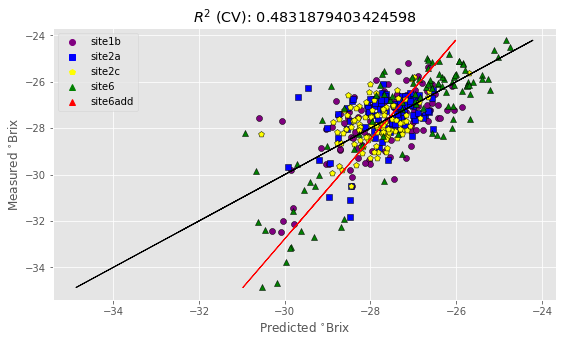

In [27]:
file_name_d13c_mean = 'E:/wenqu/model_csv_point/d13c_mean_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_max,x1_d13c_max,x2_d13c_max,x3_d13c_max,x4_d13c_max,
                             y_d13c_max,y1_d13c_max,y2_d13c_max,y3_d13c_max,y4_d13c_max,
                             ncomp_d13c_max, labels, file_name_d13c_mean)

R2 calib: 0.429
R2 CV: 0.302
MSE calib: 0.727
MSE CV: 0.889
[-18.01977129] [0.35009898]
None
0 site1b [-29.76285364] [-30.315600718026506 'd13c_site1b_07_024.tif']
1 site1b [-28.55777654] [-31.036813310927048 'd13c_site1b_07_025.tif']
2 site1b [-29.95233054] [-31.123991186587013 'd13c_site1b_09_029.tif']
3 site1b [-29.98850454] [-32.112710149670065 'd13c_site1b_10_029.tif']
4 site1b [-29.22491121] [-30.62261703171651 'd13c_site1b_10_031.tif']
5 site1b [-27.57139397] [-27.679986661162836 'd13c_site1b_12_035.tif']
6 site1b [-28.99148427] [-27.896159128222507 'd13c_site1b_13_035.tif']
7 site1b [-28.58416758] [-30.181862554558982 'd13c_site1b_14_036.tif']
8 site1b [-29.58879817] [-29.20797700881037 'd13c_site1b_14_039.tif']
9 site1b [-28.16034573] [-27.334384548954887 'd13c_site1b_17_045.tif']
10 site1b [-26.03856067] [-26.499229516791935 'd13c_site1b_18_047.tif']
11 site1b [-26.04185898] [-26.022135836114025 'd13c_site1b_18_051.tif']
12 site1b [-28.4807757] [-29.09949762416143 'd13c_site1

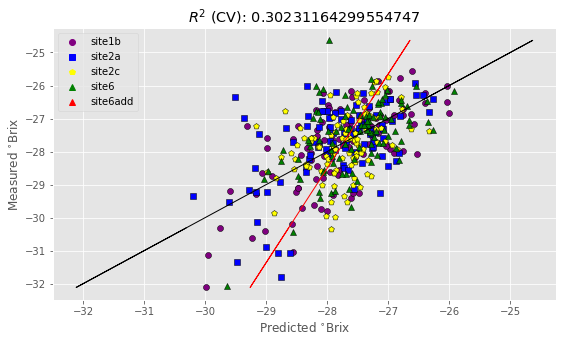

In [28]:
# file_name_d13c_mean = 'E:/wenqu/model_csv_point/d13c_mean_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_d13c_max,x1_d13c_max,x2_d13c_max,x3_d13c_max,x4_d13c_max,
#                              y_d13c_max,y1_d13c_max,y2_d13c_max,y3_d13c_max,y4_d13c_max,
#                              ncomp_d13c_max, labels, file_name_d13c_mean)

R2 calib: 0.745
R2 CV: 0.503
MSE calib: 0.309
MSE CV: 0.603
[-12.27832894] [0.56814405]
None
0 site1b [-28.92073076] [-30.592398625355703 'd13c_site1b_08_025.tif']
1 site1b [-29.3652309] [-29.720616542063915 'd13c_site1b_08_027.tif']
2 site1b [-29.26705463] [-30.002138607494825 'd13c_site1b_09_028.tif']
3 site1b [-30.41126957] [-30.415458329805023 'd13c_site1b_09_030.tif']
4 site1b [-28.25207902] [-29.004574033949112 'd13c_site1b_12_029.tif']
5 site1b [-27.90637858] [-28.520674998576457 'd13c_site1b_12_035.tif']
6 site1b [-30.32661434] [-30.272813306317794 'd13c_site1b_14_023.tif']
7 site1b [-27.39988971] [-27.802714276242185 'd13c_site1b_14_053.tif']
8 site1b [-30.15553402] [-30.151941690836345 'd13c_site1b_15_022.tif']
9 site1b [-27.72140549] [-27.040112813313804 'd13c_site1b_16_041.tif']
10 site1b [-27.72309848] [-28.985241190210594 'd13c_site1b_17_038.tif']
11 site1b [-28.66211133] [-29.41440720505662 'd13c_site1b_17_042.tif']
12 site1b [-29.0076646] [-29.050520911231054 'd13c_site

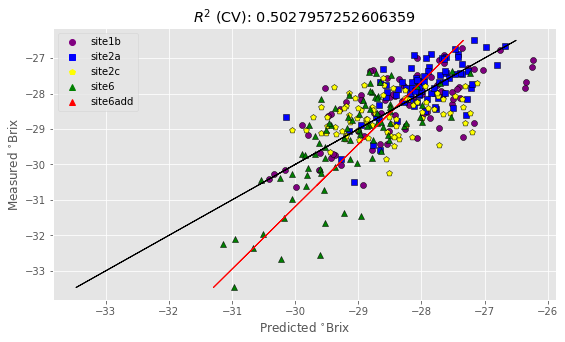

In [52]:
# file_name_d13c_mean = 'E:/wenqu/model_csv_point/d13c_mean_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_d13c_max,x1_d13c_max,x2_d13c_max,x3_d13c_max,x4_d13c_max,
#                              y_d13c_max,y1_d13c_max,y2_d13c_max,y3_d13c_max,y4_d13c_max,
#                              ncomp_d13c_max, labels, file_name_d13c_mean)

# d13 std

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(400, 319)
2% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  10
Wavelengths to be discarded  266
Optimised MSEP  0.28067682248769704



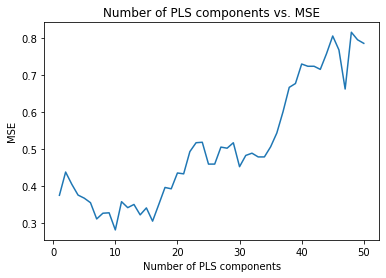

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [28]:
opt_Xc_d13c_std, ncomp_d13c_std, wav_d13c_std, sorted_ind_d13c_std = plot_mse_vs_components(x, y_d13c_std, 50)

In [29]:
x1_d13c_std = opt_Xc_d13c_std[0:100,:]
x2_d13c_std = opt_Xc_d13c_std[100:200,:]
x3_d13c_std = opt_Xc_d13c_std[200:300,:]
x4_d13c_std = opt_Xc_d13c_std[300:400,:]

y1_d13c_std = y_d13c_std[0:100,:]
y2_d13c_std = y_d13c_std[100:200,:]
y3_d13c_std = y_d13c_std[200:300,:]
y4_d13c_std = y_d13c_std[300:400,:]

R2 calib: 0.523
R2 CV: 0.354
MSE calib: 0.200
MSE CV: 0.271
[1.75230558] [0.41796004]
None
0 site1b [3.48430622] [3.803870898233044 'd13c_site1b_08_025.tif']
1 site1b [2.71886486] [2.6919773513777403 'd13c_site1b_09_029.tif']
2 site1b [3.19244209] [3.423553826130634 'd13c_site1b_10_029.tif']
3 site1b [2.50160978] [1.9662996150126557 'd13c_site1b_14_021.tif']
4 site1b [2.90579009] [3.2555554418285717 'd13c_site1b_14_039.tif']
5 site1b [2.7880907] [2.2063922105372886 'd13c_site1b_16_024.tif']
6 site1b [2.71088933] [2.896621367076435 'd13c_site1b_16_042.tif']
7 site1b [2.99531806] [2.5460219726716713 'd13c_site1b_17_042.tif']
8 site1b [3.56155165] [4.494741447248712 'd13c_site1b_17_043.tif']
9 site1b [3.56155165] [4.430305236319016 'd13c_site1b_17_044.tif']
10 site1b [3.5302631] [2.538608548255443 'd13c_site1b_17_045.tif']
11 site1b [2.26697123] [2.3216801167644467 'd13c_site1b_18_027.tif']
12 site1b [2.36306745] [2.913036375546175 'd13c_site1b_19_036.tif']
13 site1b [2.15939798] [2.64730

365 site6 [2.19527458] [2.4884098036835423 'd13c_site6_46_018.tif']
366 site6 [1.70893621] [2.4355615410330023 'd13c_site6_46_019.tif']
367 site6 [2.11865311] [2.066702129699726 'd13c_site6_47_016.tif']
368 site6 [2.69693836] [2.6026414958459565 'd13c_site6_47_017.tif']
369 site6 [2.50087098] [2.589724457429582 'd13c_site6_47_018.tif']
370 site6 [2.18897685] [1.828637030018949 'd13c_site6_48_014.tif']
371 site6 [2.16351087] [2.512493928206337 'd13c_site6_48_015.tif']
372 site6 [2.25793437] [2.74669300923265 'd13c_site6_48_016.tif']
373 site6 [2.40121358] [3.4864410590177415 'd13c_site6_48_017.tif']
374 site6 [2.7104933] [1.7361177216400199 'd13c_site6_49_013.tif']
375 site6 [2.47386011] [2.2529743646814175 'd13c_site6_49_014.tif']
376 site6 [2.57991264] [3.0266903131852265 'd13c_site6_49_015.tif']
377 site6 [2.54072705] [2.7500998574580393 'd13c_site6_49_016.tif']
378 site6 [3.21407646] [2.844460486348172 'd13c_site6_50_013.tif']
379 site6 [3.55979381] [2.8721686620114775 'd13c_site6_5

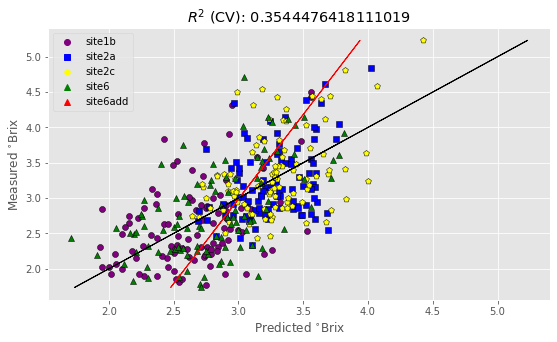

In [30]:
file_name_d13c_std = 'E:/wenqu/model_csv_point/d13c_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d13c_std,x1_d13c_std,x2_d13c_std,x3_d13c_std,x4_d13c_std,
                             y_d13c_std,y1_d13c_std,y2_d13c_std,y3_d13c_std,y4_d13c_std,
                             ncomp_d13c_std, labels,file_name_d13c_std)

R2 calib: 0.452
R2 CV: 0.361
MSE calib: 0.251
MSE CV: 0.293
[1.96125352] [0.40105582]
None
0 site1b [3.58413655] [3.201332083689605 'd13c_site1b_07_024.tif']
1 site1b [3.55373791] [3.2822307781752507 'd13c_site1b_07_025.tif']
2 site1b [2.69914784] [2.5296863809187102 'd13c_site1b_09_029.tif']
3 site1b [3.08233183] [3.6471687337881313 'd13c_site1b_10_029.tif']
4 site1b [2.99786605] [3.906039768478783 'd13c_site1b_10_031.tif']
5 site1b [1.78096924] [2.3775329006393235 'd13c_site1b_12_035.tif']
6 site1b [2.60122275] [2.2859064224752688 'd13c_site1b_13_035.tif']
7 site1b [2.82360478] [2.3958541689509185 'd13c_site1b_14_036.tif']
8 site1b [3.68438599] [3.4241377915084934 'd13c_site1b_14_039.tif']
9 site1b [3.25639452] [2.68578248632969 'd13c_site1b_17_045.tif']
10 site1b [2.7149103] [2.5679071685945627 'd13c_site1b_18_047.tif']
11 site1b [2.79007496] [2.5463114047093725 'd13c_site1b_18_051.tif']
12 site1b [2.43244279] [2.804413816832326 'd13c_site1b_19_033.tif']
13 site1b [3.21609194] [3.28

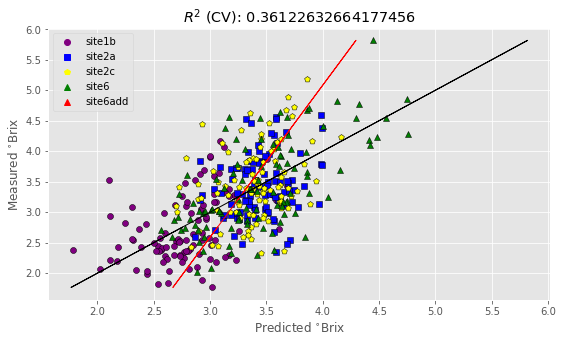

In [31]:
# file_name_d13c_std = 'E:/wenqu/model_csv_point/d13c_std_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_d13c_std,x1_d13c_std,x2_d13c_std,x3_d13c_std,x4_d13c_std,
#                              y_d13c_std,y1_d13c_std,y2_d13c_std,y3_d13c_std,y4_d13c_std,
#                              ncomp_d13c_std, labels,file_name_d13c_std)

# d15n

In [31]:
d15n_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update3\training\numpy\resampled_ymax_d15n.npy',  allow_pickle=True)
d15n_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update3\training\numpy\resampled_std_d15n.npy',  allow_pickle=True)

In [32]:
y_d15n_max1 = np.array(d15n_trait_pdf_ymax)
y_d15n_std1 = np.array(d15n_trait_pdf_std)

In [33]:
# vertically stack two section of arrays to create a new array
site1b_y_d15n_max1 = y_d15n_max1[0:100, :]
site2a_y_d15n_max1 = y_d15n_max1[100:200, :]
site2c_y_d15n_max1 = y_d15n_max1[200:300,:]
site6_y_d15n_max1_1 = y_d15n_max1[300:400,:]

y_d15n_max = np.vstack((site1b_y_d15n_max1, site2a_y_d15n_max1,site2c_y_d15n_max1,site6_y_d15n_max1_1))
# site2c_x = x[]
y_d15n_max.shape

(400, 2)

In [34]:
# vertically stack two section of arrays to create a new array
site1b_y_d15n_std1 = y_d15n_std1[0:100, :]
site2a_y_d15n_std1 = y_d15n_std1[100:200, :]
site2c_y_d15n_std1 = y_d15n_std1[200:300,:]
site6_y_d15n_std1_1 = y_d15n_std1[300:400,:]

y_d15n_std = np.vstack((site1b_y_d15n_std1, site2a_y_d15n_std1,site2c_y_d15n_std1,site6_y_d15n_std1_1))
# site2c_x = x[]
y_d15n_std.shape

(400, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(400, 319)
2% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  12
Wavelengths to be discarded  274
Optimised MSEP  11.708271367561924



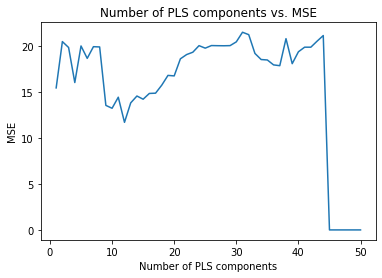

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [35]:
opt_Xc_d15n_max, ncomp_d15n_max, wav_d15n_max, sorted_ind_d15n_max = plot_mse_vs_components(x, y_d15n_max, 50)
x1_d15n_max = opt_Xc_d15n_max[0:100,:]
x2_d15n_max = opt_Xc_d15n_max[100:200,:]
x3_d15n_max = opt_Xc_d15n_max[200:300,:]
x4_d15n_max = opt_Xc_d15n_max[300:400,:]

y1_d15n_max = y_d15n_max[0:100,:]
y2_d15n_max = y_d15n_max[100:200,:]
y3_d15n_max = y_d15n_max[200:300,:]
y4_d15n_max = y_d15n_max[300:400,:]

R2 calib: 0.480
R2 CV: 0.267
MSE calib: 7.930
MSE CV: 11.192
[-0.48785907] [0.37393602]
None
0 site1b [0.26287507] [14.25663349138136 'd15n_site1b_08_025.tif']
1 site1b [4.35408886] [7.9470501183435704 'd15n_site1b_09_029.tif']
2 site1b [6.41758165] [11.953026096034128 'd15n_site1b_10_029.tif']
3 site1b [3.98058859] [6.700155320493856 'd15n_site1b_14_021.tif']
4 site1b [1.99940891] [2.2178269515168374 'd15n_site1b_14_039.tif']
5 site1b [0.24451751] [0.8889751107923782 'd15n_site1b_16_024.tif']
6 site1b [-1.54088252] [5.085352333209364 'd15n_site1b_16_042.tif']
7 site1b [-0.27092053] [5.804282395037676 'd15n_site1b_17_042.tif']
8 site1b [1.27753614] [-1.64247320330092 'd15n_site1b_17_043.tif']
9 site1b [1.27753614] [-6.9031245360667235 'd15n_site1b_17_044.tif']
10 site1b [2.0976689] [-7.191905471243885 'd15n_site1b_17_045.tif']
11 site1b [0.74881396] [2.9455491460563294 'd15n_site1b_18_027.tif']
12 site1b [0.05585021] [1.6986827449686572 'd15n_site1b_19_036.tif']
13 site1b [0.4954919] [

351 site6 [-0.97974591] [-1.8129093388469641 'd15n_site6_42_021.tif']
352 site6 [-0.66745786] [-0.48849673921444037 'd15n_site6_42_022.tif']
353 site6 [-2.54929003] [0.6040410829594727 'd15n_site6_43_019.tif']
354 site6 [-2.54505219] [-0.3678294598559493 'd15n_site6_43_020.tif']
355 site6 [-3.51434515] [-1.4640023048866553 'd15n_site6_43_021.tif']
356 site6 [-1.2206887] [-1.3105557451089993 'd15n_site6_44_018.tif']
357 site6 [-3.06946916] [-1.70470944889653 'd15n_site6_44_019.tif']
358 site6 [-3.09792524] [-2.2627488428905576 'd15n_site6_44_020.tif']
359 site6 [-4.5044975] [-4.789678865743305 'd15n_site6_44_021.tif']
360 site6 [-4.70766763] [-2.553346815650361 'd15n_site6_45_018.tif']
361 site6 [-4.42270968] [-2.72971210042855 'd15n_site6_45_019.tif']
362 site6 [-1.39333322] [-3.048749701183656 'd15n_site6_45_020.tif']
363 site6 [-0.56123383] [-0.5648884103951737 'd15n_site6_46_016.tif']
364 site6 [-3.84398626] [1.0094484152371468 'd15n_site6_46_017.tif']
365 site6 [-3.76648236] [-4.16

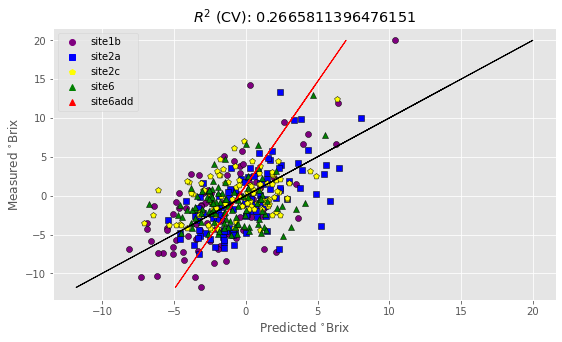

In [36]:
file_name_d15n_max = 'E:/wenqu/model_csv_point/d15n_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d15n_max,x1_d15n_max,x2_d15n_max,x3_d15n_max,x4_d15n_max,
                             y_d15n_max,y1_d15n_max,y2_d15n_max,y3_d15n_max,y4_d15n_max,
                             ncomp_d15n_max, labels, file_name_d15n_max)

R2 calib: 0.682
R2 CV: 0.374
MSE calib: 5.673
MSE CV: 11.158
[-0.26974178] [0.57282463]
None
0 site1b [4.07293672] [9.40436846845164 'd15n_site1b_07_024.tif']
1 site1b [1.89716684] [5.793291188104565 'd15n_site1b_07_025.tif']
2 site1b [5.34780035] [6.388659958137854 'd15n_site1b_09_029.tif']
3 site1b [10.84764964] [12.455256347344339 'd15n_site1b_10_029.tif']
4 site1b [1.55773856] [5.8594228793011105 'd15n_site1b_10_031.tif']
5 site1b [-4.53207562] [-1.4194497268247535 'd15n_site1b_12_035.tif']
6 site1b [-0.12968879] [-0.1204161171390048 'd15n_site1b_13_035.tif']
7 site1b [-1.16179939] [1.6959075448407823 'd15n_site1b_14_036.tif']
8 site1b [2.54927988] [3.8702630235076683 'd15n_site1b_14_039.tif']
9 site1b [0.2300904] [-6.167858206485949 'd15n_site1b_17_045.tif']
10 site1b [-7.03359698] [-9.570391693016997 'd15n_site1b_18_047.tif']
11 site1b [-4.71918878] [-8.115812961730775 'd15n_site1b_18_051.tif']
12 site1b [1.48268645] [3.5128420238526274 'd15n_site1b_19_033.tif']
13 site1b [-1.373

385 site6 [-1.41057802] [-4.587747733444395 'd15n_site6_52_012.tif']
386 site6 [-3.33748752] [-4.303069924646383 'd15n_site6_52_013.tif']
387 site6 [5.91213084] [3.1729438095973883 'd15n_site6_53_010.tif']
388 site6 [10.32134827] [16.27026118446318 'd15n_site6_53_011.tif']
389 site6 [6.05317949] [4.770022627895983 'd15n_site6_53_012.tif']
390 site6 [-3.27084902] [-4.811144241961813 'd15n_site6_54_009.tif']
391 site6 [-2.11882293] [-1.0952920745781753 'd15n_site6_54_010.tif']
392 site6 [-1.35952181] [-5.922158581248617 'd15n_site6_54_011.tif']
393 site6 [-5.59610465] [-8.244080188362872 'd15n_site6_54_012.tif']
394 site6 [-6.95562018] [-6.103197151281137 'd15n_site6_55_008.tif']
395 site6 [-5.72042019] [-7.408621359100529 'd15n_site6_55_009.tif']
396 site6 [-5.76121709] [-5.3156447379004135 'd15n_site6_55_010.tif']
397 site6 [-1.67179915] [-3.032652914949292 'd15n_site6_56_008.tif']
398 site6 [2.35475082] [-0.43783346133385237 'd15n_site6_56_009.tif']
399 site6 [0.99120926] [-4.88448481

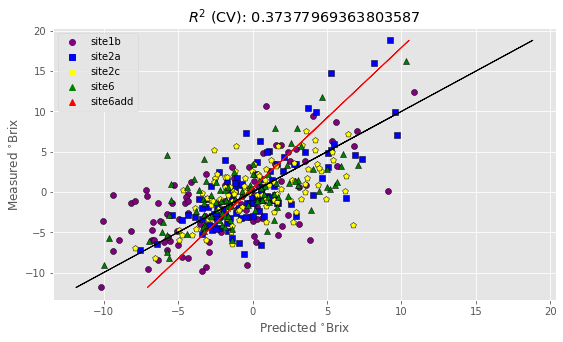

In [37]:
# file_name_d15n_max = 'E:/wenqu/model_csv_point/d15n_max_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_d15n_max,x1_d15n_max,x2_d15n_max,x3_d15n_max,x4_d15n_max,
#                              y_d15n_max,y1_d15n_max,y2_d15n_max,y3_d15n_max,y4_d15n_max,
#                              ncomp_d15n_max, labels, file_name_d15n_max)

R2 calib: 0.777
R2 CV: 0.621
MSE calib: 2.546
MSE CV: 4.330
[-0.74361561] [0.75002466]
None
0 site1b [2.26980403] [5.893403762572998 'd15n_site1b_08_025.tif']
1 site1b [-0.40075038] [2.2210496104396036 'd15n_site1b_08_027.tif']
2 site1b [2.34734013] [2.4212754997047217 'd15n_site1b_09_028.tif']
3 site1b [5.8886681] [5.445358487340185 'd15n_site1b_09_030.tif']
4 site1b [1.6849071] [4.43243119523332 'd15n_site1b_12_029.tif']
5 site1b [-0.60650987] [-1.3929987831993973 'd15n_site1b_12_035.tif']
6 site1b [7.70028442] [5.858575027626198 'd15n_site1b_14_023.tif']
7 site1b [-5.65432265] [-4.726672172546387 'd15n_site1b_14_053.tif']
8 site1b [6.62755841] [6.312828957020223 'd15n_site1b_15_022.tif']
9 site1b [-1.48588878] [-4.502153685859016 'd15n_site1b_16_041.tif']
10 site1b [-3.09525278] [1.9924792212408935 'd15n_site1b_17_038.tif']
11 site1b [-1.95000702] [3.0131208431255345 'd15n_site1b_17_042.tif']
12 site1b [-0.43894609] [-0.36433879176417605 'd15n_site1b_17_043.tif']
13 site1b [-1.14858

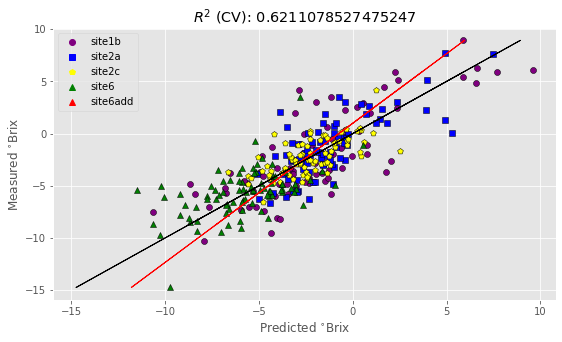

In [54]:
# file_name_d15n_max = 'E:/wenqu/model_csv_point/d15n_max_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_d15n_max,x1_d15n_max,x2_d15n_max,x3_d15n_max,x4_d15n_max,
#                              y_d15n_max,y1_d15n_max,y2_d15n_max,y3_d15n_max,y4_d15n_max,
#                              ncomp_d15n_max, labels, file_name_d15n_max)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(400, 319)
2% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  8
Wavelengths to be discarded  306
Optimised MSEP  1.7323024792254125



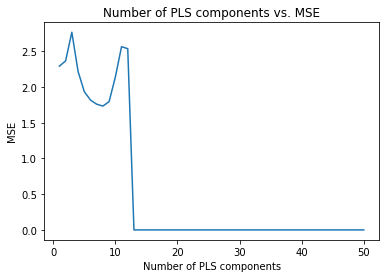

R2 calib: 0.401
R2 CV: 0.302
MSE calib: 1.514
MSE CV: 1.765
[3.78992949] [0.33399269]
None
0 site1b [9.05295014] [7.081490388938559 'd15n_site1b_08_025.tif']
1 site1b [6.48548906] [5.134002717579801 'd15n_site1b_09_029.tif']
2 site1b [7.15872875] [9.337892205948886 'd15n_site1b_10_029.tif']
3 site1b [5.81287344] [4.59566167749322 'd15n_site1b_14_021.tif']
4 site1b [5.42092282] [7.366768816140157 'd15n_site1b_14_039.tif']
5 site1b [5.34969475] [3.8318252766697882 'd15n_site1b_16_024.tif']
6 site1b [5.42047579] [7.867946524124089 'd15n_site1b_16_042.tif']
7 site1b [5.50356018] [5.680909838525065 'd15n_site1b_17_042.tif']
8 site1b [6.03094068] [12.69008232666618 'd15n_site1b_17_043.tif']
9 site1b [6.03094068] [9.512940101974346 'd15n_site1b_17_044.tif']
10 site1b [5.80296087] [5.273000203370489 'd15n_site1b_17_045.tif']
11 site1b [5.39824995] [4.628387855297208 'd15n_site1b_18_027.tif']
12 site1b [6.04432018] [6.092408484651018 'd15n_site1b_19_036.tif']
13 site1b [5.44070965] [5.569080209

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


site2a [6.77808242] [6.239374784000877 'd15n_site2a_19_020.tif']
119 site2a [7.30593693] [7.0694008184963115 'd15n_site2a_19_021.tif']
120 site2a [7.24070751] [6.470479418794013 'd15n_site2a_19_022.tif']
121 site2a [6.84236455] [7.882534909964455 'd15n_site2a_19_025.tif']
122 site2a [6.04383063] [5.601019957799106 'd15n_site2a_19_028.tif']
123 site2a [7.75830985] [8.24438664814026 'd15n_site2a_19_030.tif']
124 site2a [7.3795558] [6.886231831189268 'd15n_site2a_19_031.tif']
125 site2a [6.20197695] [6.804961854918804 'd15n_site2a_20_011.tif']
126 site2a [5.96124685] [5.84242479643174 'd15n_site2a_20_013.tif']
127 site2a [6.01539809] [6.131234790718271 'd15n_site2a_20_015.tif']
128 site2a [6.17839819] [5.378218726078435 'd15n_site2a_20_016.tif']
129 site2a [6.15219926] [7.150923117811811 'd15n_site2a_20_017.tif']
130 site2a [6.38375595] [8.088086805429038 'd15n_site2a_20_018.tif']
131 site2a [6.71573727] [6.931435479087947 'd15n_site2a_20_020.tif']
132 site2a [7.71663969] [9.5916346134533

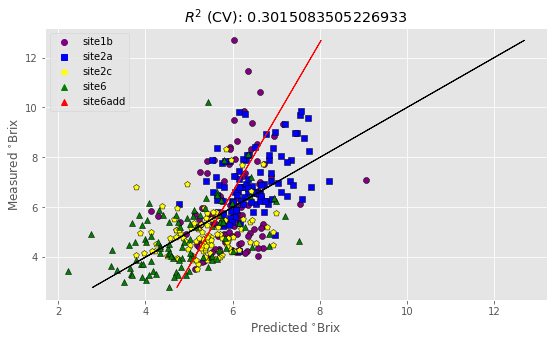

In [37]:
opt_Xc_d15n_std, ncomp_d15n_std, wav_d15n_std, sorted_ind_d15n_std = plot_mse_vs_components(x, y_d15n_std, 50)

x1_d15n_std = opt_Xc_d15n_std[0:100,:]
x2_d15n_std = opt_Xc_d15n_std[100:200,:]
x3_d15n_std = opt_Xc_d15n_std[200:300,:]
x4_d15n_std = opt_Xc_d15n_std[300:400,:]

y1_d15n_std = y_d15n_std[0:100,:]
y2_d15n_std = y_d15n_std[100:200,:]
y3_d15n_std = y_d15n_std[200:300,:]
y4_d15n_std = y_d15n_std[300:400,:]


file_name_d15n_std = 'E:/wenqu/model_csv_point/d15n_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_d15n_std,x1_d15n_std,x2_d15n_std,x3_d15n_std,x4_d15n_std,
                             y_d15n_std,y1_d15n_std,y2_d15n_std,y3_d15n_std,y4_d15n_std,
                             ncomp_d15n_std, labels, file_name_d15n_std)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(400, 319)
2% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  16
Wavelengths to be discarded  221
Optimised MSEP  2.737280204794177



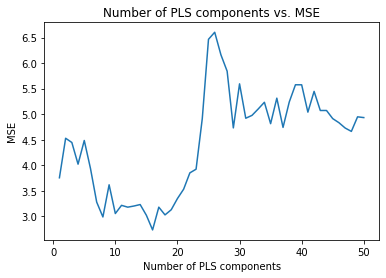

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


R2 calib: 0.644
R2 CV: 0.296
MSE calib: 1.228
MSE CV: 2.424
[3.63757362] [0.52609696]
None
0 site1b [9.0477539] [7.855076116008685 'd15n_site1b_07_024.tif']
1 site1b [8.2388932] [8.442907584817954 'd15n_site1b_07_025.tif']
2 site1b [6.44100389] [5.366158771967901 'd15n_site1b_09_029.tif']
3 site1b [9.59276867] [9.8939742346539 'd15n_site1b_10_029.tif']
4 site1b [9.23402829] [8.641449263876947 'd15n_site1b_10_031.tif']
5 site1b [2.62283258] [4.521090866051858 'd15n_site1b_12_035.tif']
6 site1b [4.43895464] [4.997166082738561 'd15n_site1b_13_035.tif']
7 site1b [5.02246377] [5.770261140727369 'd15n_site1b_14_036.tif']
8 site1b [5.98113423] [7.775573353959521 'd15n_site1b_14_039.tif']
9 site1b [6.49793254] [5.280204904660629 'd15n_site1b_17_045.tif']
10 site1b [4.30199336] [5.119419132067433 'd15n_site1b_18_047.tif']
11 site1b [6.20663306] [6.376316020953409 'd15n_site1b_18_051.tif']
12 site1b [7.57570318] [6.323879377708867 'd15n_site1b_19_033.tif']
13 site1b [8.06417818] [6.7973288758112

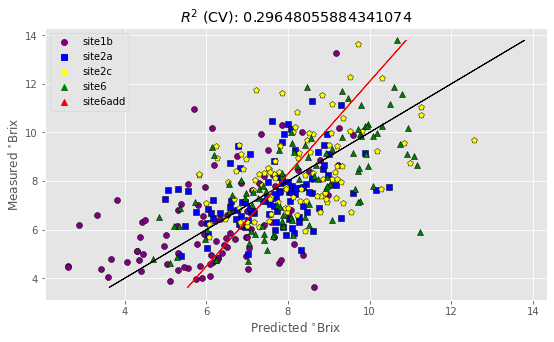

In [38]:
# opt_Xc_d15n_std, ncomp_d15n_std, wav_d15n_std, sorted_ind_d15n_std = plot_mse_vs_components(x, y_d15n_std, 50)

# x1_d15n_std = opt_Xc_d15n_std[0:100,:]
# x2_d15n_std = opt_Xc_d15n_std[100:200,:]
# x3_d15n_std = opt_Xc_d15n_std[200:300,:]
# x4_d15n_std = opt_Xc_d15n_std[300:400,:]

# y1_d15n_std = y_d15n_std[0:100,:]
# y2_d15n_std = y_d15n_std[100:200,:]
# y3_d15n_std = y_d15n_std[200:300,:]
# y4_d15n_std = y_d15n_std[300:400,:]


# file_name_d15n_std = 'E:/wenqu/model_csv_point/d15n_std_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_d15n_std,x1_d15n_std,x2_d15n_std,x3_d15n_std,x4_d15n_std,
#                              y_d15n_std,y1_d15n_std,y2_d15n_std,y3_d15n_std,y4_d15n_std,
#                              ncomp_d15n_std, labels, file_name_d15n_std)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  292
Optimised MSEP  7.545022578874172



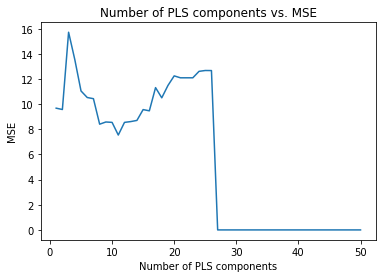

R2 calib: 0.531
R2 CV: 0.337
MSE calib: 5.084
MSE CV: 7.195
[5.83050066] [0.39963451]
None
0 site1b [11.33437315] [7.220580557323889 'd15n_site1b_08_025.tif']
1 site1b [6.47962116] [8.418159359051469 'd15n_site1b_08_027.tif']
2 site1b [8.09912067] [6.4236301267812275 'd15n_site1b_09_028.tif']
3 site1b [10.00252087] [7.197814410981335 'd15n_site1b_09_030.tif']
4 site1b [4.97910164] [6.937869732198975 'd15n_site1b_12_029.tif']
5 site1b [7.50542024] [4.8061261904812955 'd15n_site1b_12_035.tif']
6 site1b [7.21546523] [6.429150081924995 'd15n_site1b_14_023.tif']
7 site1b [8.70740686] [8.62572929357526 'd15n_site1b_14_053.tif']
8 site1b [8.58665816] [7.057582390103736 'd15n_site1b_15_022.tif']
9 site1b [7.17060428] [8.02633500009568 'd15n_site1b_16_041.tif']
10 site1b [7.47295143] [9.317236469240758 'd15n_site1b_17_038.tif']
11 site1b [7.30729055] [6.22326365035786 'd15n_site1b_17_042.tif']
12 site1b [8.46257013] [12.664306830515033 'd15n_site1b_17_043.tif']
13 site1b [7.14859813] [6.8263301

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


 [11.234404069614047 'd15n_site2a_17_014.tif']
92 site2a [13.20488985] [17.436683044387788 'd15n_site2a_17_016.tif']
93 site2a [12.84812638] [13.75807393396307 'd15n_site2a_17_018.tif']
94 site2a [13.17088277] [15.274100726787406 'd15n_site2a_17_019.tif']
95 site2a [12.28429959] [12.518063913174746 'd15n_site2a_17_020.tif']
96 site2a [15.23677574] [17.353486196685356 'd15n_site2a_17_022.tif']
97 site2a [13.44535423] [9.344639620412279 'd15n_site2a_18_030.tif']
98 site2a [14.07906786] [15.979267728047189 'd15n_site2a_18_032.tif']
99 site2a [10.70130635] [11.340764033049947 'd15n_site2a_19_014.tif']
100 site2a [8.94951558] [13.692106742809333 'd15n_site2a_19_015.tif']
101 site2a [10.90239826] [17.543977491131272 'd15n_site2a_19_016.tif']
102 site2a [11.1396326] [12.999272385896614 'd15n_site2a_19_017.tif']
103 site2a [12.60269329] [15.858263851759157 'd15n_site2a_19_018.tif']
104 site2a [12.54065699] [14.555574830564979 'd15n_site2a_19_021.tif']
105 site2a [13.43095893] [14.1004806330401

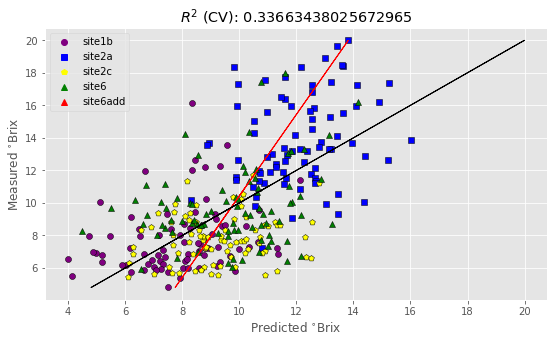

In [55]:
# opt_Xc_d15n_std, ncomp_d15n_std, wav_d15n_std, sorted_ind_d15n_std = plot_mse_vs_components(x, y_d15n_std, 50)

# x1_d15n_std = opt_Xc_d15n_std[0:100,:]
# x2_d15n_std = opt_Xc_d15n_std[100:200,:]
# x3_d15n_std = opt_Xc_d15n_std[200:300,:]
# x4_d15n_std = opt_Xc_d15n_std[300:400,:]

# y1_d15n_std = y_d15n_std[0:100,:]
# y2_d15n_std = y_d15n_std[100:200,:]
# y3_d15n_std = y_d15n_std[200:300,:]
# y4_d15n_std = y_d15n_std[300:400,:]


# file_name_d15n_std = 'E:/wenqu/model_csv_point/d15n_std_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_d15n_std,x1_d15n_std,x2_d15n_std,x3_d15n_std,x4_d15n_std,
#                              y_d15n_std,y1_d15n_std,y2_d15n_std,y3_d15n_std,y4_d15n_std,
#                              ncomp_d15n_std, labels, file_name_d15n_std)

# LA

In [38]:
la_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update3\training\numpy\resampled_ymax_la.npy',  allow_pickle=True)
la_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update3\training\numpy\resampled_std_la.npy',  allow_pickle=True)

In [39]:
y_la_max1 = np.array(la_trait_pdf_ymax)

y_la_std1 = np.array(la_trait_pdf_std)

In [40]:
y_la_max1.shape

(400, 2)

In [41]:
# vertically stack two section of arrays to create a new array
site1b_y_la_max1 = y_la_max1[0:100, :]
site2a_y_la_max1 = y_la_max1[100:200, :]
site2c_y_la_max1 = y_la_max1[200:300,:]
site6_y_la_max1_1 = y_la_max1[300:400,:]
# site6_y_la_max1_2 = y_la_max1[3394:3574,:]
y_la_max = np.vstack((site1b_y_la_max1, site2a_y_la_max1,site2c_y_la_max1,site6_y_la_max1_1))
# site2c_x = x[]
y_la_max.shape

(400, 2)

In [42]:
# vertically stack two section of arrays to create a new array
site1b_y_la_std1 = y_la_std1[0:100, :]
site2a_y_la_std1 = y_la_std1[100:200, :]
site2c_y_la_std1 = y_la_std1[200:300,:]
site6_y_la_std1_1 = y_la_std1[300:400,:]

y_la_std = np.vstack((site1b_y_la_std1, site2a_y_la_std1,site2c_y_la_std1,site6_y_la_std1_1))
# site2c_x = x[]
y_la_std.shape

(400, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(400, 319)
2% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  14
Wavelengths to be discarded  236
Optimised MSEP  3.356289990037187



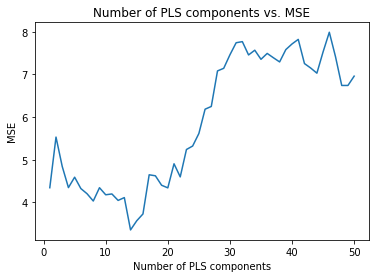

R2 calib: 0.599
R2 CV: 0.244
MSE calib: 1.765
MSE CV: 3.328
[1.09188614] [0.41574222]
None


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


0 site1b [-0.24288727] [-7.00582819045049 'la_site1b_08_025.tif']
1 site1b [-0.8740944] [-1.0029311348969348 'la_site1b_09_029.tif']
2 site1b [-2.00160817] [-4.817060323354559 'la_site1b_10_029.tif']
3 site1b [-0.89576514] [-1.196604290094184 'la_site1b_14_021.tif']
4 site1b [-0.20144633] [-0.6305440356050198 'la_site1b_14_039.tif']
5 site1b [2.75358365] [2.352169679483864 'la_site1b_16_024.tif']
6 site1b [1.53987744] [-2.1285259856362497 'la_site1b_16_042.tif']
7 site1b [1.52499221] [0.39284573904135556 'la_site1b_17_042.tif']
8 site1b [1.9395001] [1.2100138646178742 'la_site1b_17_043.tif']
9 site1b [1.9395001] [3.9585467408084156 'la_site1b_17_044.tif']
10 site1b [1.95692874] [4.646606360973015 'la_site1b_17_045.tif']
11 site1b [3.22127482] [1.7060007329661904 'la_site1b_18_027.tif']
12 site1b [1.94097941] [-0.6164697629324962 'la_site1b_19_036.tif']
13 site1b [1.57188554] [2.483340823284129 'la_site1b_20_034.tif']
14 site1b [4.52803604] [5.350240742407207 'la_site1b_20_048.tif']
15 

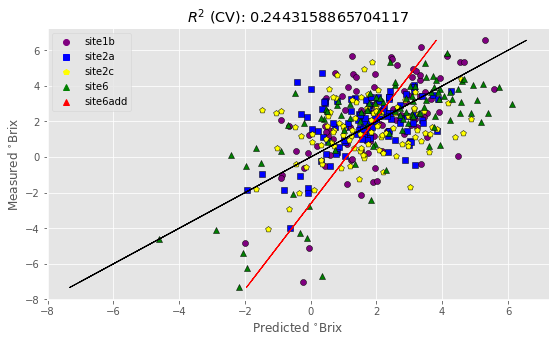

In [43]:
opt_Xc_la_max, ncomp_la_max, wav_la_max, sorted_ind_la_max = plot_mse_vs_components(x, y_la_max, 50)
x1_la_max = opt_Xc_la_max[0:100,:]
x2_la_max = opt_Xc_la_max[100:200,:]
x3_la_max = opt_Xc_la_max[200:300,:]
x4_la_max = opt_Xc_la_max[300:400,:]

y1_la_max = y_la_max[0:100,:]
y2_la_max = y_la_max[100:200,:]
y3_la_max = y_la_max[200:300,:]
y4_la_max = y_la_max[300:400,:]
file_name_la_max = 'E:/wenqu/model_csv_point/la_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_la_max,x1_la_max,x2_la_max,x3_la_max,x4_la_max,
                             y_la_max,y1_la_max,y2_la_max,y3_la_max,y4_la_max,
                             ncomp_la_max, labels,file_name_la_max)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  16
Wavelengths to be discarded  211
Optimised MSEP  1.179608887444961



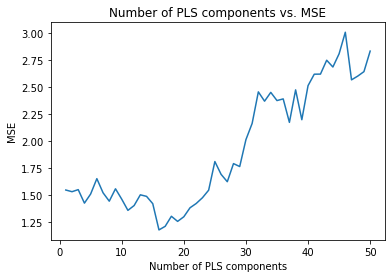

R2 calib: 0.733

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(



R2 CV: 0.397
MSE calib: 0.482
MSE CV: 1.088
[0.89144706] [0.5883701]
None
0 site1b [-1.15022978] [-3.1648005312746825 'la_site1b_08_025.tif']
1 site1b [0.06339936] [0.0750248277032215 'la_site1b_08_027.tif']
2 site1b [0.79706248] [-0.07723713064336923 'la_site1b_09_028.tif']
3 site1b [-1.73430491] [-0.9663850246845653 'la_site1b_09_030.tif']
4 site1b [2.21319775] [0.47559383657720833 'la_site1b_12_029.tif']
5 site1b [2.43562227] [2.508287291507702 'la_site1b_12_035.tif']
6 site1b [-0.48735281] [-1.2886434918767335 'la_site1b_14_023.tif']
7 site1b [1.66883362] [1.9437167274582023 'la_site1b_14_053.tif']
8 site1b [-1.05648114] [-0.8261773927553042 'la_site1b_15_022.tif']
9 site1b [3.99194124] [2.920006685906106 'la_site1b_16_041.tif']
10 site1b [2.34527488] [-0.16677514210835653 'la_site1b_17_038.tif']
11 site1b [1.47449232] [0.058303891240178096 'la_site1b_17_042.tif']
12 site1b [1.9694994] [1.3612730085432094 'la_site1b_17_043.tif']
13 site1b [1.9754975] [3.564911042128477 'la_site1b_

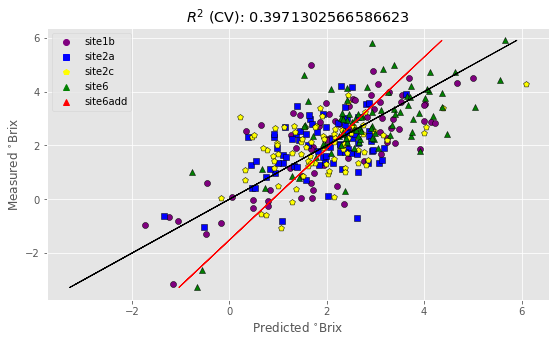

In [61]:
# opt_Xc_la_max, ncomp_la_max, wav_la_max, sorted_ind_la_max = plot_mse_vs_components(x, y_la_max, 50)
# x1_la_max = opt_Xc_la_max[0:80,:]
# x2_la_max = opt_Xc_la_max[80:160,:]
# x3_la_max = opt_Xc_la_max[160:240,:]
# x4_la_max = opt_Xc_la_max[240:550,:]

# y1_la_max = y_la_max[0:80,:]
# y2_la_max = y_la_max[80:160,:]
# y3_la_max = y_la_max[160:240,:]
# y4_la_max = y_la_max[240:550,:]
# file_name_la_max = 'E:/wenqu/model_csv_point/la_max_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_la_max,x1_la_max,x2_la_max,x3_la_max,x4_la_max,
#                              y_la_max,y1_la_max,y2_la_max,y3_la_max,y4_la_max,
#                              ncomp_la_max, labels,file_name_la_max)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(400, 319)
2% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  10
Wavelengths to be discarded  291
Optimised MSEP  0.8679240525252336



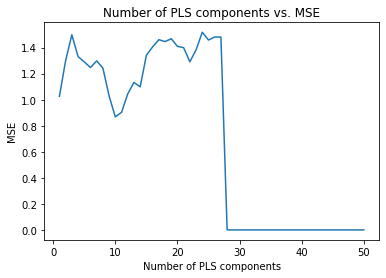

R2 calib: 0.397
R2 CV: 0.188
MSE calib: 0.583
MSE CV: 0.785
[2.63662961] [0.29213575]
None
0 site1b [3.57645541] [3.4514128431030358 'la_site1b_08_025.tif']
1 site1b [3.20897095] [2.944777816415095 'la_site1b_09_029.tif']
2 site1b [3.49277541] [3.603707308931868 'la_site1b_10_029.tif']
3 site1b [3.83440459] [2.116780722146991 'la_site1b_14_021.tif']
4 site1b [3.92123463] [4.062202647797599 'la_site1b_14_039.tif']
5 site1b [3.67552396] [2.2066801034755272 'la_site1b_16_024.tif']
6 site1b [4.0257093] [4.135612798290063 'la_site1b_16_042.tif']
7 site1b [3.75091981] [3.420010693833083 'la_site1b_17_042.tif']
8 site1b [3.7917038] [5.112952385572253 'la_site1b_17_043.tif']
9 site1b [3.7917038] [4.962039046556282 'la_site1b_17_044.tif']
10 site1b [3.63003141] [3.4375031486292844 'la_site1b_17_045.tif']
11 site1b [3.03961047] [2.2488776706955513 'la_site1b_18_027.tif']
12 site1b [3.40099715] [3.623965537837191 'la_site1b_19_036.tif']
13 site1b [3.46709563] [3.3385016331599586 'la_site1b_20_034

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


120 site2a [4.29636526] [3.397602066080114 'la_site2a_19_022.tif']
121 site2a [3.49771395] [4.151063403205719 'la_site2a_19_025.tif']
122 site2a [3.083898] [2.9502029664334715 'la_site2a_19_028.tif']
123 site2a [4.14071458] [5.078203939084442 'la_site2a_19_030.tif']
124 site2a [4.08691233] [3.5054335812594575 'la_site2a_19_031.tif']
125 site2a [3.93902492] [3.636633646003786 'la_site2a_20_011.tif']
126 site2a [4.21635367] [2.6284504127615644 'la_site2a_20_013.tif']
127 site2a [3.84878955] [2.7250805246646537 'la_site2a_20_015.tif']
128 site2a [3.70940151] [3.0444962015697983 'la_site2a_20_016.tif']
129 site2a [3.58311235] [3.1757606610122187 'la_site2a_20_017.tif']
130 site2a [3.90160333] [3.843775236538192 'la_site2a_20_018.tif']
131 site2a [4.10439555] [3.615638685584022 'la_site2a_20_020.tif']
132 site2a [4.54810706] [4.694440728870687 'la_site2a_20_022.tif']
133 site2a [4.56461583] [3.9815044147255847 'la_site2a_20_023.tif']
134 site2a [4.16013334] [3.651282649050199 'la_site2a_20_

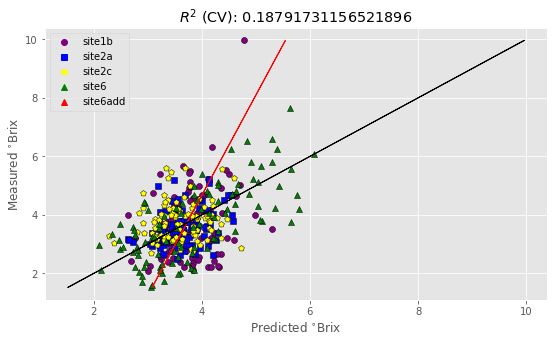

In [44]:
opt_Xc_la_std, ncomp_la_std, wav_la_std, sorted_ind_la_std = plot_mse_vs_components(x, y_la_std, 50)

x1_la_std = opt_Xc_la_std[0:100,:]
x2_la_std = opt_Xc_la_std[100:200,:]
x3_la_std = opt_Xc_la_std[200:300,:]
x4_la_std = opt_Xc_la_std[300:400,:]

y1_la_std = y_la_std[0:100,:]
y2_la_std = y_la_std[100:200,:]
y3_la_std = y_la_std[200:300,:]
y4_la_std = y_la_std[300:400,:]
file_name_la_std = 'E:/wenqu/model_csv_point/la_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_la_std,x1_la_std,x2_la_std,x3_la_std,x4_la_std,
                             y_la_std,y1_la_std,y2_la_std,y3_la_std,y4_la_std,
                             ncomp_la_std, labels, file_name_la_std)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  14
Wavelengths to be discarded  213
Optimised MSEP  2.738059134983532



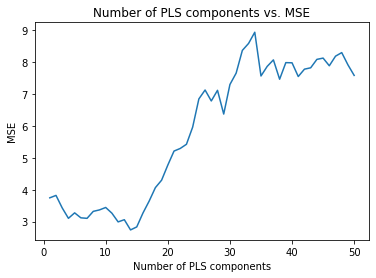

R2 calib: 0.745
R2 CV: 0.363
MSE calib: 1.040
MSE CV: 2.601


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


[2.84400669] [0.56239805]
None
0 site1b [4.76151707] [3.4842528415202882 'la_site1b_08_025.tif']
1 site1b [4.45668339] [5.50929649495397 'la_site1b_08_027.tif']
2 site1b [1.26410534] [3.3573656611527607 'la_site1b_09_028.tif']
3 site1b [1.86350491] [3.1645110140539936 'la_site1b_09_030.tif']
4 site1b [2.37026533] [2.8362851198378114 'la_site1b_12_029.tif']
5 site1b [1.50925127] [2.5367269675003405 'la_site1b_12_035.tif']
6 site1b [3.90848143] [3.526710240443677 'la_site1b_14_023.tif']
7 site1b [7.83738864] [4.9994613069539255 'la_site1b_14_053.tif']
8 site1b [4.51272977] [4.145683764249729 'la_site1b_15_022.tif']
9 site1b [5.18034457] [4.2551210327504885 'la_site1b_16_041.tif']
10 site1b [5.82921072] [4.994347277469863 'la_site1b_17_038.tif']
11 site1b [2.13880013] [4.000282322810269 'la_site1b_17_042.tif']
12 site1b [3.53003389] [4.958701603228518 'la_site1b_17_043.tif']
13 site1b [3.22310365] [4.613331412594729 'la_site1b_17_045.tif']
14 site1b [6.82312755] [3.8407923260785686 'la_si

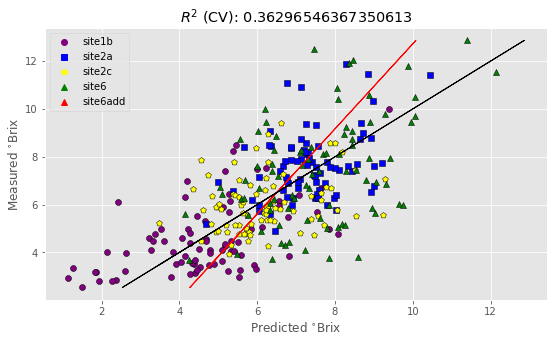

In [62]:
# opt_Xc_la_std, ncomp_la_std, wav_la_std, sorted_ind_la_std = plot_mse_vs_components(x, y_la_std, 50)

# x1_la_std = opt_Xc_la_std[0:80,:]
# x2_la_std = opt_Xc_la_std[80:160,:]
# x3_la_std = opt_Xc_la_std[160:240,:]
# x4_la_std = opt_Xc_la_std[240:550,:]

# y1_la_std = y_la_std[0:80,:]
# y2_la_std = y_la_std[80:160,:]
# y3_la_std = y_la_std[160:240,:]
# y4_la_std = y_la_std[240:550,:]
# file_name_la_std = 'E:/wenqu/model_csv_point/la_std_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_la_std,x1_la_std,x2_la_std,x3_la_std,x4_la_std,
#                              y_la_std,y1_la_std,y2_la_std,y3_la_std,y4_la_std,
#                              ncomp_la_std, labels, file_name_la_std)

# SLA

In [45]:
sla_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update3\training\numpy\resampled_ymax_sla.npy',  allow_pickle=True)
sla_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update3\training\numpy\resampled_std_sla.npy',  allow_pickle=True)

In [46]:
y_sla_max1 = np.array(sla_trait_pdf_ymax)
y_sla_std1 = np.array(sla_trait_pdf_std)

In [47]:
# vertically stack two section of arrays to create a new array
site1b_y_sla_max1 = y_sla_max1[0:100, :]
site2a_y_sla_max1 = y_sla_max1[100:200, :]
site2c_y_sla_max1 = y_sla_max1[200:300,:]
site6_y_sla_max1_1 = y_sla_max1[300:400,:]
# site6_y_sla_max1_2 = y_sla_max1[3394:3574,:]
y_sla_max = np.vstack((site1b_y_sla_max1, site2a_y_sla_max1,site2c_y_sla_max1,site6_y_sla_max1_1))
# site2c_x = x[]
y_sla_max.shape

(400, 2)

In [48]:
# vertically stack two section of arrays to create a new array
site1b_y_sla_std1 = y_sla_std1[0:100, :]
site2a_y_sla_std1 = y_sla_std1[100:200, :]
site2c_y_sla_std1 = y_sla_std1[200:300,:]
site6_y_sla_std1_1 = y_sla_std1[300:400,:]
# site6_y_sla_std1_2 = y_sla_std1[3394:3574,:]
y_sla_std = np.vstack((site1b_y_sla_std1, site2a_y_sla_std1,site2c_y_sla_std1,site6_y_sla_std1_1))
# site2c_x = x[]
y_sla_std.shape

(400, 2)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(400, 319)
2% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(400, 319)
68% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  9
Wavelengths to be discarded  269
Optimised MSEP  0.061669952759102344



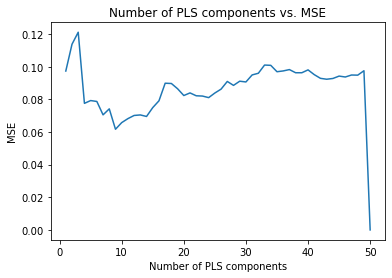

R2 calib: 0.553
R2 CV: 0.379
MSE calib: 0.046
MSE CV: 0.064
[2.54720732] [0.43528209]
None
0 site1b [4.24823377] [3.335865440533839 'sla_site1b_08_025.tif']
1 site1b [4.3570952] [3.7687976559359266 'sla_site1b_09_029.tif']
2 site1b [3.96542166] [3.35277156984532 'sla_site1b_10_029.tif']
3 site1b [4.35984007] [3.747298288894431 'sla_site1b_14_021.tif']
4 site1b [4.47128746] [3.95000876528818 'sla_site1b_14_039.tif']
5 site1b [4.35547624] [4.0747293267665 'sla_site1b_16_024.tif']
6 site1b [4.85131669] [4.403760892135621 'sla_site1b_16_042.tif']
7 site1b [4.81049334] [4.334921081280076 'sla_site1b_17_042.tif']
8 site1b [4.76379584] [4.435735127598956 'sla_site1b_17_043.tif']
9 site1b [4.76379584] [4.959001303914141 'sla_site1b_17_044.tif']
10 site1b [4.55009223] [4.810689422583065 'sla_site1b_17_045.tif']
11 site1b [4.3597463] [3.9251327739255695 'sla_site1b_18_027.tif']
12 site1b [4.60751693] [4.241655754238362 'sla_site1b_19_036.tif']
13 site1b [4.44092744] [4.296838486818093 'sla_site1

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


site1b [4.39092784] [4.592791207028268 'sla_site1b_50_084.tif']
84 site1b [4.94566441] [4.616190486429433 'sla_site1b_51_073.tif']
85 site1b [4.55732119] [4.294717259310861 'sla_site1b_52_074.tif']
86 site1b [4.81650779] [4.631467141469834 'sla_site1b_52_076.tif']
87 site1b [4.70427107] [4.887930877451593 'sla_site1b_53_047.tif']
88 site1b [4.73465098] [4.4907279251562375 'sla_site1b_53_077.tif']
89 site1b [4.60373885] [4.627455703967282 'sla_site1b_53_087.tif']
90 site1b [4.73827013] [4.6095692267194295 'sla_site1b_54_048.tif']
91 site1b [4.63029713] [4.6586577308805195 'sla_site1b_54_067.tif']
92 site1b [4.52838557] [4.578802174143467 'sla_site1b_54_089.tif']
93 site1b [4.84437194] [4.778574744484144 'sla_site1b_55_066.tif']
94 site1b [4.840861] [4.601023814921165 'sla_site1b_55_078.tif']
95 site1b [4.85386737] [4.592334105194977 'sla_site1b_55_079.tif']
96 site1b [4.78065348] [4.834943366449079 'sla_site1b_57_069.tif']
97 site1b [4.91938586] [4.871993093662845 'sla_site1b_57_070.tif

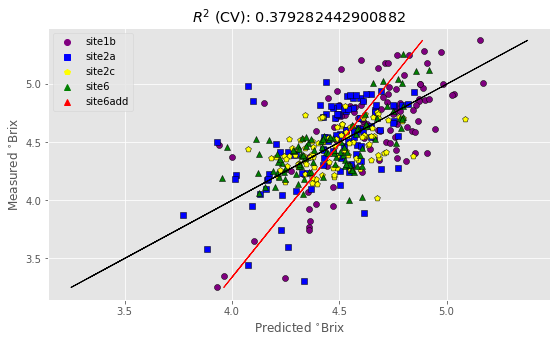

In [49]:
opt_Xc_sla_max, ncomp_sla_max, wav_sla_max, sorted_ind_sla_max = plot_mse_vs_components(x, y_sla_max, 50)
x1_sla_max = opt_Xc_sla_max[0:100,:]
x2_sla_max = opt_Xc_sla_max[100:200,:]
x3_sla_max = opt_Xc_sla_max[200:300,:]
x4_sla_max = opt_Xc_sla_max[300:400,:]

y1_sla_max = y_sla_max[0:100,:]
y2_sla_max = y_sla_max[100:200,:]
y3_sla_max = y_sla_max[200:300,:]
y4_sla_max = y_sla_max[300:400,:]
file_name_sla_max = 'E:/wenqu/model_csv_point/sla_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_sla_max,x1_sla_max,x2_sla_max,x3_sla_max,x4_sla_max,
                             y_sla_max,y1_sla_max,y2_sla_max,y3_sla_max,y4_sla_max,
                             ncomp_sla_max, labels, file_name_sla_max)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  251
Optimised MSEP  0.022227385337568



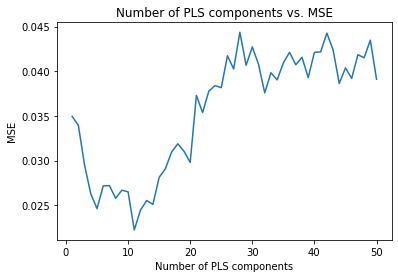

R2 calib: 0.703
R2 CV: 0.559
MSE calib: 0.015
MSE CV: 0.022
[1.69907217] [0.63062692]
None
0 site1b [4.33751743] [3.9726552431051196 'sla_site1b_08_025.tif']
1 site1b [4.44803618] [4.305167535642484 'sla_site1b_08_027.tif']
2 site1b [4.29763549] [4.243404964068988 'sla_site1b_09_028.tif']
3 site1b [4.11593865] [4.17768998570867 'sla_site1b_09_030.tif']
4 site1b [4.51660566] [4.327054499863863 'sla_site1b_12_029.tif']
5 site1b [4.38428611] [4.399617587481891 'sla_site1b_12_035.tif']
6 site1b [4.25353117] [4.035099356024115 'sla_site1b_14_023.tif']
7 site1b [4.86650708] [4.925825473424551 'sla_site1b_14_053.tif']
8 site1b [4.10739316] [4.15192190806071 'sla_site1b_15_022.tif']
9 site1b [4.9665073] [4.957125252312249 'sla_site1b_16_041.tif']
10 site1b [4.54832047] [4.4345733875984905 'sla_site1b_17_038.tif']
11 site1b [4.66957788] [4.443867070538862 'sla_site1b_17_042.tif']
12 site1b [4.55705766] [4.490908984784727 'sla_site1b_17_043.tif']
13 site1b [4.58878232] [4.8481002025776085 'sla_s

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


site2a [4.50987513] [4.46417492550534 'sla_site2a_22_014.tif']
130 site2a [4.592815] [4.530672298895347 'sla_site2a_22_015.tif']
131 site2a [4.59643304] [4.585725896470659 'sla_site2a_22_016.tif']
132 site2a [4.64098515] [4.535258016786775 'sla_site2a_22_018.tif']
133 site2a [4.57640545] [4.675308717263711 'sla_site2a_22_019.tif']
134 site2a [4.69762799] [4.853885260430184 'sla_site2a_22_020.tif']
135 site2a [4.62943465] [4.476583480834961 'sla_site2a_22_021.tif']
136 site2a [4.69815842] [4.770254123676288 'sla_site2a_22_022.tif']
137 site2a [4.63312003] [4.4069648101642445 'sla_site2a_22_024.tif']
138 site2a [4.48330891] [4.325470990724153 'sla_site2a_22_025.tif']
139 site2a [4.15078498] [3.9343970917366646 'sla_site2a_23_029.tif']
140 site2a [3.96212385] [4.1552166019951375 'sla_site2a_23_031.tif']
141 site2a [4.17274644] [4.363130304548475 'sla_site2a_23_032.tif']
142 site2a [4.40586912] [4.519222858789805 'sla_site2a_24_014.tif']
143 site2a [4.43806199] [4.670519371290465 'sla_site

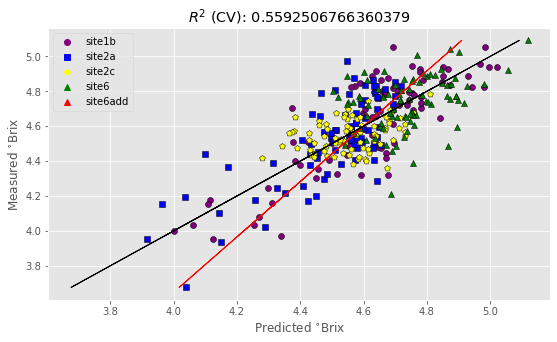

In [67]:
# opt_Xc_sla_max, ncomp_sla_max, wav_sla_max, sorted_ind_sla_max = plot_mse_vs_components(x, y_sla_max, 50)
# x1_sla_max = opt_Xc_sla_max[0:100,:]
# x2_sla_max = opt_Xc_sla_max[100:200,:]
# x3_sla_max = opt_Xc_sla_max[200:300,:]
# x4_sla_max = opt_Xc_sla_max[300:400,:]

# y1_sla_max = y_sla_max[0:100,:]
# y2_sla_max = y_sla_max[100:200,:]
# y3_sla_max = y_sla_max[200:300,:]
# y4_sla_max = y_sla_max[300:400,:]
# file_name_sla_max = 'E:/wenqu/model_csv_point/sla_max_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_sla_max,x1_sla_max,x2_sla_max,x3_sla_max,x4_sla_max,
#                              y_sla_max,y1_sla_max,y2_sla_max,y3_sla_max,y4_sla_max,
#                              ncomp_sla_max, labels, file_name_sla_max)

In [85]:
band_name = np.array(band_name)

In [87]:
optimal_pls_sla  = PLSRegression(n_components=11)
optimal_pls_sla.fit(opt_Xc_sla_max, y_sla_max[:, 0].astype(np.float64))

coefficients_sla = optimal_pls_sla.coef_[:,0]
bands_sla = band_name[sorted_ind_sla_max][wav_sla_max:]

print(coefficients_sla.shape, bands_sla.shape)

coefficients_sla

(68,) (68,)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


array([-0.08172372,  0.24517703,  0.48172983, -0.23243205,  0.10111044,
        0.54289691, -0.12697045,  0.08452502,  0.04592373,  0.44246718,
       -0.32555888, -0.34150563,  0.28816751,  0.21392955,  0.15988314,
       -0.380654  , -0.32344654, -0.13001747,  0.2925615 , -0.33941894,
       -0.28076863,  0.17853602, -0.07598086,  0.36000095, -0.28903048,
       -0.27205175, -0.00136494, -0.01550821, -0.31341499, -0.27559418,
        0.21408723, -0.37191312,  0.22120895, -0.18999355, -0.2191986 ,
        0.26315927,  0.03666206,  0.29687882, -0.22014717,  0.1435495 ,
        0.34527593,  0.30287965,  0.13393886,  0.15455908, -0.28286186,
        0.26437047, -0.26410121, -0.0615298 , -0.32698073,  0.38666499,
       -0.18738171, -0.16781797, -0.15121249, -0.32341369,  0.1761836 ,
        0.33758846,  0.25548594, -0.13905386, -0.45704211,  0.28118616,
       -0.26114927, -0.29053823,  0.44148748,  0.17773748, -0.29812526,
        0.30524208, -0.46386094,  0.2834915 ])

In [88]:
optimal_pls_sla.intercept_

array([4.60752528])

In [89]:
bands_sla

array(['band_221', 'band_340', 'band_260', 'band_119', 'band_329',
       'band_270', 'band_85', 'band_123', 'band_284', 'band_125',
       'band_230', 'band_232', 'band_248', 'band_40', 'band_331',
       'band_236', 'band_143', 'band_93', 'band_179', 'band_338',
       'band_242', 'band_217', 'band_63', 'band_223', 'band_373',
       'band_135', 'band_134', 'band_153', 'band_339', 'band_378',
       'band_43', 'band_177', 'band_47', 'band_113', 'band_24',
       'band_393', 'band_154', 'band_102', 'band_285', 'band_401',
       'band_184', 'band_183', 'band_124', 'band_19', 'band_22',
       'band_70', 'band_389', 'band_61', 'band_355', 'band_336',
       'band_384', 'band_62', 'band_170', 'band_376', 'band_216',
       'band_69', 'band_100', 'band_155', 'band_84', 'band_394',
       'band_36', 'band_72', 'band_399', 'band_17', 'band_174', 'band_27',
       'band_44', 'band_114'], dtype='<U8')

In [ ]:
opt_Xc_sla_std, ncomp_sla_std, wav_sla_std, sorted_ind_sla_std = plot_mse_vs_components(x, y_sla_std, 50)

x1_sla_std = opt_Xc_sla_std[0:100,:]
x2_sla_std = opt_Xc_sla_std[100:200,:]
x3_sla_std = opt_Xc_sla_std[200:300,:]
x4_sla_std = opt_Xc_sla_std[300:400,:]

y1_sla_std = y_sla_std[0:100,:]
y2_sla_std = y_sla_std[100:200,:]
y3_sla_std = y_sla_std[200:300,:]
y4_sla_std = y_sla_std[300:400,:]
file_name_sla_std = 'E:/wenqu/model_csv_point/sla_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_sla_std,x1_sla_std,x2_sla_std,x3_sla_std,x4_sla_std,
                             y_sla_std,y1_sla_std,y2_sla_std,y3_sla_std,y4_sla_std,
                             ncomp_sla_std, labels, file_name_sla_std)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(400, 319)
2% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(400, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  15
Wavelengths to be discarded  235
Optimised MSEP  0.0572926389878105



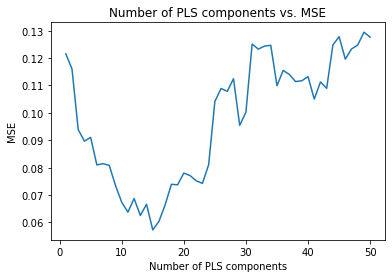

R2 calib: 0.811
R2 CV: 0.605
MSE calib: 0.028
MSE CV: 0.058
[0.29788538] [0.7224552]
None


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


0 site1b [0.97384718] [0.7633147497028729 'sla_site1b_08_025.tif']
1 site1b [0.64646215] [0.6200798296858191 'sla_site1b_08_027.tif']
2 site1b [0.66433525] [0.6079502859573572 'sla_site1b_09_028.tif']
3 site1b [0.26526142] [0.6141653853486556 'sla_site1b_09_030.tif']
4 site1b [0.38599032] [0.5731881820801916 'sla_site1b_12_029.tif']
5 site1b [0.53898765] [0.35394237328978145 'sla_site1b_12_035.tif']
6 site1b [0.51197427] [0.5641417994384963 'sla_site1b_14_023.tif']
7 site1b [0.97093353] [0.8235628809680096 'sla_site1b_14_053.tif']
8 site1b [0.74550418] [0.5757389963284383 'sla_site1b_15_022.tif']
9 site1b [0.83169983] [0.5908780530563913 'sla_site1b_16_041.tif']
10 site1b [0.62147745] [0.7495198911328549 'sla_site1b_17_038.tif']
11 site1b [0.45792932] [0.624679769340834 'sla_site1b_17_042.tif']
12 site1b [0.42960881] [0.9989347535829529 'sla_site1b_17_043.tif']
13 site1b [0.51370159] [0.9451560108486227 'sla_site1b_17_045.tif']
14 site1b [0.97958702] [0.6701602534556625 'sla_site1b_18_

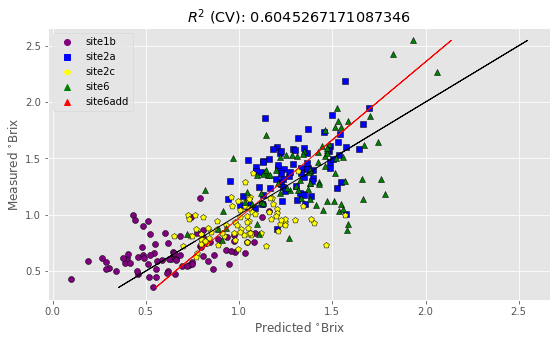

In [68]:
# opt_Xc_sla_std, ncomp_sla_std, wav_sla_std, sorted_ind_sla_std = plot_mse_vs_components(x, y_sla_std, 50)

# x1_sla_std = opt_Xc_sla_std[0:80,:]
# x2_sla_std = opt_Xc_sla_std[80:160,:]
# x3_sla_std = opt_Xc_sla_std[160:240,:]
# x4_sla_std = opt_Xc_sla_std[240:550,:]

# y1_sla_std = y_sla_std[0:80,:]
# y2_sla_std = y_sla_std[80:160,:]
# y3_sla_std = y_sla_std[160:240,:]
# y4_sla_std = y_sla_std[240:550,:]
# file_name_sla_std = 'E:/wenqu/model_csv_point/sla_std_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_sla_std,x1_sla_std,x2_sla_std,x3_sla_std,x4_sla_std,
#                              y_sla_std,y1_sla_std,y2_sla_std,y3_sla_std,y4_sla_std,
#                              ncomp_sla_std, labels, file_name_sla_std)

# LDMC

In [ ]:
ldmc_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update3\training\numpy\resampled_ymax_ldmc.npy',  allow_pickle=True)
ldmc_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update3\training\numpy\resampled_std_ldmc.npy',  allow_pickle=True)

In [ ]:

y_ldmc_max1 = np.array(ldmc_trait_pdf_ymax)

y_ldmc_std1 = np.array(ldmc_trait_pdf_std)

In [ ]:
# vertically stack two section of arrays to create a new array
site1b_y_ldmc_max1 = y_ldmc_max1[0:100, :]
site2a_y_ldmc_max1 = y_ldmc_max1[100:200, :]
site2c_y_ldmc_max1 = y_ldmc_max1[200:300,:]
site6_y_ldmc_max1_1 = y_ldmc_max1[300:400,:]
# site6_y_ldmc_max1_2 = y_ldmc_max1[3394:3574,:]
y_ldmc_max = np.vstack((site1b_y_ldmc_max1, site2a_y_ldmc_max1,site2c_y_ldmc_max1,site6_y_ldmc_max1_1))
# site2c_x = x[]
y_ldmc_max.shape

In [ ]:
# vertically stack two section of arrays to create a new array
site1b_y_ldmc_std1 = y_ldmc_std1[0:100, :]
site2a_y_ldmc_std1 = y_ldmc_std1[100:200, :]
site2c_y_ldmc_std1 = y_ldmc_std1[200:300,:]
site6_y_ldmc_std1_1 = y_ldmc_std1[300:400,:]
# site6_y_ldmc_std1_2 = y_ldmc_std1[3394:3574,:]
y_ldmc_std = np.vstack((site1b_y_ldmc_std1, site2a_y_ldmc_std1,site2c_y_ldmc_std1,site6_y_ldmc_std1_1))
# site2c_x = x[]
y_ldmc_std.shape

In [ ]:
opt_Xc_ldmc_max, ncomp_ldmc_max, wav_ldmc_max, sorted_ind_ldmc_max = plot_mse_vs_components(x, y_ldmc_max, 50)
x1_ldmc_max = opt_Xc_ldmc_max[0:100,:]
x2_ldmc_max = opt_Xc_ldmc_max[100:200,:]
x3_ldmc_max = opt_Xc_ldmc_max[200:300,:]
x4_ldmc_max = opt_Xc_ldmc_max[300:400,:]

y1_ldmc_max = y_ldmc_max[0:100,:]
y2_ldmc_max = y_ldmc_max[100:200,:]
y3_ldmc_max = y_ldmc_max[200:300,:]
y4_ldmc_max = y_ldmc_max[300:400,:]
file_name_ldmc_max = 'E:/wenqu/model_csv_point/ldmc_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_max,x1_ldmc_max,x2_ldmc_max,x3_ldmc_max,x4_ldmc_max,
                             y_ldmc_max,y1_ldmc_max,y2_ldmc_max,y3_ldmc_max,y4_ldmc_max,
                             ncomp_ldmc_max, labels, file_name_ldmc_max)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  17
Wavelengths to be discarded  225
Optimised MSEP  0.13907235771973672



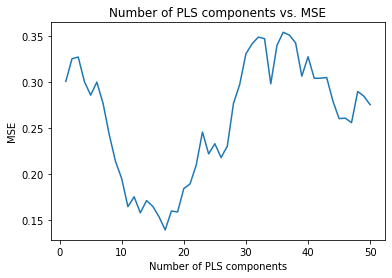

R2 calib: 0.784

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(



R2 CV: 0.522
MSE calib: 0.067
MSE CV: 0.148
[-0.12544948] [0.6628003]
None
0 site1b [-0.86800594] [-1.8168296937469965 'ldmc_site1b_08_025.tif']
1 site1b [-0.27458649] [-1.0741107719199912 'ldmc_site1b_08_027.tif']
2 site1b [-1.23866205] [-1.0550020576358676 'ldmc_site1b_09_028.tif']
3 site1b [-1.54292331] [-1.5874598903340975 'ldmc_site1b_09_030.tif']
4 site1b [-0.32704735] [-1.0112499617957496 'ldmc_site1b_12_029.tif']
5 site1b [-0.78226606] [-0.14346324824714096 'ldmc_site1b_12_035.tif']
6 site1b [-0.97750131] [-1.293538461934339 'ldmc_site1b_14_023.tif']
7 site1b [-0.03969751] [0.981106799644035 'ldmc_site1b_14_053.tif']
8 site1b [-0.60564424] [-0.8672579372967326 'ldmc_site1b_15_022.tif']
9 site1b [0.27304925] [0.2987923261758918 'ldmc_site1b_16_041.tif']
10 site1b [0.04447952] [-0.37894652519856153 'ldmc_site1b_17_038.tif']
11 site1b [0.36961142] [-0.61444537131278 'ldmc_site1b_17_042.tif']
12 site1b [-0.18943302] [-0.29700264844808544 'ldmc_site1b_17_043.tif']
13 site1b [-0.180

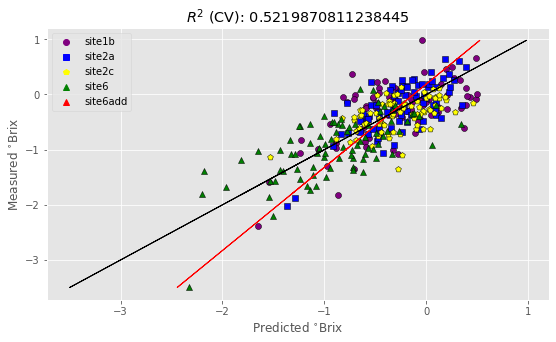

In [73]:
# opt_Xc_ldmc_max, ncomp_ldmc_max, wav_ldmc_max, sorted_ind_ldmc_max = plot_mse_vs_components(x, y_ldmc_max, 50)
# x1_ldmc_max = opt_Xc_ldmc_max[0:80,:]
# x2_ldmc_max = opt_Xc_ldmc_max[80:160,:]
# x3_ldmc_max = opt_Xc_ldmc_max[160:240,:]
# x4_ldmc_max = opt_Xc_ldmc_max[240:550,:]

# y1_ldmc_max = y_ldmc_max[0:80,:]
# y2_ldmc_max = y_ldmc_max[80:160,:]
# y3_ldmc_max = y_ldmc_max[160:240,:]
# y4_ldmc_max = y_ldmc_max[240:550,:]
# file_name_ldmc_max = 'E:/wenqu/model_csv_point/ldmc_max_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_ldmc_max,x1_ldmc_max,x2_ldmc_max,x3_ldmc_max,x4_ldmc_max,
#                              y_ldmc_max,y1_ldmc_max,y2_ldmc_max,y3_ldmc_max,y4_ldmc_max,
#                              ncomp_ldmc_max, labels, file_name_ldmc_max)

In [ ]:
opt_Xc_ldmc_std, ncomp_ldmc_std, wav_ldmc_std, sorted_ind_ldmc_std = plot_mse_vs_components(x, y_ldmc_std, 50)

x1_ldmc_std = opt_Xc_ldmc_std[0:100,:]
x2_ldmc_std = opt_Xc_ldmc_std[100:200,:]
x3_ldmc_std = opt_Xc_ldmc_std[200:300,:]
x4_ldmc_std = opt_Xc_ldmc_std[300:400,:]

y1_ldmc_std = y_ldmc_std[0:100,:]
y2_ldmc_std = y_ldmc_std[100:200,:]
y3_ldmc_std = y_ldmc_std[200:300,:]
y4_ldmc_std = y_ldmc_std[300:400,:]
file_name_ldmc_max = 'E:/wenqu/model_csv_point/ldmc_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_ldmc_std,x1_ldmc_std,x2_ldmc_std,x3_ldmc_std,x4_ldmc_std,
                             y_ldmc_std,y1_ldmc_std,y2_ldmc_std,y3_ldmc_std,y4_ldmc_std,
                             ncomp_ldmc_std, labels, file_name_ldmc_max)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  14
Wavelengths to be discarded  218
Optimised MSEP  0.13716814705846195



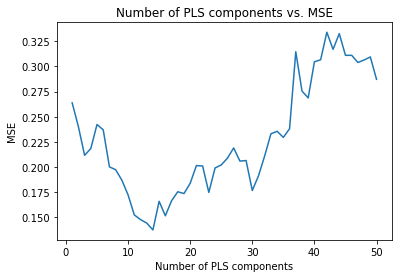

R2 calib: 0.878
R2 CV: 0.695
MSE calib: 0.056
MSE CV: 0.139
[0.45470357] [0.77123127]
None
0 site1b [1.38347685] [1.2754248127541956 'ldmc_site1b_08_025.tif']
1 site1b [1.22665152] [1.8645102513869325 'ldmc_site1b_08_027.tif']
2 site1b [0.78170829] [1.115546992359917 'ldmc_site1b_09_028.tif']
3 site1b [1.15517503] [1.3536362912185818 'ldmc_site1b_09_030.tif']
4 site1b [1.21721284] [1.19090910280037 'ldmc_site1b_12_029.tif']
5 site1b [1.00242612] [0.9722915762661891 'ldmc_site1b_12_035.tif']
6 site1b [1.52147459] [1.2255813167412655 'ldmc_site1b_14_023.tif']
7 site1b [2.70748158] [1.9113892913218662 'ldmc_site1b_14_053.tif']
8 site1b [1.65263178] [1.3602300168733452 'ldmc_site1b_15_022.tif']
9 site1b [1.61995893] [1.5231299407142145 'ldmc_site1b_16_041.tif']
10 site1b [1.82702012] [1.4485261162163225 'ldmc_site1b_17_038.tif']
11 site1b [1.63022755] [1.4538368046948902 'ldmc_site1b_17_042.tif']
12 site1b [1.843281] [1.891344231676296 'ldmc_site1b_17_043.tif']
13 site1b [1.57862573] [1.58

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


 [1.2636810086334567 'ldmc_site1b_22_020.tif']
21 site1b [1.46505479] [1.0684244280316273 'ldmc_site1b_22_021.tif']
22 site1b [1.17917542] [1.3022817865413407 'ldmc_site1b_24_024.tif']
23 site1b [0.98329218] [1.4799416413624766 'ldmc_site1b_24_039.tif']
24 site1b [1.44226212] [1.2478466181984407 'ldmc_site1b_24_040.tif']
25 site1b [1.04343624] [1.246480270498823 'ldmc_site1b_24_058.tif']
26 site1b [1.1366436] [1.4649064773525884 'ldmc_site1b_25_037.tif']
27 site1b [1.4053638] [1.1409184139544524 'ldmc_site1b_25_076.tif']
28 site1b [1.59746153] [1.7449405493110723 'ldmc_site1b_26_028.tif']
29 site1b [1.62158381] [1.3356296266808154 'ldmc_site1b_26_029.tif']
30 site1b [1.38466898] [1.5827182016520127 'ldmc_site1b_26_044.tif']
31 site1b [1.59132012] [1.3174315218974768 'ldmc_site1b_26_045.tif']
32 site1b [1.4352876] [1.0348787749168584 'ldmc_site1b_26_060.tif']
33 site1b [1.41292928] [1.1826460492066848 'ldmc_site1b_26_061.tif']
34 site1b [1.43753386] [1.0250324424590942 'ldmc_site1b_26_0

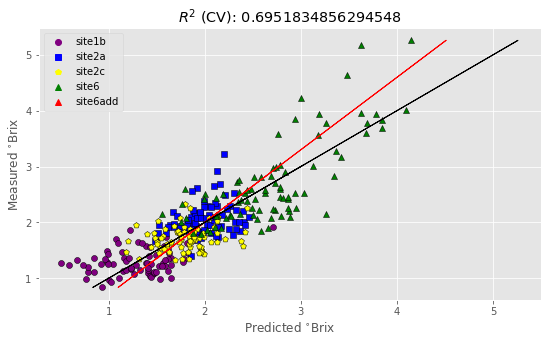

In [74]:
# opt_Xc_ldmc_std, ncomp_ldmc_std, wav_ldmc_std, sorted_ind_ldmc_std = plot_mse_vs_components(x, y_ldmc_std, 50)

# x1_ldmc_std = opt_Xc_ldmc_std[0:80,:]
# x2_ldmc_std = opt_Xc_ldmc_std[80:160,:]
# x3_ldmc_std = opt_Xc_ldmc_std[160:240,:]
# x4_ldmc_std = opt_Xc_ldmc_std[240:550,:]

# y1_ldmc_std = y_ldmc_std[0:80,:]
# y2_ldmc_std = y_ldmc_std[80:160,:]
# y3_ldmc_std = y_ldmc_std[160:240,:]
# y4_ldmc_std = y_ldmc_std[240:550,:]
# file_name_ldmc_max = 'E:/wenqu/model_csv_point/ldmc_std_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_ldmc_std,x1_ldmc_std,x2_ldmc_std,x3_ldmc_std,x4_ldmc_std,
#                              y_ldmc_std,y1_ldmc_std,y2_ldmc_std,y3_ldmc_std,y4_ldmc_std,
#                              ncomp_ldmc_std, labels, file_name_ldmc_max)

# PN

In [ ]:
# pn_trait_pdf_ymax = np.load('E:/wenqu/probability_density_function/without_dem_numpy/sorted/resampled_ymax_pn.npy',  allow_pickle=True)
# pn_trait_pdf_std = np.load('E:/wenqu/probability_density_function/without_dem_numpy/sorted/resampled_std_pn.npy',  allow_pickle=True)

In [ ]:
# y_pn_max1 = np.array(pn_trait_pdf_ymax)

# y_pn_std1 = np.array(pn_trait_pdf_std)

In [ ]:
# site1b_y_pn_max1 = y_pn_max1[0:300, :]
# site2a_y_pn_max1 = y_pn_max1[300:600, :]
# site2c_y_pn_max1 = y_pn_max1[600:900,:]
# site6_y_pn_max1_1 = y_pn_max1[900:1193,:]
# # site6_y_pn_max1_2 = y_pn_max1[3394:3574,:]
# y_pn_max = np.vstack((site1b_y_pn_max1, site2a_y_pn_max1,site2c_y_pn_max1,site6_y_pn_max1_1))
# # site2c_x = x[]
# y_pn_max.shape

In [ ]:
# site1b_y_pn_std1 = y_pn_std1[0:300, :]
# site2a_y_pn_std1 = y_pn_std1[300:600, :]
# site2c_y_pn_std1 = y_pn_std1[600:900,:]
# site6_y_pn_std1_1 = y_pn_std1[900:1193,:]
# # site6_y_pn_std1_2 = y_pn_std1[3394:3574,:]
# y_pn_std = np.vstack((site1b_y_pn_std1, site2a_y_pn_std1,site2c_y_pn_std1,site6_y_pn_std1_1))
# # site2c_x = x[]
# y_pn_std.shape

In [ ]:
# opt_Xc_pn_max, ncomp_pn_max, wav_pn_max, sorted_ind_pn_max = plot_mse_vs_components(x, y_pn_max, 50)
# x1_pn_max = opt_Xc_pn_max[0:300,:]
# x2_pn_max = opt_Xc_pn_max[300:600,:]
# x3_pn_max = opt_Xc_pn_max[600:900,:]
# x4_pn_max = opt_Xc_pn_max[900:1193,:]

# y1_pn_max = y_pn_max[0:300,:]
# y2_pn_max = y_pn_max[300:600,:]
# y3_pn_max = y_pn_max[600:900,:]
# y4_pn_max = y_pn_max[900:1193,:]
# file_name_pn_max = 'E:/wenqu/model_csv_point/pn_max_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_pn_max,x1_pn_max,x2_pn_max,x3_pn_max,x4_pn_max,
#                              y_pn_max,y1_pn_max,y2_pn_max,y3_pn_max,y4_pn_max,
#                              ncomp_pn_max, labels, file_name_pn_max)

In [ ]:
# opt_Xc_pn_std, ncomp_pn_std, wav_pn_std, sorted_ind_pn_std = plot_mse_vs_components(x, y_pn_std, 50)

# x1_pn_std = opt_Xc_pn_std[0:300,:]
# x2_pn_std = opt_Xc_pn_std[300:600,:]
# x3_pn_std = opt_Xc_pn_std[600:900,:]
# x4_pn_std = opt_Xc_pn_std[900:1193,:]

# y1_pn_std = y_pn_std[0:300,:]
# y2_pn_std = y_pn_std[300:600,:]
# y3_pn_std = y_pn_std[600:900,:]
# y4_pn_std = y_pn_std[900:1193,:]
# file_name_pn_std = 'E:/wenqu/model_csv_point/pn_std_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_pn_std,x1_pn_std,x2_pn_std,x3_pn_std,x4_pn_std,
#                              y_pn_std,y1_pn_std,y2_pn_std,y3_pn_std,y4_pn_std,
#                              ncomp_pn_std, labels, file_name_pn_std)

# PC

In [ ]:
pc_trait_pdf_ymax = np.load(r'E:\wenqu\trait_map\update3\training\numpy\resampled_ymax_pc.npy',  allow_pickle=True)
pc_trait_pdf_std = np.load(r'E:\wenqu\trait_map\update3\training\numpy\resampled_std_pc.npy',  allow_pickle=True)

In [ ]:
y_pc_max1 = np.array(pc_trait_pdf_ymax)

y_pc_std1 = np.array(pc_trait_pdf_std)

In [ ]:
site1b_y_pc_max1 = y_pc_max1[0:100, :]
site2a_y_pc_max1 = y_pc_max1[100:200, :]
site2c_y_pc_max1 = y_pc_max1[200:300,:]
site6_y_pc_max1_1 = y_pc_max1[300:400,:]
# site6_y_pn_max1_2 = y_pn_max1[3394:3574,:]
y_pc_max = np.vstack((site1b_y_pc_max1, site2a_y_pc_max1,site2c_y_pc_max1,site6_y_pc_max1_1))
# site2c_x = x[]
y_pc_max.shape

In [ ]:
site1b_y_pc_std1 = y_pc_std1[0:100, :]
site2a_y_pc_std1 = y_pc_std1[100:200, :]
site2c_y_pc_std1 = y_pc_std1[200:300,:]
site6_y_pc_std1_1 = y_pc_std1[300:400,:]
# site6_y_pn_std1_2 = y_pn_std1[3394:3574,:]
y_pc_std = np.vstack((site1b_y_pc_std1, site2a_y_pc_std1,site2c_y_pc_std1,site6_y_pc_std1_1))
# site2c_x = x[]
y_pc_std.shape

In [ ]:
opt_Xc_pc_max, ncomp_pc_max, wav_pc_max, sorted_ind_pc_max = plot_mse_vs_components(x, y_pc_max, 50)
x1_pc_max = opt_Xc_pc_max[0:100,:]
x2_pc_max = opt_Xc_pc_max[100:200,:]
x3_pc_max = opt_Xc_pc_max[200:300,:]
x4_pc_max = opt_Xc_pc_max[300:400,:]

y1_pc_max = y_pc_max[0:100,:]
y2_pc_max = y_pc_max[100:200,:]
y3_pc_max = y_pc_max[200:300,:]
y4_pc_max = y_pc_max[300:400,:]


In [ ]:
file_name_pc_max = 'E:/wenqu/model_csv_point/pc_max_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pc_max,x1_pc_max, x2_pc_max,x3_pc_max,x4_pc_max,
                             y_pc_max,y1_pc_max,y2_pc_max,y3_pc_max,y4_pc_max,
                             ncomp_pc_max, labels, file_name_pc_max)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  14
Wavelengths to be discarded  242
Optimised MSEP  0.003592945324128662



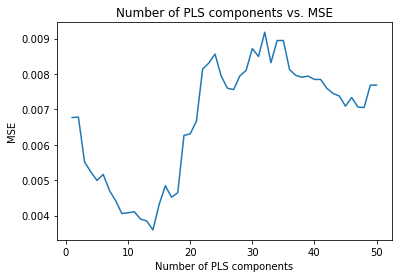

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


In [79]:
# opt_Xc_pc_max, ncomp_pc_max, wav_pc_max, sorted_ind_pc_max = plot_mse_vs_components(x, y_pc_max, 50)
# x1_pc_max = opt_Xc_pc_max[0:80,:]
# x2_pc_max = opt_Xc_pc_max[80:160,:]
# x3_pc_max = opt_Xc_pc_max[160:240,:]
# x4_pc_max = opt_Xc_pc_max[240:550,:]

# y1_pc_max = y_pc_max[0:80,:]
# y2_pc_max = y_pc_max[80:160,:]
# y3_pc_max = y_pc_max[160:240,:]
# y4_pc_max = y_pc_max[240:550,:]


R2 calib: 0.714
R2 CV: 0.508
MSE calib: 0.002
MSE CV: 0.003
[1.4533307] [0.62051714]
None
0 site1b [3.72994995] [3.5204006425133936 'pc_site1b_08_025.tif']
1 site1b [3.7398314] [3.6621545069926493 'pc_site1b_08_027.tif']
2 site1b [3.70445947] [3.6636581965036936 'pc_site1b_09_028.tif']
3 site1b [3.60255993] [3.5837562270350642 'pc_site1b_09_030.tif']
4 site1b [3.71617121] [3.720227603559141 'pc_site1b_12_029.tif']
5 site1b [3.83962715] [3.7466013756122916 'pc_site1b_12_035.tif']
6 site1b [3.57575793] [3.545388905493705 'pc_site1b_14_023.tif']
7 site1b [3.9229836] [3.8378590921739915 'pc_site1b_14_053.tif']
8 site1b [3.62650641] [3.615962675741843 'pc_site1b_15_022.tif']
9 site1b [3.83424261] [3.8471001948680246 'pc_site1b_16_041.tif']
10 site1b [3.79061923] [3.6838184553343014 'pc_site1b_17_038.tif']
11 site1b [3.78809263] [3.6717376708984375 'pc_site1b_17_042.tif']
12 site1b [3.7401949] [3.8039707073100932 'pc_site1b_17_043.tif']
13 site1b [3.73982356] [3.9007939468990935 'pc_site1b_1

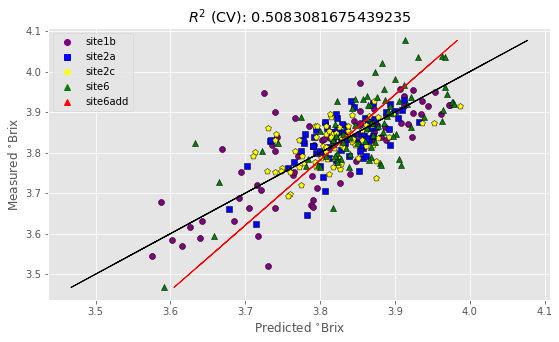

In [80]:
# file_name_pc_max = 'E:/wenqu/model_csv_point/pc_max_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_pc_max,x1_pc_max, x2_pc_max,x3_pc_max,x4_pc_max,
#                              y_pc_max,y1_pc_max,y2_pc_max,y3_pc_max,y4_pc_max,
#                              ncomp_pc_max, labels, file_name_pc_max)

In [ ]:
opt_Xc_pc_std, ncomp_pc_std, wav_pc_std, sorted_ind_pc_std = plot_mse_vs_components(x, y_pc_std, 50)

x1_pc_std = opt_Xc_pc_std[0:100,:]
x2_pc_std = opt_Xc_pc_std[100:200,:]
x3_pc_std = opt_Xc_pc_std[200:300,:]
x4_pc_std = opt_Xc_pc_std[300:400,:]

y1_pc_std = y_pc_std[0:100,:]
y2_pc_std = y_pc_std[100:200,:]
y3_pc_std = y_pc_std[200:300,:]
y4_pc_std = y_pc_std[300:400,:]
file_name_pc_std = 'E:/wenqu/model_csv_point/pc_std_resampled.csv'
simple_pls_cv_label_category(opt_Xc_pc_std,x1_pc_std,x2_pc_std,x3_pc_std,x4_pc_std,
                             y_pc_std,y1_pc_std,y2_pc_std,y3_pc_std,y4_pc_std,
                             ncomp_pc_std, labels, file_name_pc_std)

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


(324, 319)
2% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


4% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


6% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


8% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


10% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


12% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


14% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


16% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


18% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


20% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


22% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


24% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


26% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


28% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


30% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


32% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


34% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


36% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


38% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


40% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


42% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


44% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


46% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


48% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


50% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


52% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


54% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


56% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


58% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


60% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


62% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


64% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


66% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


68% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


70% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


72% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


74% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


76% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


78% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


80% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


82% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


84% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


86% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


88% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


90% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


92% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


94% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


96% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


98% completed(324, 319)


C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


100% completed
Optimised number of PLS components:  11
Wavelengths to be discarded  267
Optimised MSEP  0.008627614219078397



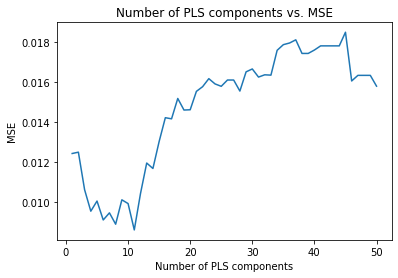

R2 calib: 0.664
R2 CV: 0.434
MSE calib: 0.005
MSE CV: 0.008
[0.15022947] [0.58683845]
None
0 site1b [0.35451596] [0.2017594517990673 'pc_site1b_08_025.tif']
1 site1b [0.14125342] [0.26143389960045915 'pc_site1b_08_027.tif']
2 site1b [0.136322] [0.20183433998509956 'pc_site1b_09_028.tif']
3 site1b [0.05544442] [0.17458199860127302 'pc_site1b_09_030.tif']
4 site1b [0.09458519] [0.18102431164255708 'pc_site1b_12_029.tif']
5 site1b [0.13786674] [0.16172134776133523 'pc_site1b_12_035.tif']
6 site1b [0.17632976] [0.21007045587801354 'pc_site1b_14_023.tif']
7 site1b [0.44324636] [0.2550717107177358 'pc_site1b_14_053.tif']
8 site1b [0.26899714] [0.22641378628751554 'pc_site1b_15_022.tif']
9 site1b [0.2637885] [0.25312172431713154 'pc_site1b_16_041.tif']
10 site1b [0.27909161] [0.26169976299502995 'pc_site1b_17_038.tif']
11 site1b [0.34752419] [0.1968051883715004 'pc_site1b_17_042.tif']
12 site1b [0.32047736] [0.29956087366529827 'pc_site1b_17_043.tif']
13 site1b [0.29340548] [0.242736448384405

C:\Users\laral\Anaconda3\envs\wenqu_gpu\lib\site-packages\sklearn\cross_decomposition\_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


 [0.23054559] [0.18163602480150867 'pc_site1b_39_096.tif']
70 site1b [0.29589004] [0.22819367247531977 'pc_site1b_40_021.tif']
71 site1b [0.24929346] [0.20645983945337856 'pc_site1b_40_023.tif']
72 site1b [0.28511251] [0.2540681952460286 'pc_site1b_40_038.tif']
73 site1b [0.25538896] [0.3503791561954042 'pc_site1b_40_040.tif']
74 site1b [0.24444581] [0.18295300968117056 'pc_site1b_40_054.tif']
75 site1b [0.2795042] [0.2063967322055354 'pc_site1b_40_055.tif']
76 site1b [0.27640835] [0.2592349289272509 'pc_site1b_40_056.tif']
77 site1b [0.22909691] [0.16987038116377567 'pc_site1b_41_025.tif']
78 site1b [0.27892274] [0.2813133716148161 'pc_site1b_41_096.tif']
79 site1b [0.28004804] [0.16096461194222003 'pc_site1b_42_027.tif']
80 site2a [0.36168005] [0.3426837233604305 'pc_site2a_10_012.tif']
81 site2a [0.37755972] [0.35562911428207916 'pc_site2a_10_014.tif']
82 site2a [0.4030888] [0.39919777948026075 'pc_site2a_10_015.tif']
83 site2a [0.35438093] [0.4114050360641453 'pc_site2a_10_016.tif'

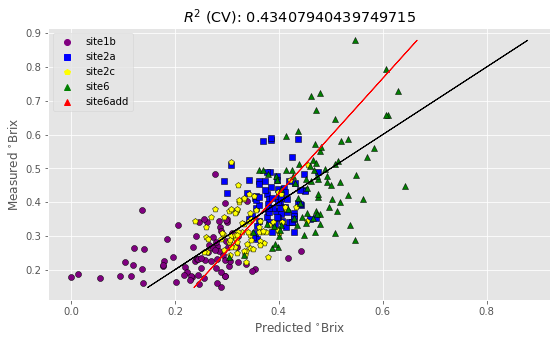

In [81]:
# opt_Xc_pc_std, ncomp_pc_std, wav_pc_std, sorted_ind_pc_std = plot_mse_vs_components(x, y_pc_std, 50)

# x1_pc_std = opt_Xc_pc_std[0:80,:]
# x2_pc_std = opt_Xc_pc_std[80:160,:]
# x3_pc_std = opt_Xc_pc_std[160:240,:]
# x4_pc_std = opt_Xc_pc_std[240:550,:]

# y1_pc_std = y_pc_std[0:80,:]
# y2_pc_std = y_pc_std[80:160,:]
# y3_pc_std = y_pc_std[160:240,:]
# y4_pc_std = y_pc_std[240:550,:]
# file_name_pc_std = 'E:/wenqu/model_csv_point/pc_std_resampled.csv'
# simple_pls_cv_label_category(opt_Xc_pc_std,x1_pc_std,x2_pc_std,x3_pc_std,x4_pc_std,
#                              y_pc_std,y1_pc_std,y2_pc_std,y3_pc_std,y4_pc_std,
#                              ncomp_pc_std, labels, file_name_pc_std)